# Анализ и решение задачи определния стоимости недвижимости на основе предоставленных ресурсом kaggle даных

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler    

1) Обработка данных

In [419]:
data = pd.read_csv('/Users/caprize/Desktop/kaggle_working/house_cost/house-prices-advanced-regression-techniques/train.csv')
data.head(12)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
test_data = pd.read_csv('/Users/caprize/Desktop/kaggle_working/house_cost/house-prices-advanced-regression-techniques/test.csv')

In [420]:
num_col = [
    "MSSubClass",
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt", 
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold"
]
target_col = "SalePrice"
cat_col = []
for i in data.columns:
    if not(i in num_col):
        cat_col.append(i)
cat_col.remove("Id")
cat_col.remove(target_col)
cat_col
feature_col = cat_col + num_col

# Распределение таргетной переменной

/Users/caprize/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


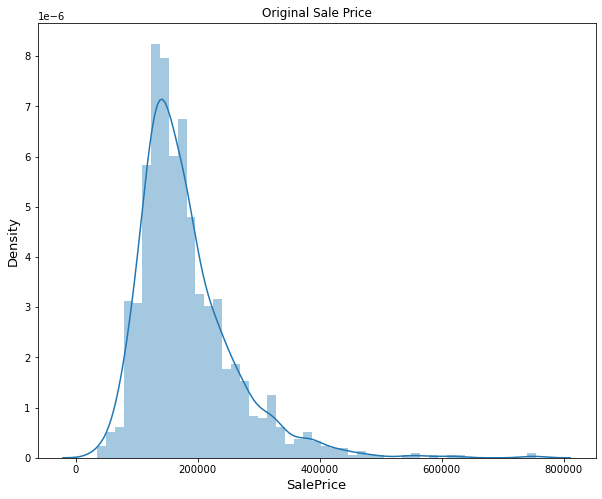

In [12]:
# target: SalePrice
plt.figure(figsize=(10,8))
plt.title('Original Sale Price')
sns.distplot(data['SalePrice'])
plt.ylabel('Density', fontsize=13)
plt.xlabel('SalePrice', fontsize=13)

plt.show()

# Корреляция

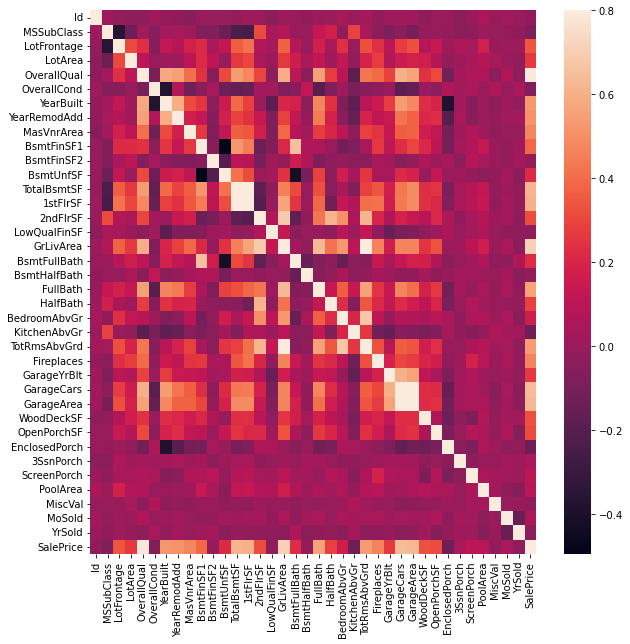

In [14]:
corr = data.corr()
f = ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmax=0.8)

plt.show()  

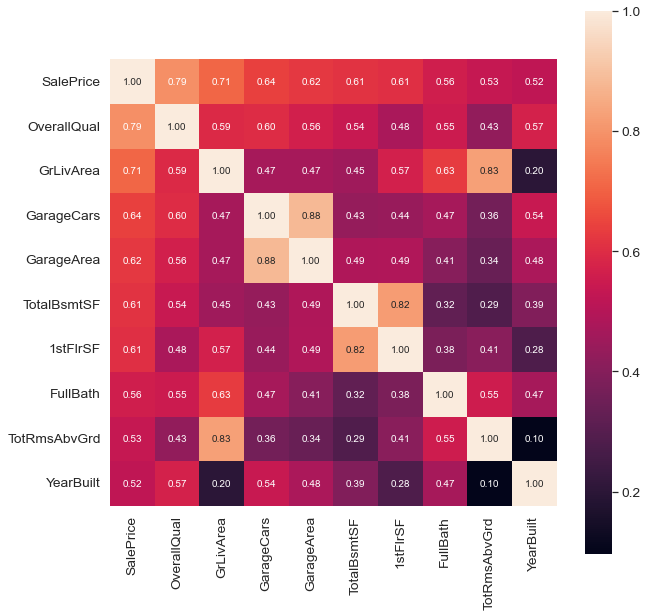

In [15]:
plt.figure(figsize=(10, 10))
columns = corr.nlargest(10, 'SalePrice')['SalePrice'].index
corr_matrix = np.corrcoef(data[columns].values.T)
sns.set(font_scale = 1.25)
heat_map = sns.heatmap(corr_matrix, cbar=True, annot=True, square= True, fmt='.2f',
                      annot_kws={'size':10}, yticklabels=columns.values,
                      xticklabels=columns.values)
plt.show()

# Пропущенные значения

In [421]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


**Анализ корреляционной матрицы позволяет сделать вывод, что данные переменные дублируют свои значения и информацию, 
что позволяет нам удалить их все, кроме параметра Electrical** 

In [422]:
data = data.drop((missing_data[missing_data['Total'] > 1]).index,1)
data = data.drop(data.loc[data['Electrical'].isnull()].index)
data.isnull().sum().max() #just checking that there's no missing data missing...

/var/folders/vn/08nv62l14cngcmwdzhp6khyh0000gn/T/ipykernel_1045/4092089427.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop((missing_data[missing_data['Total'] > 1]).index,1)


0

In [423]:
throw_away_col = list(missing_data[missing_data['Total']>1].index)
j = 0
for i in range(len(cat_col)):
    if cat_col[i-j] in throw_away_col:
            del cat_col[i-j]
            j+=1
j = 0
for i in range(len(num_col)):
    if num_col[i-j] in throw_away_col:
            del num_col[i-j]
            j+=1

# Стандартизация данных

In [209]:
saleprice_scaled = StandardScaler().fit_transform(data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83714031]
 [-1.83197013]
 [-1.79940175]
 [-1.78179041]
 [-1.77298475]
 [-1.62203048]
 [-1.61574072]
 [-1.58429192]
 [-1.58429192]
 [-1.57180045]]

outer range (high) of the distribution:
[[3.82490259]
 [4.036704  ]
 [4.49161726]
 [4.70546914]
 [4.72535736]
 [5.05685293]
 [5.41818712]
 [5.58603569]
 [7.09557834]
 [7.22137356]]


/var/folders/vn/08nv62l14cngcmwdzhp6khyh0000gn/T/ipykernel_1045/1096725811.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(data['SalePrice'][:,np.newaxis]);


**Исходя из логического анализа параметров, корреляционной матрицы, можно сделать вывод о том, что важнейшими параметрами в формировании цены недвижимости является жилая и подвальная площадь**  

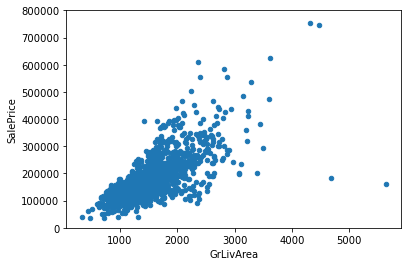

In [195]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
d1 = pd.concat([data['SalePrice'], data[var]], axis=1)
d1.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

**Можно заметить 2 выброса, от которых следует избавиться**

In [196]:
data.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [197]:
data = data.drop(data[data['Id'] == 1299].index)
data = data.drop(data[data['Id'] == 524].index)

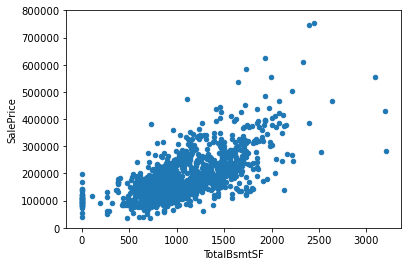

In [12]:
#bivariate analysis saleprice/totalbasemnt
var = 'TotalBsmtSF'
d1 = pd.concat([data['SalePrice'], data[var]], axis=1)
d1.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Анализ распределения таргетных переменных

/Users/caprize/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


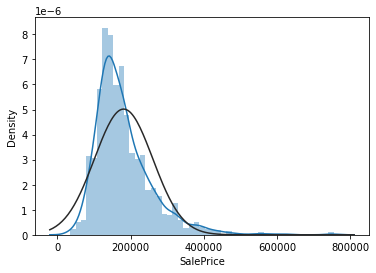

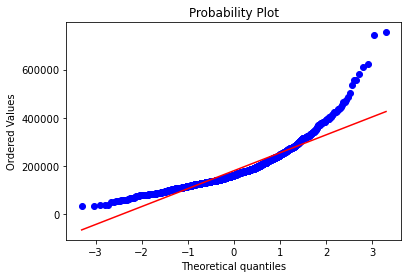

In [13]:
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [210]:
#applying log transformation
data['SalePrice'] = np.log(data['SalePrice'])

/Users/caprize/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


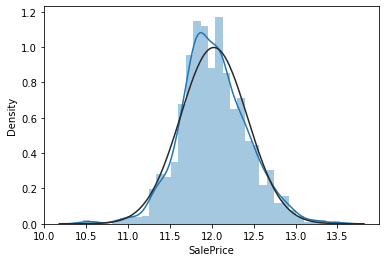

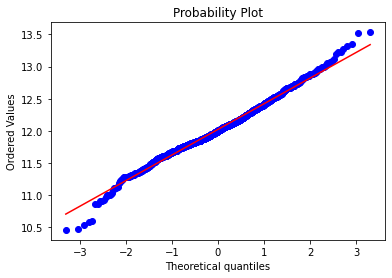

In [211]:
#transformed histogram and normal probability plot
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

/Users/caprize/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


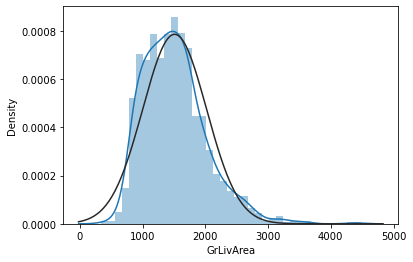

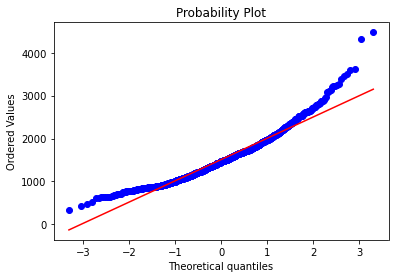

In [16]:
#histogram and normal probability plot
sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

In [212]:
#data transformation
data['GrLivArea'] = np.log(data['GrLivArea'])

/Users/caprize/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


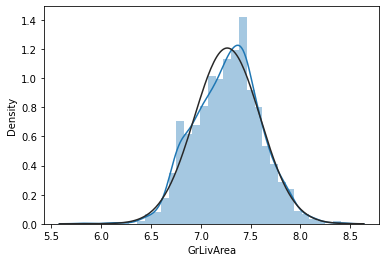

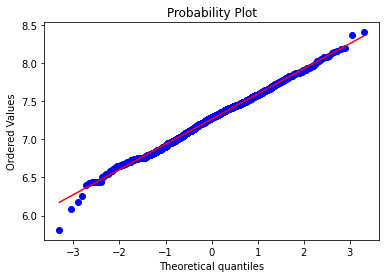

In [18]:
#transformed histogram and normal probability plot
sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

/Users/caprize/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


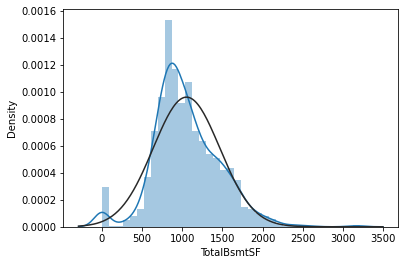

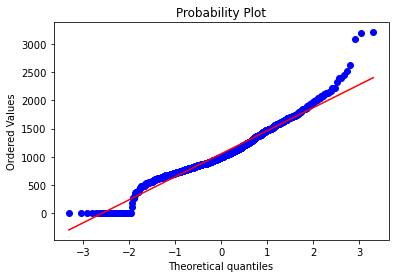

In [19]:
#histogram and normal probability plot
sns.distplot(data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['TotalBsmtSF'], plot=plt)

* Можно заметить, что существует недвижимость без подвалов, а значит применение логарифмической функции невозможно
* Мы создадим новую переменную

In [213]:
#Создадим новую переменную
#if area>0 it gets 1, for area==0 it gets 0
data['HasBsmt'] = pd.Series(len(data['TotalBsmtSF']), index=data.index)
data['HasBsmt'] = -1 
data.loc[data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [214]:
#transform data
data.loc[data['HasBsmt']==1,'TotalBsmtSF'] = np.log(data['TotalBsmtSF'])

/Users/caprize/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/Users/caprize/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


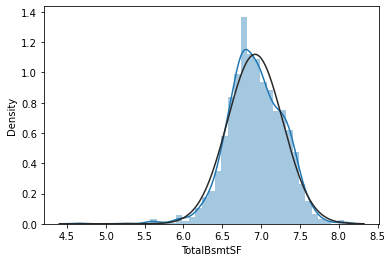

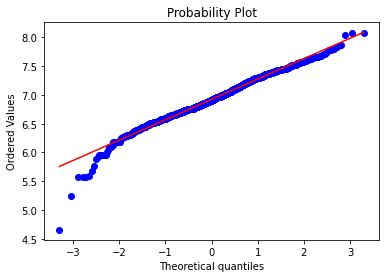

In [215]:
#histogram and normal probability plot
sns.distplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

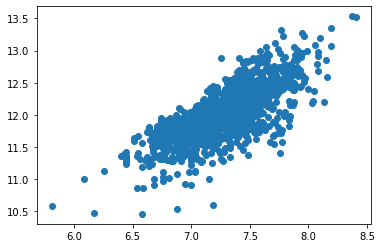

In [21]:
#scatter plot
plt.scatter(data['GrLivArea'], data['SalePrice']);

* Анализ окончен


* Начинаем обучение


# Для начала препроцессинг данных

In [94]:
y = data[target_col]

dummy_features = pd.get_dummies(data[cat_col])
X = pd.concat([data[num_col], dummy_features], axis=1)
# X_origin = data.iloc[:, :-1]
X.head()

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=41)

X.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,2003,2003,706,150,1.909879,856,854,7.444249,...,0,0,0,1,0,0,0,0,1,0
1,9600,6,1976,1976,978,284,1.965776,1262,0,7.140453,...,0,0,0,1,0,0,0,0,1,0
2,11250,7,2001,2002,486,434,1.920501,920,866,7.487734,...,0,0,0,1,0,0,0,0,1,0
3,9550,7,1915,1970,216,540,1.891309,961,756,7.448334,...,0,0,0,1,1,0,0,0,0,0
4,14260,8,2000,2000,655,490,1.952057,1145,1053,7.695303,...,0,0,0,1,0,0,0,0,1,0


In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
np.argwhere(np.isnan(X_test_scaled))

array([], shape=(0, 2), dtype=int64)

# ElasticNet

In [114]:
from sklearn.linear_model import ElasticNetCV
l1 = [.1, .5, .7, .9, .95, .99, 1]
model = ElasticNetCV(l1_ratio=l1)
lr = TransformedTargetRegressor(
        regressor=model, 
        func=np.log, inverse_func=np.exp)


lr.fit(X_train_scaled, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9,
                                                            0.95, 0.99, 1]))

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
model.l1_ratio_

1.0

In [115]:
print(lr.score(X_train_scaled,y_train))
# rms = mean_squared_error(y_actual, y_predicted, squared=False)
print(lr.score(X_test_scaled,y_test))

0.9348760957922845
0.9043261250164103


* TRAIN - 0.92
* TEST - 0.93


# LinearRegression

In [209]:
y = data[target_col]

dummy_features = pd.get_dummies(data[cat_col])
X = pd.concat([data[num_col], dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=39)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [210]:
regressor = LinearRegression()

lr = TransformedTargetRegressor(
        regressor=regressor, 
        func=np.log, inverse_func=np.exp)

lr.fit(X_train,y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [211]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9508694854989123
0.9118491960136064


In [78]:
print(lr.predict(X_train))

[144430.87912281 346848.81797989 119943.50748869 ... 178975.11186764
 238762.35494226 162659.26044265]


* TRAIN - 0.948
* TEST - 0.93

# Lasso

In [ ]:
y = data[target_col]

dummy_features = pd.get_dummies(data[cat_col])
X = pd.concat([data[num_col], dummy_features], axis=1)
# X_origin = data.iloc[:, :-1]
# X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state=42)

In [41]:
from sklearn.model_selection import KFold

# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [116]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

lasso = make_pipeline(RobustScaler(), 
                      Lasso(alpha =0.001, random_state=1,max_iter=500000,tol=0.001))

In [120]:
lasso.fit(X_train_scaled,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso',
                 Lasso(alpha=0.001, max_iter=500000, random_state=1,
                       tol=0.001))])

In [121]:
lasso.score(X_test_scaled,y_test)

0.9043683440316712

* test - 0.9
* train - 0.93

# ELM

In [29]:
!pip install scikit-elm

In [125]:
from skelm import ELMRegressor

In [610]:
y = data[target_col]

dummy_features = pd.get_dummies(data[cat_col])
X = pd.concat([data[num_col], dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=39)

In [288]:
len(X_train)

1165

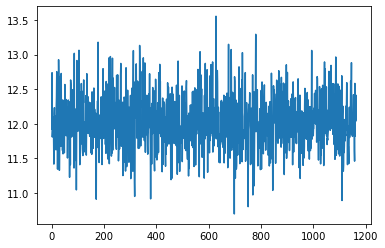

In [126]:
model = ELMRegressor(n_neurons=(128,64,64,1),ufunc=('relu','relu', 'relu',None),pairwise_metric=('cityblock',None,None,'cosine')) 
# lr = TransformedTargetRegressor(None
#         regressor=model, 
#         func=np.log, inverse_func=np.exp)
model.fit(X_train, y_train)
plt.plot(model.predict(X_train))
plt.show()

In [127]:
model.score(X_train,y_train)

0.9493053990079643

In [807]:
# print(model.predict(X_test))
# print()
# print(y_test)
model.score(X_test,y_test)

0.9046675266820624

# For ELMRegressor:
* train = 0.94
* test = 0.90

# CATBOOST

In [8]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [9]:
import catboost

In [10]:
X = pd.concat([data[num_col], data[cat_col]], axis=1)
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=40)

In [11]:
i = 0
cols_for_cat = []
for i in range (len(X.columns)):
    if X.columns[i] in cat_col:
        cols_for_cat.append(i-2)

cols_for_cat

[34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76]

In [13]:
boost_model = catboost.CatBoostRegressor(n_estimators=200,cat_features=cat_col,eval_metric="RMSE")
model1 = boost_model.grid_search({'learning_rate': [0.03, 0.1],
                           'depth': [4, 6, 10],
                           'l2_leaf_reg': np.linspace(0, 1, 20)}, 
                           X, 
                           y, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 192212.7655914	test: 191646.3981452	best: 191646.3981452 (0)	total: 70.5ms	remaining: 14s
1:	learn: 187015.9951065	test: 186573.9677445	best: 186573.9677445 (1)	total: 81.3ms	remaining: 8.05s
2:	learn: 181975.1209097	test: 181475.2254999	best: 181475.2254999 (2)	total: 90.7ms	remaining: 5.95s
3:	learn: 177090.2660925	test: 176494.9654111	best: 176494.9654111 (3)	total: 101ms	remaining: 4.93s
4:	learn: 172320.4951008	test: 171826.9852523	best: 171826.9852523 (4)	total: 108ms	remaining: 4.21s
5:	learn: 167579.5815179	test: 166949.4326652	best: 166949.4326652 (5)	total: 116ms	remaining: 3.75s
6:	learn: 163155.4438033	test: 162475.5169522	best: 162475.5169522 (6)	total: 124ms	remaining: 3.41s
7:	learn: 158740.6427167	test: 157913.2364418	best: 157913.2364418 (7)	total: 132ms	remaining: 3.17s
8:	learn: 154682.8273537	test: 153883.2348734	best: 153883.2348734 (8)	total: 136ms	remaining: 2.88s
9:	learn: 150704.0772138	test: 149807.1227525	best: 149807.1227525 (9)	total: 144ms	remain

100:	learn: 31741.3258303	test: 30505.3515581	best: 30505.3515581 (100)	total: 877ms	remaining: 860ms
101:	learn: 31452.7350928	test: 30337.2701785	best: 30337.2701785 (101)	total: 887ms	remaining: 852ms
102:	learn: 31206.3310626	test: 30138.4444752	best: 30138.4444752 (102)	total: 898ms	remaining: 846ms
103:	learn: 31034.9808013	test: 29963.4676801	best: 29963.4676801 (103)	total: 907ms	remaining: 837ms
104:	learn: 30850.3863381	test: 29846.7067015	best: 29846.7067015 (104)	total: 914ms	remaining: 827ms
105:	learn: 30708.8190978	test: 29701.8546241	best: 29701.8546241 (105)	total: 922ms	remaining: 818ms
106:	learn: 30540.9198155	test: 29461.4059523	best: 29461.4059523 (106)	total: 929ms	remaining: 807ms
107:	learn: 30274.6988606	test: 29314.8912850	best: 29314.8912850 (107)	total: 937ms	remaining: 798ms
108:	learn: 30120.9573078	test: 29164.3513385	best: 29164.3513385 (108)	total: 945ms	remaining: 789ms
109:	learn: 29875.1300630	test: 29045.1168112	best: 29045.1168112 (109)	total: 955

2:	learn: 149123.7373684	test: 148352.0082022	best: 148352.0082022 (2)	total: 27.3ms	remaining: 1.79s
3:	learn: 136269.3783891	test: 135166.3806869	best: 135166.3806869 (3)	total: 40.5ms	remaining: 1.98s
4:	learn: 124694.5334684	test: 123841.8796865	best: 123841.8796865 (4)	total: 52.5ms	remaining: 2.05s
5:	learn: 113910.9919202	test: 112624.6568043	best: 112624.6568043 (5)	total: 62.1ms	remaining: 2.01s
6:	learn: 104956.8968606	test: 103348.6237491	best: 103348.6237491 (6)	total: 76.2ms	remaining: 2.1s
7:	learn: 96379.7677913	test: 94374.7063556	best: 94374.7063556 (7)	total: 130ms	remaining: 3.12s
8:	learn: 89267.5592960	test: 87033.4685918	best: 87033.4685918 (8)	total: 137ms	remaining: 2.91s
9:	learn: 82567.8354947	test: 80192.2936565	best: 80192.2936565 (9)	total: 147ms	remaining: 2.79s
10:	learn: 77051.6784151	test: 74013.2457371	best: 74013.2457371 (10)	total: 160ms	remaining: 2.74s
11:	learn: 71509.8368026	test: 68100.6274866	best: 68100.6274866 (11)	total: 171ms	remaining: 2.6

98:	learn: 18474.6528670	test: 21909.1234204	best: 21859.2145212 (95)	total: 1.05s	remaining: 1.07s
99:	learn: 18424.6257900	test: 21801.7943095	best: 21801.7943095 (99)	total: 1.06s	remaining: 1.06s
100:	learn: 18326.9725261	test: 21802.5047947	best: 21801.7943095 (99)	total: 1.07s	remaining: 1.05s
101:	learn: 18272.4478661	test: 21804.2874944	best: 21801.7943095 (99)	total: 1.09s	remaining: 1.04s
102:	learn: 18220.3968336	test: 21725.1788183	best: 21725.1788183 (102)	total: 1.1s	remaining: 1.03s
103:	learn: 18123.0444878	test: 21678.1759739	best: 21678.1759739 (103)	total: 1.11s	remaining: 1.02s
104:	learn: 18064.1212370	test: 21634.7173866	best: 21634.7173866 (104)	total: 1.11s	remaining: 1.01s
105:	learn: 17996.2995027	test: 21613.7699587	best: 21613.7699587 (105)	total: 1.12s	remaining: 995ms
106:	learn: 17976.0738264	test: 21615.1422474	best: 21613.7699587 (105)	total: 1.13s	remaining: 981ms
107:	learn: 17892.0758230	test: 21635.2102362	best: 21613.7699587 (105)	total: 1.14s	rema

186:	learn: 14828.1514207	test: 20583.2665799	best: 20567.2236173 (179)	total: 1.87s	remaining: 130ms
187:	learn: 14780.6664849	test: 20579.7565748	best: 20567.2236173 (179)	total: 1.88s	remaining: 120ms
188:	learn: 14749.5444915	test: 20603.8735128	best: 20567.2236173 (179)	total: 1.89s	remaining: 110ms
189:	learn: 14736.8564080	test: 20609.6104734	best: 20567.2236173 (179)	total: 1.9s	remaining: 100ms
190:	learn: 14722.9257808	test: 20588.3603202	best: 20567.2236173 (179)	total: 1.91s	remaining: 90ms
191:	learn: 14711.6491438	test: 20576.9152563	best: 20567.2236173 (179)	total: 1.92s	remaining: 80ms
192:	learn: 14704.3145116	test: 20571.4781898	best: 20567.2236173 (179)	total: 1.93s	remaining: 69.8ms
193:	learn: 14668.7676163	test: 20568.9181143	best: 20567.2236173 (179)	total: 1.93s	remaining: 59.7ms
194:	learn: 14651.7360637	test: 20568.2390786	best: 20567.2236173 (179)	total: 1.94s	remaining: 49.7ms
195:	learn: 14643.9738871	test: 20569.6871335	best: 20567.2236173 (179)	total: 1.9

79:	learn: 37925.9223656	test: 36021.9531640	best: 36021.9531640 (79)	total: 720ms	remaining: 1.08s
80:	learn: 37511.2415065	test: 35656.0173391	best: 35656.0173391 (80)	total: 727ms	remaining: 1.07s
81:	learn: 37128.8131494	test: 35259.2229009	best: 35259.2229009 (81)	total: 736ms	remaining: 1.06s
82:	learn: 36681.1329399	test: 34875.8055416	best: 34875.8055416 (82)	total: 744ms	remaining: 1.05s
83:	learn: 36355.7475892	test: 34625.2717203	best: 34625.2717203 (83)	total: 755ms	remaining: 1.04s
84:	learn: 35971.3640347	test: 34321.7863215	best: 34321.7863215 (84)	total: 763ms	remaining: 1.03s
85:	learn: 35559.4257000	test: 33906.6899677	best: 33906.6899677 (85)	total: 771ms	remaining: 1.02s
86:	learn: 35208.3541349	test: 33611.6195682	best: 33611.6195682 (86)	total: 779ms	remaining: 1.01s
87:	learn: 34916.6125410	test: 33335.4736983	best: 33335.4736983 (87)	total: 790ms	remaining: 1s
88:	learn: 34594.1019899	test: 33042.5639709	best: 33042.5639709 (88)	total: 803ms	remaining: 1s
89:	le

173:	learn: 22893.2798804	test: 24890.6202250	best: 24890.6202250 (173)	total: 1.53s	remaining: 228ms
174:	learn: 22821.5322274	test: 24884.6710121	best: 24884.6710121 (174)	total: 1.54s	remaining: 220ms
175:	learn: 22727.5768324	test: 24842.7458727	best: 24842.7458727 (175)	total: 1.55s	remaining: 211ms
176:	learn: 22635.7682096	test: 24831.9108593	best: 24831.9108593 (176)	total: 1.56s	remaining: 203ms
177:	learn: 22598.5425101	test: 24809.7016862	best: 24809.7016862 (177)	total: 1.57s	remaining: 194ms
178:	learn: 22548.9681831	test: 24807.5873585	best: 24807.5873585 (178)	total: 1.58s	remaining: 186ms
179:	learn: 22517.3650072	test: 24782.9467084	best: 24782.9467084 (179)	total: 1.59s	remaining: 177ms
180:	learn: 22470.1735823	test: 24788.0332617	best: 24782.9467084 (179)	total: 1.6s	remaining: 168ms
181:	learn: 22398.5429875	test: 24721.4972781	best: 24721.4972781 (181)	total: 1.61s	remaining: 159ms
182:	learn: 22339.7019933	test: 24674.1605222	best: 24674.1605222 (182)	total: 1.62

70:	learn: 20764.2242048	test: 23442.0562745	best: 23442.0562745 (70)	total: 579ms	remaining: 1.05s
71:	learn: 20662.9572137	test: 23405.0811959	best: 23405.0811959 (71)	total: 589ms	remaining: 1.05s
72:	learn: 20483.9247886	test: 23273.7042991	best: 23273.7042991 (72)	total: 602ms	remaining: 1.05s
73:	learn: 20398.9356479	test: 23242.3227859	best: 23242.3227859 (73)	total: 612ms	remaining: 1.04s
74:	learn: 20309.3545170	test: 23165.6998594	best: 23165.6998594 (74)	total: 621ms	remaining: 1.03s
75:	learn: 20215.0445408	test: 23086.4153978	best: 23086.4153978 (75)	total: 631ms	remaining: 1.03s
76:	learn: 20062.8024477	test: 23022.2141454	best: 23022.2141454 (76)	total: 637ms	remaining: 1.02s
77:	learn: 19977.7639733	test: 22948.0965182	best: 22948.0965182 (77)	total: 645ms	remaining: 1.01s
78:	learn: 19937.7022123	test: 22900.4322690	best: 22900.4322690 (78)	total: 652ms	remaining: 999ms
79:	learn: 19856.4901520	test: 22866.5702098	best: 22866.5702098 (79)	total: 659ms	remaining: 989ms


165:	learn: 15622.1502131	test: 21464.3204437	best: 21045.1250895 (158)	total: 1.4s	remaining: 287ms
166:	learn: 15597.9870331	test: 21461.6518787	best: 21045.1250895 (158)	total: 1.41s	remaining: 279ms
167:	learn: 15548.3358896	test: 21481.5409878	best: 21045.1250895 (158)	total: 1.42s	remaining: 271ms
168:	learn: 15506.4601527	test: 21464.4407983	best: 21045.1250895 (158)	total: 1.43s	remaining: 263ms
169:	learn: 15447.3467822	test: 21454.8922822	best: 21045.1250895 (158)	total: 1.44s	remaining: 255ms
170:	learn: 15424.9930538	test: 21464.5065357	best: 21045.1250895 (158)	total: 1.45s	remaining: 246ms
171:	learn: 15412.6675219	test: 21451.9410098	best: 21045.1250895 (158)	total: 1.46s	remaining: 237ms
172:	learn: 15370.5649971	test: 21461.7122348	best: 21045.1250895 (158)	total: 1.47s	remaining: 229ms
173:	learn: 15336.7431238	test: 21446.1366730	best: 21045.1250895 (158)	total: 1.48s	remaining: 221ms
174:	learn: 15324.4738767	test: 21433.8792733	best: 21045.1250895 (158)	total: 1.49

70:	learn: 42533.4718240	test: 40323.8006943	best: 40323.8006943 (70)	total: 521ms	remaining: 947ms
71:	learn: 41986.3973464	test: 39734.7890862	best: 39734.7890862 (71)	total: 529ms	remaining: 941ms
72:	learn: 41458.2449130	test: 39274.1940432	best: 39274.1940432 (72)	total: 539ms	remaining: 937ms
73:	learn: 40970.4820957	test: 38728.7261862	best: 38728.7261862 (73)	total: 547ms	remaining: 932ms
74:	learn: 40428.0704950	test: 38217.1296181	best: 38217.1296181 (74)	total: 556ms	remaining: 927ms
75:	learn: 39934.9225896	test: 37795.5862354	best: 37795.5862354 (75)	total: 563ms	remaining: 918ms
76:	learn: 39497.6090492	test: 37362.6403413	best: 37362.6403413 (76)	total: 571ms	remaining: 912ms
77:	learn: 39022.3145256	test: 36905.7343835	best: 36905.7343835 (77)	total: 578ms	remaining: 904ms
78:	learn: 38579.6547987	test: 36584.8787206	best: 36584.8787206 (78)	total: 586ms	remaining: 898ms
79:	learn: 38158.6596420	test: 36236.7496479	best: 36236.7496479 (79)	total: 596ms	remaining: 893ms


170:	learn: 23098.6509165	test: 24067.5851937	best: 24067.5851937 (170)	total: 1.34s	remaining: 227ms
171:	learn: 23056.1280060	test: 24054.6404866	best: 24054.6404866 (171)	total: 1.35s	remaining: 219ms
172:	learn: 22977.5961342	test: 24016.3147123	best: 24016.3147123 (172)	total: 1.35s	remaining: 211ms
173:	learn: 22895.0460992	test: 23966.6965721	best: 23966.6965721 (173)	total: 1.36s	remaining: 203ms
174:	learn: 22849.5291570	test: 23952.2166190	best: 23952.2166190 (174)	total: 1.37s	remaining: 196ms
175:	learn: 22807.3470420	test: 23930.9325394	best: 23930.9325394 (175)	total: 1.38s	remaining: 188ms
176:	learn: 22762.6034174	test: 23898.7370488	best: 23898.7370488 (176)	total: 1.38s	remaining: 180ms
177:	learn: 22722.2930267	test: 23848.8147240	best: 23848.8147240 (177)	total: 1.39s	remaining: 172ms
178:	learn: 22681.3469954	test: 23798.6894007	best: 23798.6894007 (178)	total: 1.39s	remaining: 164ms
179:	learn: 22622.5104591	test: 23748.0472305	best: 23748.0472305 (179)	total: 1.4

74:	learn: 20768.4708703	test: 22368.0177346	best: 22368.0177346 (74)	total: 575ms	remaining: 959ms
75:	learn: 20556.9713414	test: 22172.7137845	best: 22172.7137845 (75)	total: 585ms	remaining: 954ms
76:	learn: 20467.7633864	test: 22088.3374512	best: 22088.3374512 (76)	total: 592ms	remaining: 945ms
77:	learn: 20313.9489388	test: 21964.7538493	best: 21964.7538493 (77)	total: 601ms	remaining: 939ms
78:	learn: 20164.8227529	test: 21929.5942277	best: 21929.5942277 (78)	total: 608ms	remaining: 931ms
79:	learn: 20074.6149255	test: 21886.3387815	best: 21886.3387815 (79)	total: 617ms	remaining: 925ms
80:	learn: 20020.9909716	test: 21839.4983042	best: 21839.4983042 (80)	total: 628ms	remaining: 922ms
81:	learn: 19932.7130203	test: 21806.3817217	best: 21806.3817217 (81)	total: 635ms	remaining: 914ms
82:	learn: 19865.7724305	test: 21847.8473507	best: 21806.3817217 (81)	total: 647ms	remaining: 912ms
83:	learn: 19745.5575586	test: 21696.4155526	best: 21696.4155526 (83)	total: 656ms	remaining: 906ms


177:	learn: 15466.5577287	test: 20465.8232302	best: 20335.0964529 (176)	total: 1.39s	remaining: 172ms
178:	learn: 15459.8697797	test: 20454.4890761	best: 20335.0964529 (176)	total: 1.4s	remaining: 165ms
179:	learn: 15451.8192071	test: 20448.8689038	best: 20335.0964529 (176)	total: 1.42s	remaining: 157ms
180:	learn: 15415.7457639	test: 20437.7199478	best: 20335.0964529 (176)	total: 1.42s	remaining: 149ms
181:	learn: 15382.8429037	test: 20413.4793027	best: 20335.0964529 (176)	total: 1.43s	remaining: 141ms
182:	learn: 15346.5674565	test: 20382.5989310	best: 20335.0964529 (176)	total: 1.44s	remaining: 134ms
183:	learn: 15307.3155539	test: 20349.5165416	best: 20335.0964529 (176)	total: 1.45s	remaining: 126ms
184:	learn: 15284.6655672	test: 20345.5115468	best: 20335.0964529 (176)	total: 1.45s	remaining: 118ms
185:	learn: 15270.9366053	test: 20346.4776718	best: 20335.0964529 (176)	total: 1.46s	remaining: 110ms
186:	learn: 15233.5262209	test: 20332.9598803	best: 20332.9598803 (186)	total: 1.47

57:	learn: 50986.2636216	test: 49212.2196307	best: 49212.2196307 (57)	total: 427ms	remaining: 1.04s
58:	learn: 50185.8981228	test: 48324.5573901	best: 48324.5573901 (58)	total: 436ms	remaining: 1.04s
59:	learn: 49371.5305086	test: 47488.1483494	best: 47488.1483494 (59)	total: 444ms	remaining: 1.03s
60:	learn: 48581.8690275	test: 46634.3609744	best: 46634.3609744 (60)	total: 451ms	remaining: 1.03s
61:	learn: 47839.5065861	test: 45891.6966929	best: 45891.6966929 (61)	total: 458ms	remaining: 1.02s
62:	learn: 47104.4942443	test: 45146.4332574	best: 45146.4332574 (62)	total: 464ms	remaining: 1.01s
63:	learn: 46431.1703067	test: 44411.0895398	best: 44411.0895398 (63)	total: 470ms	remaining: 998ms
64:	learn: 45760.7580747	test: 43675.4313296	best: 43675.4313296 (64)	total: 476ms	remaining: 988ms
65:	learn: 45126.9651656	test: 43094.4849158	best: 43094.4849158 (65)	total: 482ms	remaining: 978ms
66:	learn: 44442.5878671	test: 42484.2751501	best: 42484.2751501 (66)	total: 488ms	remaining: 969ms


158:	learn: 23931.4288825	test: 25048.9041699	best: 25048.9041699 (158)	total: 1.24s	remaining: 319ms
159:	learn: 23872.9159313	test: 24993.7432279	best: 24993.7432279 (159)	total: 1.25s	remaining: 311ms
160:	learn: 23772.5192047	test: 24888.0907660	best: 24888.0907660 (160)	total: 1.25s	remaining: 304ms
161:	learn: 23697.7123433	test: 24888.9233994	best: 24888.0907660 (160)	total: 1.26s	remaining: 295ms
162:	learn: 23632.6098514	test: 24846.2986011	best: 24846.2986011 (162)	total: 1.27s	remaining: 288ms
163:	learn: 23568.5101976	test: 24773.6978060	best: 24773.6978060 (163)	total: 1.27s	remaining: 279ms
164:	learn: 23489.4127789	test: 24715.0125739	best: 24715.0125739 (164)	total: 1.28s	remaining: 272ms
165:	learn: 23431.3995039	test: 24686.7951302	best: 24686.7951302 (165)	total: 1.29s	remaining: 264ms
166:	learn: 23366.7840929	test: 24643.5787249	best: 24643.5787249 (166)	total: 1.3s	remaining: 257ms
167:	learn: 23313.6815293	test: 24567.1535624	best: 24567.1535624 (167)	total: 1.31

39:	learn: 26724.4781587	test: 26620.0292635	best: 26620.0292635 (39)	total: 304ms	remaining: 1.22s
40:	learn: 26459.2658907	test: 26435.7163360	best: 26435.7163360 (40)	total: 314ms	remaining: 1.22s
41:	learn: 26238.9564435	test: 26299.8613237	best: 26299.8613237 (41)	total: 322ms	remaining: 1.21s
42:	learn: 26050.0489699	test: 26184.2568431	best: 26184.2568431 (42)	total: 331ms	remaining: 1.21s
43:	learn: 25785.3784313	test: 25865.0768431	best: 25865.0768431 (43)	total: 337ms	remaining: 1.19s
44:	learn: 25589.5302570	test: 25611.6795191	best: 25611.6795191 (44)	total: 344ms	remaining: 1.18s
45:	learn: 25350.2490681	test: 25480.8394816	best: 25480.8394816 (45)	total: 350ms	remaining: 1.17s
46:	learn: 25127.1151614	test: 25367.5508926	best: 25367.5508926 (46)	total: 359ms	remaining: 1.17s
47:	learn: 24835.0346287	test: 25201.7253988	best: 25201.7253988 (47)	total: 368ms	remaining: 1.17s
48:	learn: 24550.2088601	test: 25173.4762425	best: 25173.4762425 (48)	total: 375ms	remaining: 1.15s


143:	learn: 16642.1171781	test: 21069.5077327	best: 20925.0210655 (133)	total: 1.11s	remaining: 433ms
144:	learn: 16582.5224949	test: 21022.6297214	best: 20925.0210655 (133)	total: 1.12s	remaining: 424ms
145:	learn: 16512.2834508	test: 20908.6407954	best: 20908.6407954 (145)	total: 1.13s	remaining: 417ms
146:	learn: 16469.0501035	test: 20900.1724677	best: 20900.1724677 (146)	total: 1.14s	remaining: 410ms
147:	learn: 16444.0583860	test: 20878.4607633	best: 20878.4607633 (147)	total: 1.14s	remaining: 402ms
148:	learn: 16399.6100847	test: 20847.4532325	best: 20847.4532325 (148)	total: 1.15s	remaining: 394ms
149:	learn: 16359.4476909	test: 20823.7514958	best: 20823.7514958 (149)	total: 1.16s	remaining: 386ms
150:	learn: 16329.7358318	test: 20829.6466860	best: 20823.7514958 (149)	total: 1.16s	remaining: 378ms
151:	learn: 16306.1145722	test: 20835.3327943	best: 20823.7514958 (149)	total: 1.17s	remaining: 370ms
152:	learn: 16272.5074265	test: 20876.6276194	best: 20823.7514958 (149)	total: 1.1

23:	learn: 104634.8570011	test: 103189.8996360	best: 103189.8996360 (23)	total: 178ms	remaining: 1.3s
24:	learn: 102097.3304100	test: 100658.0367544	best: 100658.0367544 (24)	total: 188ms	remaining: 1.31s
25:	learn: 99512.6177954	test: 98088.4778420	best: 98088.4778420 (25)	total: 194ms	remaining: 1.3s
26:	learn: 97144.4397322	test: 95776.5554371	best: 95776.5554371 (26)	total: 202ms	remaining: 1.29s
27:	learn: 94836.4368313	test: 93441.9492809	best: 93441.9492809 (27)	total: 211ms	remaining: 1.29s
28:	learn: 92547.7369294	test: 91121.3625784	best: 91121.3625784 (28)	total: 217ms	remaining: 1.28s
29:	learn: 90293.7677780	test: 88777.1057406	best: 88777.1057406 (29)	total: 224ms	remaining: 1.27s
30:	learn: 88259.4820598	test: 86640.9892643	best: 86640.9892643 (30)	total: 229ms	remaining: 1.25s
31:	learn: 86221.8191779	test: 84530.0164425	best: 84530.0164425 (31)	total: 235ms	remaining: 1.23s
32:	learn: 84215.1962816	test: 82726.8467399	best: 82726.8467399 (32)	total: 241ms	remaining: 1.

126:	learn: 26716.8943439	test: 26835.3642481	best: 26835.3642481 (126)	total: 987ms	remaining: 568ms
127:	learn: 26638.1135548	test: 26758.7497439	best: 26758.7497439 (127)	total: 995ms	remaining: 560ms
128:	learn: 26503.4917717	test: 26673.7752089	best: 26673.7752089 (128)	total: 1s	remaining: 552ms
129:	learn: 26378.6727681	test: 26554.9872505	best: 26554.9872505 (129)	total: 1.01s	remaining: 544ms
130:	learn: 26237.4586622	test: 26497.4304105	best: 26497.4304105 (130)	total: 1.02s	remaining: 536ms
131:	learn: 26106.1968356	test: 26368.7366265	best: 26368.7366265 (131)	total: 1.03s	remaining: 529ms
132:	learn: 26051.6151728	test: 26310.8154874	best: 26310.8154874 (132)	total: 1.03s	remaining: 521ms
133:	learn: 25978.4996875	test: 26249.2727374	best: 26249.2727374 (133)	total: 1.04s	remaining: 513ms
134:	learn: 25894.1489551	test: 26178.3076643	best: 26178.3076643 (134)	total: 1.05s	remaining: 505ms
135:	learn: 25738.8603028	test: 26121.8906439	best: 26121.8906439 (135)	total: 1.05s	

30:	learn: 30699.8958722	test: 29660.7251280	best: 29660.7251280 (30)	total: 236ms	remaining: 1.29s
31:	learn: 30240.3673322	test: 29099.7722061	best: 29099.7722061 (31)	total: 246ms	remaining: 1.29s
32:	learn: 29594.5241792	test: 28905.5455692	best: 28905.5455692 (32)	total: 253ms	remaining: 1.28s
33:	learn: 29106.9850525	test: 28369.6111746	best: 28369.6111746 (33)	total: 262ms	remaining: 1.28s
34:	learn: 28698.2930936	test: 27974.6561828	best: 27974.6561828 (34)	total: 269ms	remaining: 1.27s
35:	learn: 28350.4398944	test: 27641.5398328	best: 27641.5398328 (35)	total: 279ms	remaining: 1.27s
36:	learn: 27844.0795179	test: 27233.5810752	best: 27233.5810752 (36)	total: 285ms	remaining: 1.26s
37:	learn: 27497.3138504	test: 27026.7569572	best: 27026.7569572 (37)	total: 294ms	remaining: 1.25s
38:	learn: 27252.6134265	test: 26956.7425920	best: 26956.7425920 (38)	total: 300ms	remaining: 1.24s
39:	learn: 26784.7700019	test: 26629.0831733	best: 26629.0831733 (39)	total: 308ms	remaining: 1.23s


136:	learn: 17179.2562645	test: 20419.7433864	best: 20419.7433864 (136)	total: 1.05s	remaining: 483ms
137:	learn: 17129.3729112	test: 20387.8399135	best: 20387.8399135 (137)	total: 1.06s	remaining: 476ms
138:	learn: 17088.8378931	test: 20361.2043880	best: 20361.2043880 (138)	total: 1.07s	remaining: 469ms
139:	learn: 17072.9378104	test: 20389.4351338	best: 20361.2043880 (138)	total: 1.08s	remaining: 461ms
140:	learn: 17022.7519604	test: 20355.5322863	best: 20355.5322863 (140)	total: 1.09s	remaining: 455ms
141:	learn: 16974.8701492	test: 20343.9200800	best: 20343.9200800 (141)	total: 1.09s	remaining: 447ms
142:	learn: 16963.1915599	test: 20350.5514102	best: 20343.9200800 (141)	total: 1.11s	remaining: 441ms
143:	learn: 16916.1527246	test: 20392.1062691	best: 20343.9200800 (141)	total: 1.11s	remaining: 433ms
144:	learn: 16859.7155545	test: 20337.3017208	best: 20337.3017208 (144)	total: 1.12s	remaining: 425ms
145:	learn: 16826.9266725	test: 20296.6619599	best: 20296.6619599 (145)	total: 1.1

34:	learn: 80574.6052831	test: 79086.2246569	best: 79086.2246569 (34)	total: 290ms	remaining: 1.37s
35:	learn: 78705.2257701	test: 77236.8266157	best: 77236.8266157 (35)	total: 299ms	remaining: 1.36s
36:	learn: 76915.0940327	test: 75420.4110130	best: 75420.4110130 (36)	total: 309ms	remaining: 1.36s
37:	learn: 75329.2335584	test: 73789.3604019	best: 73789.3604019 (37)	total: 316ms	remaining: 1.35s
38:	learn: 73642.9819218	test: 72047.3191731	best: 72047.3191731 (38)	total: 325ms	remaining: 1.34s
39:	learn: 72066.1240088	test: 70383.7651294	best: 70383.7651294 (39)	total: 336ms	remaining: 1.34s
40:	learn: 70495.5558109	test: 68752.4208254	best: 68752.4208254 (40)	total: 342ms	remaining: 1.33s
41:	learn: 69030.9203800	test: 67217.3562890	best: 67217.3562890 (41)	total: 349ms	remaining: 1.31s
42:	learn: 67590.6379984	test: 65658.7042795	best: 65658.7042795 (42)	total: 357ms	remaining: 1.3s
43:	learn: 66185.3337992	test: 64286.9831844	best: 64286.9831844 (43)	total: 364ms	remaining: 1.29s
4

135:	learn: 26135.0245726	test: 26332.5593646	best: 26332.5593646 (135)	total: 1.1s	remaining: 519ms
136:	learn: 26079.6150022	test: 26273.7501374	best: 26273.7501374 (136)	total: 1.11s	remaining: 511ms
137:	learn: 25962.0498425	test: 26203.2305803	best: 26203.2305803 (137)	total: 1.12s	remaining: 502ms
138:	learn: 25889.4051454	test: 26172.7794901	best: 26172.7794901 (138)	total: 1.12s	remaining: 493ms
139:	learn: 25775.2476876	test: 26116.8945436	best: 26116.8945436 (139)	total: 1.13s	remaining: 484ms
140:	learn: 25676.7812927	test: 26001.0156370	best: 26001.0156370 (140)	total: 1.14s	remaining: 476ms
141:	learn: 25549.7093871	test: 25934.0647054	best: 25934.0647054 (141)	total: 1.14s	remaining: 468ms
142:	learn: 25432.0750607	test: 25891.9673519	best: 25891.9673519 (142)	total: 1.15s	remaining: 460ms
143:	learn: 25346.7858650	test: 25843.2654949	best: 25843.2654949 (143)	total: 1.16s	remaining: 451ms
144:	learn: 25261.8154129	test: 25773.6523430	best: 25773.6523430 (144)	total: 1.17

16:	learn: 52130.5417790	test: 48616.4247109	best: 48616.4247109 (16)	total: 132ms	remaining: 1.42s
17:	learn: 49230.2697234	test: 45970.1017888	best: 45970.1017888 (17)	total: 140ms	remaining: 1.42s
18:	learn: 46543.8311656	test: 43223.9996701	best: 43223.9996701 (18)	total: 146ms	remaining: 1.4s
19:	learn: 44306.3977308	test: 41289.4463050	best: 41289.4463050 (19)	total: 154ms	remaining: 1.38s
20:	learn: 42347.1995670	test: 39491.5443376	best: 39491.5443376 (20)	total: 160ms	remaining: 1.36s
21:	learn: 40921.9443878	test: 37970.6118073	best: 37970.6118073 (21)	total: 168ms	remaining: 1.35s
22:	learn: 39449.8612245	test: 36618.7800715	best: 36618.7800715 (22)	total: 177ms	remaining: 1.36s
23:	learn: 37875.0286993	test: 35505.8102087	best: 35505.8102087 (23)	total: 186ms	remaining: 1.36s
24:	learn: 36446.4678560	test: 34399.7927666	best: 34399.7927666 (24)	total: 192ms	remaining: 1.34s
25:	learn: 35243.0417249	test: 33404.5932340	best: 33404.5932340 (25)	total: 202ms	remaining: 1.35s
2

116:	learn: 17648.1865866	test: 21727.0247578	best: 21716.5811405 (114)	total: 934ms	remaining: 663ms
117:	learn: 17602.6626206	test: 21729.3194027	best: 21716.5811405 (114)	total: 943ms	remaining: 655ms
118:	learn: 17583.6553489	test: 21722.3722318	best: 21716.5811405 (114)	total: 953ms	remaining: 649ms
119:	learn: 17571.4673653	test: 21718.3793541	best: 21716.5811405 (114)	total: 960ms	remaining: 640ms
120:	learn: 17531.4301918	test: 21673.8407950	best: 21673.8407950 (120)	total: 970ms	remaining: 633ms
121:	learn: 17505.2602092	test: 21624.6818666	best: 21624.6818666 (121)	total: 976ms	remaining: 624ms
122:	learn: 17483.1596973	test: 21597.9253097	best: 21597.9253097 (122)	total: 982ms	remaining: 615ms
123:	learn: 17450.0161269	test: 21575.2037781	best: 21575.2037781 (123)	total: 995ms	remaining: 610ms
124:	learn: 17374.5056176	test: 21577.8742043	best: 21575.2037781 (123)	total: 1s	remaining: 602ms
125:	learn: 17361.8309771	test: 21562.0403293	best: 21562.0403293 (125)	total: 1.01s	

17:	learn: 122003.6080116	test: 120747.4389873	best: 120747.4389873 (17)	total: 142ms	remaining: 1.44s
18:	learn: 118871.5936769	test: 117564.3459488	best: 117564.3459488 (18)	total: 151ms	remaining: 1.43s
19:	learn: 115854.4100628	test: 114475.8196964	best: 114475.8196964 (19)	total: 161ms	remaining: 1.45s
20:	learn: 112960.2763518	test: 111517.1211905	best: 111517.1211905 (20)	total: 169ms	remaining: 1.44s
21:	learn: 110033.7848051	test: 108541.1607778	best: 108541.1607778 (21)	total: 176ms	remaining: 1.43s
22:	learn: 107250.9771189	test: 105729.4357300	best: 105729.4357300 (22)	total: 182ms	remaining: 1.4s
23:	learn: 104638.2405879	test: 103277.5197196	best: 103277.5197196 (23)	total: 188ms	remaining: 1.38s
24:	learn: 102099.2593700	test: 100741.1964040	best: 100741.1964040 (24)	total: 195ms	remaining: 1.36s
25:	learn: 99521.3764234	test: 98175.1385573	best: 98175.1385573 (25)	total: 203ms	remaining: 1.36s
26:	learn: 97116.1106997	test: 95803.9247821	best: 95803.9247821 (26)	total: 

119:	learn: 28239.0876449	test: 27707.1490689	best: 27707.1490689 (119)	total: 949ms	remaining: 633ms
120:	learn: 28116.1055012	test: 27635.2132328	best: 27635.2132328 (120)	total: 956ms	remaining: 624ms
121:	learn: 27989.6197785	test: 27551.1471784	best: 27551.1471784 (121)	total: 966ms	remaining: 618ms
122:	learn: 27861.3627339	test: 27398.6236731	best: 27398.6236731 (122)	total: 975ms	remaining: 610ms
123:	learn: 27755.6400604	test: 27336.6711143	best: 27336.6711143 (123)	total: 982ms	remaining: 602ms
124:	learn: 27616.9399702	test: 27206.8083960	best: 27206.8083960 (124)	total: 988ms	remaining: 593ms
125:	learn: 27475.6100568	test: 27136.2099705	best: 27136.2099705 (125)	total: 994ms	remaining: 584ms
126:	learn: 27297.2102588	test: 27002.3029934	best: 27002.3029934 (126)	total: 1s	remaining: 577ms
127:	learn: 27159.4151475	test: 26904.0266939	best: 26904.0266939 (127)	total: 1.01s	remaining: 568ms
128:	learn: 27073.4153821	test: 26822.8494341	best: 26822.8494341 (128)	total: 1.02s	

22:	learn: 39148.8421382	test: 36326.7768360	best: 36326.7768360 (22)	total: 169ms	remaining: 1.3s
23:	learn: 37670.0972565	test: 35366.7858509	best: 35366.7858509 (23)	total: 177ms	remaining: 1.3s
24:	learn: 36518.5103645	test: 34455.5009391	best: 34455.5009391 (24)	total: 188ms	remaining: 1.32s
25:	learn: 35230.8222415	test: 33599.8098850	best: 33599.8098850 (25)	total: 196ms	remaining: 1.31s
26:	learn: 34240.1938889	test: 32715.0962361	best: 32715.0962361 (26)	total: 205ms	remaining: 1.31s
27:	learn: 33474.4276209	test: 32359.5489922	best: 32359.5489922 (27)	total: 213ms	remaining: 1.31s
28:	learn: 32661.0484502	test: 31564.6665014	best: 31564.6665014 (28)	total: 219ms	remaining: 1.29s
29:	learn: 31999.0764843	test: 30798.3143368	best: 30798.3143368 (29)	total: 226ms	remaining: 1.28s
30:	learn: 31380.8383313	test: 30367.9931706	best: 30367.9931706 (30)	total: 235ms	remaining: 1.28s
31:	learn: 30690.5877970	test: 29965.6083990	best: 29965.6083990 (31)	total: 244ms	remaining: 1.28s
32

127:	learn: 17211.9595692	test: 21104.3197202	best: 21081.5738858 (125)	total: 983ms	remaining: 553ms
128:	learn: 17168.2768741	test: 21069.7613121	best: 21069.7613121 (128)	total: 991ms	remaining: 545ms
129:	learn: 17135.6626118	test: 21074.2022220	best: 21069.7613121 (128)	total: 999ms	remaining: 538ms
130:	learn: 17081.5830249	test: 21059.6269740	best: 21059.6269740 (130)	total: 1.01s	remaining: 530ms
131:	learn: 17019.7374641	test: 21058.0903997	best: 21058.0903997 (131)	total: 1.01s	remaining: 522ms
132:	learn: 16966.1260305	test: 21047.5411064	best: 21047.5411064 (132)	total: 1.02s	remaining: 514ms
133:	learn: 16937.6728051	test: 21044.9043336	best: 21044.9043336 (133)	total: 1.03s	remaining: 508ms
134:	learn: 16909.8745851	test: 20993.9513692	best: 20993.9513692 (134)	total: 1.04s	remaining: 501ms
135:	learn: 16885.1556609	test: 20983.1140557	best: 20983.1140557 (135)	total: 1.05s	remaining: 494ms
136:	learn: 16864.4478043	test: 20977.1704242	best: 20977.1704242 (136)	total: 1.0

32:	learn: 84474.4601155	test: 82967.2634759	best: 82967.2634759 (32)	total: 238ms	remaining: 1.21s
33:	learn: 82753.5961433	test: 81180.7920762	best: 81180.7920762 (33)	total: 245ms	remaining: 1.19s
34:	learn: 80913.7780706	test: 79328.4621805	best: 79328.4621805 (34)	total: 252ms	remaining: 1.19s
35:	learn: 79258.9273086	test: 77724.9495027	best: 77724.9495027 (35)	total: 260ms	remaining: 1.18s
36:	learn: 77696.9401814	test: 76086.9013262	best: 76086.9013262 (36)	total: 267ms	remaining: 1.18s
37:	learn: 75975.4316170	test: 74367.2236744	best: 74367.2236744 (37)	total: 273ms	remaining: 1.16s
38:	learn: 74264.2700355	test: 72595.6746515	best: 72595.6746515 (38)	total: 283ms	remaining: 1.17s
39:	learn: 72636.7852868	test: 70941.7030102	best: 70941.7030102 (39)	total: 288ms	remaining: 1.15s
40:	learn: 71152.0836115	test: 69388.0001607	best: 69388.0001607 (40)	total: 298ms	remaining: 1.15s
41:	learn: 69757.3221594	test: 68092.0859564	best: 68092.0859564 (41)	total: 304ms	remaining: 1.14s


138:	learn: 26006.4732088	test: 26317.2292710	best: 26317.2292710 (138)	total: 1.04s	remaining: 457ms
139:	learn: 25833.8209009	test: 26229.5985317	best: 26229.5985317 (139)	total: 1.05s	remaining: 450ms
140:	learn: 25764.7794274	test: 26159.6950236	best: 26159.6950236 (140)	total: 1.06s	remaining: 443ms
141:	learn: 25589.6385454	test: 26062.4962008	best: 26062.4962008 (141)	total: 1.07s	remaining: 437ms
142:	learn: 25490.4996016	test: 26016.4182277	best: 26016.4182277 (142)	total: 1.08s	remaining: 431ms
143:	learn: 25434.6145352	test: 25962.2247153	best: 25962.2247153 (143)	total: 1.09s	remaining: 425ms
144:	learn: 25285.0001416	test: 25887.4682355	best: 25887.4682355 (144)	total: 1.1s	remaining: 418ms
145:	learn: 25219.8563942	test: 25820.3594708	best: 25820.3594708 (145)	total: 1.11s	remaining: 411ms
146:	learn: 25153.6668953	test: 25767.1037834	best: 25767.1037834 (146)	total: 1.12s	remaining: 404ms
147:	learn: 25004.6365357	test: 25671.9453615	best: 25671.9453615 (147)	total: 1.13

36:	learn: 27726.5556228	test: 27849.5908157	best: 27849.5908157 (36)	total: 302ms	remaining: 1.33s
37:	learn: 27439.8974133	test: 27712.8493846	best: 27712.8493846 (37)	total: 312ms	remaining: 1.33s
38:	learn: 27189.1105659	test: 27441.8979479	best: 27441.8979479 (38)	total: 320ms	remaining: 1.32s
39:	learn: 26754.3524764	test: 27089.1506508	best: 27089.1506508 (39)	total: 332ms	remaining: 1.33s
40:	learn: 26535.0627955	test: 26809.2181586	best: 26809.2181586 (40)	total: 337ms	remaining: 1.31s
41:	learn: 26293.4326863	test: 26606.6012129	best: 26606.6012129 (41)	total: 344ms	remaining: 1.29s
42:	learn: 26009.8089591	test: 26411.3180249	best: 26411.3180249 (42)	total: 351ms	remaining: 1.28s
43:	learn: 25667.8050236	test: 26104.4319072	best: 26104.4319072 (43)	total: 360ms	remaining: 1.28s
44:	learn: 25304.9665518	test: 25922.6320224	best: 25922.6320224 (44)	total: 367ms	remaining: 1.26s
45:	learn: 25036.1891135	test: 25630.6298140	best: 25630.6298140 (45)	total: 376ms	remaining: 1.26s


138:	learn: 16856.9397610	test: 20695.9972482	best: 20695.9972482 (138)	total: 1.1s	remaining: 485ms
139:	learn: 16786.7439100	test: 20647.4630393	best: 20647.4630393 (139)	total: 1.12s	remaining: 479ms
140:	learn: 16759.5721681	test: 20626.7916516	best: 20626.7916516 (140)	total: 1.12s	remaining: 470ms
141:	learn: 16712.1516182	test: 20618.8997850	best: 20618.8997850 (141)	total: 1.13s	remaining: 463ms
142:	learn: 16658.7167327	test: 20610.9346816	best: 20610.9346816 (142)	total: 1.14s	remaining: 454ms
143:	learn: 16604.6275213	test: 20615.8782374	best: 20610.9346816 (142)	total: 1.15s	remaining: 446ms
144:	learn: 16541.6776855	test: 20496.3757215	best: 20496.3757215 (144)	total: 1.15s	remaining: 437ms
145:	learn: 16471.6947569	test: 20445.8485437	best: 20445.8485437 (145)	total: 1.16s	remaining: 429ms
146:	learn: 16395.3815481	test: 20483.4128112	best: 20445.8485437 (145)	total: 1.17s	remaining: 421ms
147:	learn: 16360.2669939	test: 20481.7335817	best: 20445.8485437 (145)	total: 1.18

18:	learn: 118950.1807228	test: 117633.1812702	best: 117633.1812702 (18)	total: 136ms	remaining: 1.3s
19:	learn: 115934.0624251	test: 114545.6458148	best: 114545.6458148 (19)	total: 143ms	remaining: 1.29s
20:	learn: 113043.7656035	test: 111591.4853427	best: 111591.4853427 (20)	total: 151ms	remaining: 1.29s
21:	learn: 110118.7497600	test: 108616.9610492	best: 108616.9610492 (21)	total: 157ms	remaining: 1.27s
22:	learn: 107339.2444424	test: 105808.8871057	best: 105808.8871057 (22)	total: 165ms	remaining: 1.27s
23:	learn: 104728.9938706	test: 103358.6000578	best: 103358.6000578 (23)	total: 172ms	remaining: 1.26s
24:	learn: 102191.3840831	test: 100822.4743164	best: 100822.4743164 (24)	total: 180ms	remaining: 1.26s
25:	learn: 99618.3217371	test: 98259.2258013	best: 98259.2258013 (25)	total: 187ms	remaining: 1.25s
26:	learn: 97215.7750724	test: 95890.6119007	best: 95890.6119007 (26)	total: 194ms	remaining: 1.24s
27:	learn: 95105.1003578	test: 93805.6889122	best: 93805.6889122 (27)	total: 196

101:	learn: 31562.9833160	test: 30735.4750276	best: 30735.4750276 (101)	total: 740ms	remaining: 711ms
102:	learn: 31374.5364971	test: 30546.4803338	best: 30546.4803338 (102)	total: 749ms	remaining: 706ms
103:	learn: 31153.9897410	test: 30331.0618284	best: 30331.0618284 (103)	total: 759ms	remaining: 701ms
104:	learn: 30937.6802725	test: 30164.1057946	best: 30164.1057946 (104)	total: 766ms	remaining: 693ms
105:	learn: 30703.4617631	test: 29969.1138715	best: 29969.1138715 (105)	total: 774ms	remaining: 686ms
106:	learn: 30504.5999877	test: 29783.0295035	best: 29783.0295035 (106)	total: 782ms	remaining: 680ms
107:	learn: 30342.8287566	test: 29614.5361334	best: 29614.5361334 (107)	total: 792ms	remaining: 674ms
108:	learn: 30138.4660418	test: 29501.4688413	best: 29501.4688413 (108)	total: 798ms	remaining: 666ms
109:	learn: 29992.1262153	test: 29347.9752311	best: 29347.9752311 (109)	total: 807ms	remaining: 660ms
110:	learn: 29743.7162122	test: 29148.5557191	best: 29148.5557191 (110)	total: 814

2:	learn: 149357.8390010	test: 148551.8120600	best: 148551.8120600 (2)	total: 25.9ms	remaining: 1.7s
3:	learn: 136532.1842514	test: 135394.7517332	best: 135394.7517332 (3)	total: 33.7ms	remaining: 1.65s
4:	learn: 124983.3221831	test: 124089.7854150	best: 124089.7854150 (4)	total: 40.1ms	remaining: 1.56s
5:	learn: 114227.3875390	test: 112882.4730609	best: 112882.4730609 (5)	total: 49.4ms	remaining: 1.6s
6:	learn: 105280.9154186	test: 103620.8994028	best: 103620.8994028 (6)	total: 57.9ms	remaining: 1.6s
7:	learn: 96714.8640442	test: 94655.2739390	best: 94655.2739390 (7)	total: 67.2ms	remaining: 1.61s
8:	learn: 89578.8459245	test: 87290.6652686	best: 87290.6652686 (8)	total: 71.6ms	remaining: 1.52s
9:	learn: 82917.6620585	test: 80463.6032110	best: 80463.6032110 (9)	total: 79.5ms	remaining: 1.51s
10:	learn: 77394.3333504	test: 74268.7390268	best: 74268.7390268 (10)	total: 86.8ms	remaining: 1.49s
11:	learn: 71888.8030791	test: 68402.4507717	best: 68402.4507717 (11)	total: 92.6ms	remaining: 

103:	learn: 18232.2424018	test: 22285.2244809	best: 22285.2244809 (103)	total: 827ms	remaining: 764ms
104:	learn: 18157.2964582	test: 22260.4011041	best: 22260.4011041 (104)	total: 835ms	remaining: 755ms
105:	learn: 18100.9170646	test: 22256.4372886	best: 22256.4372886 (105)	total: 843ms	remaining: 748ms
106:	learn: 18082.4961867	test: 22255.0253144	best: 22255.0253144 (106)	total: 852ms	remaining: 741ms
107:	learn: 18015.3255080	test: 22179.4182390	best: 22179.4182390 (107)	total: 858ms	remaining: 731ms
108:	learn: 17979.3314652	test: 22196.5652230	best: 22179.4182390 (107)	total: 867ms	remaining: 724ms
109:	learn: 17953.4069754	test: 22188.2506968	best: 22179.4182390 (107)	total: 876ms	remaining: 717ms
110:	learn: 17887.2268289	test: 22149.2529390	best: 22149.2529390 (110)	total: 884ms	remaining: 709ms
111:	learn: 17859.4733042	test: 22231.8626337	best: 22149.2529390 (110)	total: 892ms	remaining: 701ms
112:	learn: 17805.9816533	test: 22212.2110776	best: 22149.2529390 (110)	total: 899

4:	learn: 172443.0416509	test: 171934.4730337	best: 171934.4730337 (4)	total: 40.7ms	remaining: 1.59s
5:	learn: 167723.7390049	test: 167071.0699310	best: 167071.0699310 (5)	total: 50.1ms	remaining: 1.62s
6:	learn: 163308.0021789	test: 162606.4099952	best: 162606.4099952 (6)	total: 56.9ms	remaining: 1.57s
7:	learn: 158913.9269616	test: 158062.3663550	best: 158062.3663550 (7)	total: 66.1ms	remaining: 1.58s
8:	learn: 154856.2415528	test: 154032.1114002	best: 154032.1114002 (8)	total: 70.2ms	remaining: 1.49s
9:	learn: 150889.1171129	test: 149964.3181271	best: 149964.3181271 (9)	total: 75.7ms	remaining: 1.44s
10:	learn: 146924.2230422	test: 145912.4453401	best: 145912.4453401 (10)	total: 82ms	remaining: 1.41s
11:	learn: 143046.3687194	test: 142032.6617526	best: 142032.6617526 (11)	total: 89.6ms	remaining: 1.4s
12:	learn: 139290.5097084	test: 138279.4765126	best: 138279.4765126 (12)	total: 95.7ms	remaining: 1.38s
13:	learn: 135603.2571576	test: 134492.0671264	best: 134492.0671264 (13)	total:

89:	learn: 34582.9723954	test: 33084.3901730	best: 33084.3901730 (89)	total: 648ms	remaining: 792ms
90:	learn: 34269.3613615	test: 32841.0445570	best: 32841.0445570 (90)	total: 658ms	remaining: 789ms
91:	learn: 34018.4562831	test: 32603.7051804	best: 32603.7051804 (91)	total: 668ms	remaining: 784ms
92:	learn: 33661.6165414	test: 32330.8844702	best: 32330.8844702 (92)	total: 676ms	remaining: 777ms
93:	learn: 33322.1319341	test: 32079.4223514	best: 32079.4223514 (93)	total: 682ms	remaining: 769ms
94:	learn: 33079.2054406	test: 31819.0531897	best: 31819.0531897 (94)	total: 690ms	remaining: 763ms
95:	learn: 32848.3109512	test: 31637.8235479	best: 31637.8235479 (95)	total: 699ms	remaining: 757ms
96:	learn: 32571.0866420	test: 31449.8565396	best: 31449.8565396 (96)	total: 709ms	remaining: 753ms
97:	learn: 32250.6843969	test: 31126.5851934	best: 31126.5851934 (97)	total: 719ms	remaining: 748ms
98:	learn: 32024.2089017	test: 30906.3342213	best: 30906.3342213 (98)	total: 725ms	remaining: 740ms


190:	learn: 22886.3009766	test: 23937.1038998	best: 23937.1038998 (190)	total: 1.46s	remaining: 68.9ms
191:	learn: 22859.8656480	test: 23911.5442082	best: 23911.5442082 (191)	total: 1.47s	remaining: 61.2ms
192:	learn: 22824.7368297	test: 23882.5283892	best: 23882.5283892 (192)	total: 1.48s	remaining: 53.5ms
193:	learn: 22781.2922874	test: 23856.5215725	best: 23856.5215725 (193)	total: 1.49s	remaining: 45.9ms
194:	learn: 22745.0519092	test: 23835.7292474	best: 23835.7292474 (194)	total: 1.5s	remaining: 38.3ms
195:	learn: 22719.7516503	test: 23816.1679465	best: 23816.1679465 (195)	total: 1.5s	remaining: 30.6ms
196:	learn: 22681.1648621	test: 23804.8019747	best: 23804.8019747 (196)	total: 1.51s	remaining: 23ms
197:	learn: 22655.7781778	test: 23786.8026430	best: 23786.8026430 (197)	total: 1.52s	remaining: 15.3ms
198:	learn: 22603.5056148	test: 23756.1306913	best: 23756.1306913 (198)	total: 1.52s	remaining: 7.66ms
199:	learn: 22544.1563310	test: 23716.8174132	best: 23716.8174132 (199)	total

91:	learn: 19619.8188328	test: 22598.3095884	best: 22579.3811648 (90)	total: 743ms	remaining: 872ms
92:	learn: 19544.1336535	test: 22600.1536356	best: 22579.3811648 (90)	total: 749ms	remaining: 862ms
93:	learn: 19469.6562627	test: 22612.4574566	best: 22579.3811648 (90)	total: 757ms	remaining: 853ms
94:	learn: 19364.3316215	test: 22468.5865804	best: 22468.5865804 (94)	total: 763ms	remaining: 844ms
95:	learn: 19307.0330765	test: 22494.6911246	best: 22468.5865804 (94)	total: 770ms	remaining: 834ms
96:	learn: 19229.1073286	test: 22479.5346894	best: 22468.5865804 (94)	total: 776ms	remaining: 824ms
97:	learn: 19175.7195600	test: 22496.0007128	best: 22468.5865804 (94)	total: 783ms	remaining: 815ms
98:	learn: 19096.4037752	test: 22470.7279785	best: 22468.5865804 (94)	total: 790ms	remaining: 806ms
99:	learn: 19046.9966836	test: 22463.6063036	best: 22463.6063036 (99)	total: 797ms	remaining: 797ms
100:	learn: 18963.9734569	test: 22461.8335774	best: 22461.8335774 (100)	total: 803ms	remaining: 787m

193:	learn: 15486.0063325	test: 21561.4447534	best: 21448.3672733 (179)	total: 1.55s	remaining: 47.9ms
194:	learn: 15476.3692159	test: 21552.8671942	best: 21448.3672733 (179)	total: 1.56s	remaining: 39.9ms
195:	learn: 15445.4946763	test: 21448.2618134	best: 21448.2618134 (195)	total: 1.57s	remaining: 32ms
196:	learn: 15439.1383314	test: 21448.2963921	best: 21448.2618134 (195)	total: 1.57s	remaining: 24ms
197:	learn: 15424.8961964	test: 21454.2252420	best: 21448.2618134 (195)	total: 1.58s	remaining: 16ms
198:	learn: 15400.5665596	test: 21463.6688668	best: 21448.2618134 (195)	total: 1.59s	remaining: 7.99ms
199:	learn: 15375.9095391	test: 21456.0786343	best: 21448.2618134 (195)	total: 1.6s	remaining: 0us

bestTest = 21448.26181
bestIteration = 195

19:	loss: 21448.2618134	best: 19775.5280102 (9)	total: 32.6s	remaining: 2m 43s
0:	learn: 192254.8283949	test: 191693.8227271	best: 191693.8227271 (0)	total: 6.19ms	remaining: 1.23s
1:	learn: 187090.7339472	test: 186636.6937394	best: 186636.6937

95:	learn: 32919.2267925	test: 31688.4376105	best: 31688.4376105 (95)	total: 757ms	remaining: 820ms
96:	learn: 32669.9724994	test: 31489.9980154	best: 31489.9980154 (96)	total: 766ms	remaining: 814ms
97:	learn: 32442.6606929	test: 31284.9561387	best: 31284.9561387 (97)	total: 775ms	remaining: 807ms
98:	learn: 32224.3436005	test: 31036.0857997	best: 31036.0857997 (98)	total: 781ms	remaining: 797ms
99:	learn: 32016.7203386	test: 30801.5212424	best: 30801.5212424 (99)	total: 790ms	remaining: 790ms
100:	learn: 31837.9041615	test: 30603.1536195	best: 30603.1536195 (100)	total: 796ms	remaining: 780ms
101:	learn: 31626.0503684	test: 30483.1090948	best: 30483.1090948 (101)	total: 805ms	remaining: 774ms
102:	learn: 31357.0446047	test: 30322.0212787	best: 30322.0212787 (102)	total: 817ms	remaining: 770ms
103:	learn: 31160.4642560	test: 30115.7714120	best: 30115.7714120 (103)	total: 824ms	remaining: 761ms
104:	learn: 30886.8741360	test: 29862.5148952	best: 29862.5148952 (104)	total: 831ms	remaini

197:	learn: 22275.4680292	test: 23893.7331810	best: 23893.7331810 (197)	total: 1.57s	remaining: 15.9ms
198:	learn: 22223.5807818	test: 23861.7625124	best: 23861.7625124 (198)	total: 1.58s	remaining: 7.94ms
199:	learn: 22189.4544734	test: 23831.2345853	best: 23831.2345853 (199)	total: 1.59s	remaining: 0us

bestTest = 23831.23459
bestIteration = 199

20:	loss: 23831.2345853	best: 19775.5280102 (9)	total: 34.2s	remaining: 2m 41s
0:	learn: 179705.0443105	test: 178689.4433035	best: 178689.4433035 (0)	total: 6.78ms	remaining: 1.35s
1:	learn: 163857.4837497	test: 163165.1509531	best: 163165.1509531 (1)	total: 18ms	remaining: 1.78s
2:	learn: 149414.1498433	test: 148601.0926863	best: 148601.0926863 (2)	total: 24.6ms	remaining: 1.61s
3:	learn: 136594.9366749	test: 135450.6899617	best: 135450.6899617 (3)	total: 31.2ms	remaining: 1.53s
4:	learn: 125052.3374811	test: 124150.8089638	best: 124150.8089638 (4)	total: 41.2ms	remaining: 1.6s
5:	learn: 114302.9433211	test: 112946.2526377	best: 112946.2526

102:	learn: 18872.4996514	test: 21770.4388194	best: 21732.8152488 (97)	total: 805ms	remaining: 758ms
103:	learn: 18815.5093424	test: 21702.3186588	best: 21702.3186588 (103)	total: 818ms	remaining: 755ms
104:	learn: 18719.8856934	test: 21769.4029390	best: 21702.3186588 (103)	total: 828ms	remaining: 749ms
105:	learn: 18632.3411106	test: 21717.8541922	best: 21702.3186588 (103)	total: 836ms	remaining: 742ms
106:	learn: 18522.0071419	test: 21630.7373894	best: 21630.7373894 (106)	total: 845ms	remaining: 734ms
107:	learn: 18484.2968149	test: 21573.7667155	best: 21573.7667155 (107)	total: 852ms	remaining: 726ms
108:	learn: 18438.3486406	test: 21554.6167544	best: 21554.6167544 (108)	total: 859ms	remaining: 717ms
109:	learn: 18302.3812341	test: 21566.9259352	best: 21554.6167544 (108)	total: 866ms	remaining: 708ms
110:	learn: 18291.6032418	test: 21560.5862550	best: 21554.6167544 (108)	total: 874ms	remaining: 701ms
111:	learn: 18200.5480406	test: 21487.3772866	best: 21487.3772866 (111)	total: 880m

1:	learn: 187097.8884219	test: 186642.8435181	best: 186642.8435181 (1)	total: 17.1ms	remaining: 1.69s
2:	learn: 182077.1487221	test: 181562.9647263	best: 181562.9647263 (2)	total: 24.6ms	remaining: 1.61s
3:	learn: 177214.8069739	test: 176605.4630875	best: 176605.4630875 (3)	total: 34.6ms	remaining: 1.7s
4:	learn: 172468.8589419	test: 171957.8255348	best: 171957.8255348 (4)	total: 45.8ms	remaining: 1.79s
5:	learn: 167754.0940610	test: 167097.5699872	best: 167097.5699872 (5)	total: 55.1ms	remaining: 1.78s
6:	learn: 163340.2250882	test: 162634.8798317	best: 162634.8798317 (6)	total: 64.4ms	remaining: 1.77s
7:	learn: 158950.5174681	test: 158094.8338208	best: 158094.8338208 (7)	total: 70.9ms	remaining: 1.7s
8:	learn: 154892.9206687	test: 154064.5820674	best: 154064.5820674 (8)	total: 74.8ms	remaining: 1.59s
9:	learn: 150928.1999930	test: 149998.6082682	best: 149998.6082682 (9)	total: 80.8ms	remaining: 1.53s
10:	learn: 146964.5522915	test: 145947.4516789	best: 145947.4516789 (10)	total: 86.7

105:	learn: 31082.6924216	test: 30013.3380214	best: 30013.3380214 (105)	total: 835ms	remaining: 740ms
106:	learn: 30855.3676784	test: 29871.6008488	best: 29871.6008488 (106)	total: 843ms	remaining: 733ms
107:	learn: 30587.7274985	test: 29650.6379216	best: 29650.6379216 (107)	total: 850ms	remaining: 724ms
108:	learn: 30397.6235837	test: 29577.8493581	best: 29577.8493581 (108)	total: 859ms	remaining: 717ms
109:	learn: 30221.5546709	test: 29461.3737419	best: 29461.3737419 (109)	total: 869ms	remaining: 711ms
110:	learn: 30004.6841004	test: 29235.2924968	best: 29235.2924968 (110)	total: 877ms	remaining: 704ms
111:	learn: 29807.9385890	test: 29082.4116605	best: 29082.4116605 (111)	total: 887ms	remaining: 697ms
112:	learn: 29656.7428596	test: 28967.5182389	best: 28967.5182389 (112)	total: 893ms	remaining: 688ms
113:	learn: 29499.5712145	test: 28824.0146630	best: 28824.0146630 (113)	total: 902ms	remaining: 680ms
114:	learn: 29318.1487784	test: 28748.6262143	best: 28748.6262143 (114)	total: 912

6:	learn: 105396.8727436	test: 103721.8292780	best: 103721.8292780 (6)	total: 63.4ms	remaining: 1.75s
7:	learn: 96835.2767240	test: 94759.7756549	best: 94759.7756549 (7)	total: 75.1ms	remaining: 1.8s
8:	learn: 89691.2099823	test: 87387.0666047	best: 87387.0666047 (8)	total: 79.8ms	remaining: 1.69s
9:	learn: 83043.8592145	test: 80565.4737746	best: 80565.4737746 (9)	total: 86.9ms	remaining: 1.65s
10:	learn: 77517.2509775	test: 74365.0485297	best: 74365.0485297 (10)	total: 96ms	remaining: 1.65s
11:	learn: 72014.4929213	test: 68528.9779768	best: 68528.9779768 (11)	total: 102ms	remaining: 1.6s
12:	learn: 67077.2153656	test: 63642.0459788	best: 63642.0459788 (12)	total: 115ms	remaining: 1.65s
13:	learn: 62584.1151910	test: 59331.0375577	best: 59331.0375577 (13)	total: 121ms	remaining: 1.6s
14:	learn: 58492.3365291	test: 55227.3960026	best: 55227.3960026 (14)	total: 126ms	remaining: 1.55s
15:	learn: 55232.3208882	test: 51732.5783842	best: 51732.5783842 (15)	total: 136ms	remaining: 1.56s
16:	l

110:	learn: 18212.7542241	test: 21488.9541382	best: 21488.9541382 (110)	total: 883ms	remaining: 708ms
111:	learn: 18194.9808555	test: 21488.5737120	best: 21488.5737120 (111)	total: 891ms	remaining: 700ms
112:	learn: 18124.7673202	test: 21415.9955920	best: 21415.9955920 (112)	total: 902ms	remaining: 694ms
113:	learn: 18106.7701604	test: 21407.1210261	best: 21407.1210261 (113)	total: 910ms	remaining: 687ms
114:	learn: 18093.8769109	test: 21414.6073528	best: 21407.1210261 (113)	total: 918ms	remaining: 679ms
115:	learn: 18054.8173074	test: 21408.6576211	best: 21407.1210261 (113)	total: 928ms	remaining: 672ms
116:	learn: 18004.9483868	test: 21400.5750580	best: 21400.5750580 (116)	total: 936ms	remaining: 664ms
117:	learn: 17927.7305233	test: 21355.1535894	best: 21355.1535894 (117)	total: 944ms	remaining: 656ms
118:	learn: 17918.8015592	test: 21356.1321109	best: 21355.1535894 (117)	total: 951ms	remaining: 647ms
119:	learn: 17872.0708446	test: 21330.1325925	best: 21330.1325925 (119)	total: 962

5:	learn: 167769.0950611	test: 167110.7545160	best: 167110.7545160 (5)	total: 57ms	remaining: 1.84s
6:	learn: 163356.1598180	test: 162649.0417713	best: 162649.0417713 (6)	total: 64.8ms	remaining: 1.78s
7:	learn: 158968.6112970	test: 158110.9866884	best: 158110.9866884 (7)	total: 72.6ms	remaining: 1.74s
8:	learn: 154911.0647466	test: 154080.7425737	best: 154080.7425737 (8)	total: 77.9ms	remaining: 1.65s
9:	learn: 150947.5273801	test: 150015.6744143	best: 150015.6744143 (9)	total: 83.5ms	remaining: 1.58s
10:	learn: 146984.4925092	test: 145964.8818831	best: 145964.8818831 (10)	total: 92.8ms	remaining: 1.59s
11:	learn: 143114.5726982	test: 142088.1913910	best: 142088.1913910 (11)	total: 98.4ms	remaining: 1.54s
12:	learn: 139370.5175434	test: 138340.4333573	best: 138340.4333573 (12)	total: 105ms	remaining: 1.5s
13:	learn: 135689.7085349	test: 134558.6637440	best: 134558.6637440 (13)	total: 112ms	remaining: 1.49s
14:	learn: 132096.3571249	test: 130960.4800542	best: 130960.4800542 (14)	total:

108:	learn: 30398.4249185	test: 29365.6781668	best: 29365.6781668 (108)	total: 866ms	remaining: 723ms
109:	learn: 30225.8366231	test: 29217.5001441	best: 29217.5001441 (109)	total: 876ms	remaining: 717ms
110:	learn: 30062.8964191	test: 29080.1425435	best: 29080.1425435 (110)	total: 887ms	remaining: 711ms
111:	learn: 29845.6276182	test: 28908.6285744	best: 28908.6285744 (111)	total: 894ms	remaining: 702ms
112:	learn: 29625.0749812	test: 28796.8203861	best: 28796.8203861 (112)	total: 904ms	remaining: 696ms
113:	learn: 29471.9811278	test: 28671.2290619	best: 28671.2290619 (113)	total: 911ms	remaining: 687ms
114:	learn: 29275.8691336	test: 28546.7148217	best: 28546.7148217 (114)	total: 917ms	remaining: 677ms
115:	learn: 29100.4713781	test: 28404.5576626	best: 28404.5576626 (115)	total: 925ms	remaining: 670ms
116:	learn: 28941.7003122	test: 28299.0497810	best: 28299.0497810 (116)	total: 932ms	remaining: 661ms
117:	learn: 28780.2341876	test: 28249.4515313	best: 28249.4515313 (117)	total: 941

7:	learn: 96874.8957794	test: 94794.4961398	best: 94794.4961398 (7)	total: 62.1ms	remaining: 1.49s
8:	learn: 89728.2230647	test: 87419.1487738	best: 87419.1487738 (8)	total: 64.7ms	remaining: 1.37s
9:	learn: 83085.4043702	test: 80599.3861061	best: 80599.3861061 (9)	total: 74.8ms	remaining: 1.42s
10:	learn: 77557.6619163	test: 74397.1377795	best: 74397.1377795 (10)	total: 86.2ms	remaining: 1.48s
11:	learn: 72056.4846837	test: 68561.7233639	best: 68561.7233639 (11)	total: 94.2ms	remaining: 1.48s
12:	learn: 67125.0207382	test: 63679.2346734	best: 63679.2346734 (12)	total: 106ms	remaining: 1.53s
13:	learn: 62633.8011177	test: 59371.6708251	best: 59371.6708251 (13)	total: 114ms	remaining: 1.51s
14:	learn: 58547.7270254	test: 55271.4638051	best: 55271.4638051 (14)	total: 124ms	remaining: 1.52s
15:	learn: 55288.5151395	test: 51776.2779874	best: 51776.2779874 (15)	total: 133ms	remaining: 1.52s
16:	learn: 52047.0146489	test: 48649.3128130	best: 48649.3128130 (16)	total: 141ms	remaining: 1.52s
1

105:	learn: 18477.5507577	test: 21491.9492077	best: 21491.9492077 (105)	total: 870ms	remaining: 772ms
106:	learn: 18432.4090110	test: 21492.2041706	best: 21491.9492077 (105)	total: 885ms	remaining: 770ms
107:	learn: 18402.0139820	test: 21504.4476037	best: 21491.9492077 (105)	total: 893ms	remaining: 760ms
108:	learn: 18338.3711692	test: 21505.6162278	best: 21491.9492077 (105)	total: 900ms	remaining: 752ms
109:	learn: 18284.3478005	test: 21504.7591118	best: 21491.9492077 (105)	total: 908ms	remaining: 743ms
110:	learn: 18224.0875907	test: 21403.8999246	best: 21403.8999246 (110)	total: 916ms	remaining: 734ms
111:	learn: 18194.8151657	test: 21407.3077690	best: 21403.8999246 (110)	total: 924ms	remaining: 726ms
112:	learn: 18157.1811746	test: 21447.1198569	best: 21403.8999246 (110)	total: 933ms	remaining: 718ms
113:	learn: 18110.9671888	test: 21457.0872646	best: 21403.8999246 (110)	total: 942ms	remaining: 711ms
114:	learn: 18072.8459261	test: 21463.4303982	best: 21403.8999246 (110)	total: 949

4:	learn: 172494.2959407	test: 171981.0073190	best: 171981.0073190 (4)	total: 48.5ms	remaining: 1.89s
5:	learn: 167783.9862091	test: 167123.8966613	best: 167123.8966613 (5)	total: 55.8ms	remaining: 1.8s
6:	learn: 163371.9845163	test: 162663.1569175	best: 162663.1569175 (6)	total: 64.1ms	remaining: 1.77s
7:	learn: 158986.5797616	test: 158127.0875051	best: 158127.0875051 (7)	total: 73.8ms	remaining: 1.77s
8:	learn: 154929.0871114	test: 154096.8547536	best: 154096.8547536 (8)	total: 77.5ms	remaining: 1.64s
9:	learn: 150966.7215824	test: 150032.6895220	best: 150032.6895220 (9)	total: 85.6ms	remaining: 1.63s
10:	learn: 147004.2932457	test: 145982.2647037	best: 145982.2647037 (10)	total: 95.9ms	remaining: 1.65s
11:	learn: 143136.8806065	test: 142106.6049779	best: 142106.6049779 (11)	total: 102ms	remaining: 1.6s
12:	learn: 139396.5638207	test: 138360.6352498	best: 138360.6352498 (12)	total: 108ms	remaining: 1.55s
13:	learn: 135717.8776511	test: 134580.7426215	best: 134580.7426215 (13)	total: 

105:	learn: 30637.3129437	test: 29814.1671602	best: 29814.1671602 (105)	total: 864ms	remaining: 766ms
106:	learn: 30406.8326703	test: 29623.5546747	best: 29623.5546747 (106)	total: 872ms	remaining: 758ms
107:	learn: 30230.8055863	test: 29513.8163383	best: 29513.8163383 (107)	total: 881ms	remaining: 750ms
108:	learn: 30049.8634552	test: 29352.2088132	best: 29352.2088132 (108)	total: 892ms	remaining: 745ms
109:	learn: 29886.4409516	test: 29199.4823177	best: 29199.4823177 (109)	total: 899ms	remaining: 736ms
110:	learn: 29748.0650986	test: 29027.2083554	best: 29027.2083554 (110)	total: 908ms	remaining: 728ms
111:	learn: 29594.7037911	test: 28934.2490138	best: 28934.2490138 (111)	total: 916ms	remaining: 720ms
112:	learn: 29410.0537879	test: 28856.2939540	best: 28856.2939540 (112)	total: 922ms	remaining: 710ms
113:	learn: 29184.5692016	test: 28646.5908075	best: 28646.5908075 (113)	total: 931ms	remaining: 702ms
114:	learn: 29050.3765821	test: 28561.6722101	best: 28561.6722101 (114)	total: 939

5:	learn: 114414.2129076	test: 113041.4086155	best: 113041.4086155 (5)	total: 56.2ms	remaining: 1.82s
6:	learn: 105472.8464861	test: 103788.7352411	best: 103788.7352411 (6)	total: 68.1ms	remaining: 1.88s
7:	learn: 96914.2734691	test: 94829.1572425	best: 94829.1572425 (7)	total: 75ms	remaining: 1.8s
8:	learn: 89765.0293084	test: 87451.1998699	best: 87451.1998699 (8)	total: 78.8ms	remaining: 1.67s
9:	learn: 83126.7032741	test: 80633.2690690	best: 80633.2690690 (9)	total: 84.6ms	remaining: 1.61s
10:	learn: 77597.8099298	test: 74429.2111688	best: 74429.2111688 (10)	total: 90.7ms	remaining: 1.56s
11:	learn: 72098.1457866	test: 68594.4204346	best: 68594.4204346 (11)	total: 98.2ms	remaining: 1.54s
12:	learn: 67172.3539179	test: 63716.2553765	best: 63716.2553765 (12)	total: 109ms	remaining: 1.56s
13:	learn: 62682.9738236	test: 59412.0160740	best: 59412.0160740 (13)	total: 118ms	remaining: 1.56s
14:	learn: 58602.5317159	test: 55315.1899245	best: 55315.1899245 (14)	total: 128ms	remaining: 1.57s


103:	learn: 18922.3309828	test: 21940.0344881	best: 21940.0344881 (103)	total: 870ms	remaining: 803ms
104:	learn: 18862.9053245	test: 21901.9521781	best: 21901.9521781 (104)	total: 878ms	remaining: 795ms
105:	learn: 18824.6181555	test: 21914.2664837	best: 21901.9521781 (104)	total: 887ms	remaining: 787ms
106:	learn: 18760.3615707	test: 21889.2334316	best: 21889.2334316 (106)	total: 897ms	remaining: 780ms
107:	learn: 18726.5535382	test: 21882.7728783	best: 21882.7728783 (107)	total: 904ms	remaining: 770ms
108:	learn: 18700.1447081	test: 21837.3272150	best: 21837.3272150 (108)	total: 915ms	remaining: 764ms
109:	learn: 18683.6407360	test: 21838.6531363	best: 21837.3272150 (108)	total: 924ms	remaining: 756ms
110:	learn: 18647.1327944	test: 21862.0389983	best: 21837.3272150 (108)	total: 934ms	remaining: 749ms
111:	learn: 18593.1288676	test: 21899.3283992	best: 21837.3272150 (108)	total: 940ms	remaining: 739ms
112:	learn: 18559.5827728	test: 21899.6395110	best: 21837.3272150 (108)	total: 948

4:	learn: 172506.8840818	test: 171992.5368274	best: 171992.5368274 (4)	total: 40.1ms	remaining: 1.56s
5:	learn: 167798.7726425	test: 167136.9972795	best: 167136.9972795 (5)	total: 51.6ms	remaining: 1.67s
6:	learn: 163387.7042861	test: 162677.2264891	best: 162677.2264891 (6)	total: 57.4ms	remaining: 1.58s
7:	learn: 159004.4287036	test: 158143.1374955	best: 158143.1374955 (7)	total: 66.1ms	remaining: 1.59s
8:	learn: 154946.9934008	test: 154112.9196338	best: 154112.9196338 (8)	total: 69.1ms	remaining: 1.47s
9:	learn: 150985.7888378	test: 150049.6546351	best: 150049.6546351 (9)	total: 75.6ms	remaining: 1.44s
10:	learn: 147023.9611447	test: 145999.6009741	best: 145999.6009741 (10)	total: 82.9ms	remaining: 1.43s
11:	learn: 143158.9957469	test: 142124.9715470	best: 142124.9715470 (11)	total: 88.5ms	remaining: 1.39s
12:	learn: 139422.3292722	test: 138380.7801976	best: 138380.7801976 (12)	total: 94.6ms	remaining: 1.36s
13:	learn: 135745.7540193	test: 134602.7624574	best: 134602.7624574 (13)	tot

106:	learn: 30799.3578348	test: 29530.6514953	best: 29530.6514953 (106)	total: 844ms	remaining: 734ms
107:	learn: 30562.9903299	test: 29382.1848714	best: 29382.1848714 (107)	total: 853ms	remaining: 727ms
108:	learn: 30443.1517074	test: 29240.4140690	best: 29240.4140690 (108)	total: 862ms	remaining: 720ms
109:	learn: 30250.4875097	test: 29028.7533819	best: 29028.7533819 (109)	total: 868ms	remaining: 710ms
110:	learn: 30062.3415032	test: 28894.2287010	best: 28894.2287010 (110)	total: 878ms	remaining: 704ms
111:	learn: 29908.5579831	test: 28786.8939203	best: 28786.8939203 (111)	total: 888ms	remaining: 697ms
112:	learn: 29745.0827933	test: 28613.8024440	best: 28613.8024440 (112)	total: 897ms	remaining: 691ms
113:	learn: 29611.1376482	test: 28495.6929775	best: 28495.6929775 (113)	total: 910ms	remaining: 686ms
114:	learn: 29455.8024541	test: 28354.1510293	best: 28354.1510293 (114)	total: 918ms	remaining: 678ms
115:	learn: 29274.0444899	test: 28238.6569560	best: 28238.6569560 (115)	total: 925

5:	learn: 114450.8023319	test: 113072.9915690	best: 113072.9915690 (5)	total: 49.9ms	remaining: 1.61s
6:	learn: 105510.4679618	test: 103822.0736296	best: 103822.0736296 (6)	total: 57.6ms	remaining: 1.59s
7:	learn: 96953.4191396	test: 94863.7576982	best: 94863.7576982 (7)	total: 63.6ms	remaining: 1.53s
8:	learn: 89801.6360874	test: 87483.2172995	best: 87483.2172995 (8)	total: 67.7ms	remaining: 1.44s
9:	learn: 83167.7634476	test: 80667.1191532	best: 80667.1191532 (9)	total: 76.2ms	remaining: 1.45s
10:	learn: 77637.7044377	test: 74461.2643083	best: 74461.2643083 (10)	total: 84.2ms	remaining: 1.45s
11:	learn: 72139.4898995	test: 68627.0670414	best: 68627.0670414 (11)	total: 90ms	remaining: 1.41s
12:	learn: 67219.2361994	test: 63753.1138015	best: 63753.1138015 (12)	total: 97ms	remaining: 1.4s
13:	learn: 62731.6586128	test: 59452.0860070	best: 59452.0860070 (13)	total: 103ms	remaining: 1.37s
14:	learn: 58656.7769294	test: 55358.5874277	best: 55358.5874277 (14)	total: 109ms	remaining: 1.35s
1

107:	learn: 18584.2222508	test: 22551.8813339	best: 22523.6885513 (106)	total: 862ms	remaining: 734ms
108:	learn: 18517.7719448	test: 22509.3891827	best: 22509.3891827 (108)	total: 874ms	remaining: 730ms
109:	learn: 18447.2806859	test: 22514.8578477	best: 22509.3891827 (108)	total: 883ms	remaining: 722ms
110:	learn: 18420.7811570	test: 22517.9080938	best: 22509.3891827 (108)	total: 889ms	remaining: 713ms
111:	learn: 18358.5658469	test: 22484.3424319	best: 22484.3424319 (111)	total: 896ms	remaining: 704ms
112:	learn: 18324.4148923	test: 22502.9612902	best: 22484.3424319 (111)	total: 906ms	remaining: 698ms
113:	learn: 18297.9968643	test: 22493.4205025	best: 22484.3424319 (111)	total: 914ms	remaining: 690ms
114:	learn: 18249.9249374	test: 22452.8933190	best: 22452.8933190 (114)	total: 924ms	remaining: 683ms
115:	learn: 18205.2151966	test: 22411.2751564	best: 22411.2751564 (115)	total: 930ms	remaining: 674ms
116:	learn: 18169.2410365	test: 22418.2593064	best: 22411.2751564 (115)	total: 937

1:	learn: 187126.0372456	test: 186667.2301534	best: 186667.2301534 (1)	total: 27.1ms	remaining: 2.68s
2:	learn: 182112.1779477	test: 181594.1319562	best: 181594.1319562 (2)	total: 35.8ms	remaining: 2.35s
3:	learn: 177257.1293408	test: 176644.2796407	best: 176644.2796407 (3)	total: 41ms	remaining: 2.01s
4:	learn: 172519.3909178	test: 172004.0267149	best: 172004.0267149 (4)	total: 50.4ms	remaining: 1.97s
5:	learn: 167813.4591007	test: 167150.0572401	best: 167150.0572401 (5)	total: 59.7ms	remaining: 1.93s
6:	learn: 163403.3238394	test: 162691.2516788	best: 162691.2516788 (6)	total: 68.6ms	remaining: 1.89s
7:	learn: 159022.1635126	test: 158159.1378737	best: 158159.1378737 (7)	total: 76.8ms	remaining: 1.84s
8:	learn: 154964.7888216	test: 154128.9382498	best: 154128.9382498 (8)	total: 81ms	remaining: 1.72s
9:	learn: 151004.7349034	test: 150066.5708130	best: 150066.5708130 (9)	total: 87.5ms	remaining: 1.66s
10:	learn: 147043.5023393	test: 146016.8915645	best: 146016.8915645 (10)	total: 95.9ms

105:	learn: 30944.2168253	test: 30194.6072150	best: 30194.6072150 (105)	total: 843ms	remaining: 747ms
106:	learn: 30751.4701550	test: 30046.9432883	best: 30046.9432883 (106)	total: 851ms	remaining: 740ms
107:	learn: 30575.3540851	test: 29924.8738377	best: 29924.8738377 (107)	total: 862ms	remaining: 734ms
108:	learn: 30479.9593764	test: 29819.4243358	best: 29819.4243358 (108)	total: 866ms	remaining: 723ms
109:	learn: 30299.7445370	test: 29693.0142604	best: 29693.0142604 (109)	total: 875ms	remaining: 716ms
110:	learn: 30121.1327982	test: 29507.1036053	best: 29507.1036053 (110)	total: 882ms	remaining: 707ms
111:	learn: 29951.7883456	test: 29345.6229093	best: 29345.6229093 (111)	total: 889ms	remaining: 699ms
112:	learn: 29752.2245968	test: 29167.6187174	best: 29167.6187174 (112)	total: 899ms	remaining: 692ms
113:	learn: 29620.9129590	test: 29089.1465393	best: 29089.1465393 (113)	total: 906ms	remaining: 683ms
114:	learn: 29469.7988467	test: 28984.9803991	best: 28984.9803991 (114)	total: 913

9:	learn: 83208.5921444	test: 80700.9334552	best: 80700.9334552 (9)	total: 69.5ms	remaining: 1.32s
10:	learn: 77677.3543664	test: 74493.2935096	best: 74493.2935096 (10)	total: 78.1ms	remaining: 1.34s
11:	learn: 72180.5298712	test: 68659.6615555	best: 68659.6615555 (11)	total: 85.8ms	remaining: 1.34s
12:	learn: 67265.6874773	test: 63789.8154231	best: 63789.8154231 (12)	total: 94.3ms	remaining: 1.36s
13:	learn: 62779.8789134	test: 59491.8925986	best: 59491.8925986 (13)	total: 103ms	remaining: 1.37s
14:	learn: 58710.4871964	test: 55401.6688190	best: 55401.6688190 (14)	total: 111ms	remaining: 1.36s
15:	learn: 55453.5994482	test: 51905.4649845	best: 51905.4649845 (15)	total: 121ms	remaining: 1.39s
16:	learn: 52209.7359148	test: 48773.5404730	best: 48773.5404730 (16)	total: 130ms	remaining: 1.4s
17:	learn: 49257.2808533	test: 45786.5495027	best: 45786.5495027 (17)	total: 140ms	remaining: 1.42s
18:	learn: 46659.2955597	test: 43754.3455812	best: 43754.3455812 (18)	total: 146ms	remaining: 1.39s

111:	learn: 18270.7500692	test: 23010.4316750	best: 22928.2186812 (108)	total: 886ms	remaining: 697ms
112:	learn: 18223.2248682	test: 22963.3926874	best: 22928.2186812 (108)	total: 897ms	remaining: 690ms
113:	learn: 18165.8496709	test: 22958.6067603	best: 22928.2186812 (108)	total: 908ms	remaining: 685ms
114:	learn: 18130.7859786	test: 22945.6543196	best: 22928.2186812 (108)	total: 917ms	remaining: 677ms
115:	learn: 18042.3581418	test: 22875.8975997	best: 22875.8975997 (115)	total: 925ms	remaining: 670ms
116:	learn: 17986.9159046	test: 22959.0528891	best: 22875.8975997 (115)	total: 934ms	remaining: 663ms
117:	learn: 17946.7922902	test: 22956.6795569	best: 22875.8975997 (115)	total: 944ms	remaining: 656ms
118:	learn: 17902.9518556	test: 22944.6867799	best: 22875.8975997 (115)	total: 953ms	remaining: 649ms
119:	learn: 17883.5115200	test: 22921.7203307	best: 22875.8975997 (115)	total: 961ms	remaining: 640ms
120:	learn: 17820.6544571	test: 22917.1524824	best: 22875.8975997 (115)	total: 967

7:	learn: 159039.7890317	test: 158175.0897064	best: 158175.0897064 (7)	total: 65.6ms	remaining: 1.57s
8:	learn: 154982.4780506	test: 154144.9115059	best: 154144.9115059 (8)	total: 69.5ms	remaining: 1.48s
9:	learn: 151023.5649537	test: 150083.4389817	best: 150083.4389817 (9)	total: 77ms	remaining: 1.46s
10:	learn: 147062.9223472	test: 146034.1372275	best: 146034.1372275 (10)	total: 85.5ms	remaining: 1.47s
11:	learn: 143202.6890080	test: 142161.5663544	best: 142161.5663544 (11)	total: 93.7ms	remaining: 1.47s
12:	learn: 139473.0795636	test: 138420.9030352	best: 138420.9030352 (12)	total: 104ms	remaining: 1.49s
13:	learn: 135800.6917075	test: 134646.6275999	best: 134646.6275999 (13)	total: 111ms	remaining: 1.47s
14:	learn: 132216.6397089	test: 131056.2734188	best: 131056.2734188 (14)	total: 117ms	remaining: 1.45s
15:	learn: 128865.9918645	test: 127646.7582076	best: 127646.7582076 (15)	total: 124ms	remaining: 1.42s
16:	learn: 125617.4730637	test: 124261.2759438	best: 124261.2759438 (16)	tot

112:	learn: 30139.6033369	test: 28790.2018422	best: 28790.2018422 (112)	total: 886ms	remaining: 682ms
113:	learn: 29955.3432185	test: 28664.0600907	best: 28664.0600907 (113)	total: 895ms	remaining: 675ms
114:	learn: 29782.4364777	test: 28551.7669928	best: 28551.7669928 (114)	total: 902ms	remaining: 666ms
115:	learn: 29614.1662607	test: 28426.1411797	best: 28426.1411797 (115)	total: 911ms	remaining: 660ms
116:	learn: 29455.7471613	test: 28251.3864670	best: 28251.3864670 (116)	total: 923ms	remaining: 655ms
117:	learn: 29327.4438222	test: 28119.2421267	best: 28119.2421267 (117)	total: 929ms	remaining: 646ms
118:	learn: 29170.9462131	test: 28003.2642672	best: 28003.2642672 (118)	total: 937ms	remaining: 638ms
119:	learn: 29003.9915486	test: 27890.9571112	best: 27890.9571112 (119)	total: 944ms	remaining: 629ms
120:	learn: 28881.1760091	test: 27813.0124637	best: 27813.0124637 (120)	total: 954ms	remaining: 623ms
121:	learn: 28686.7843173	test: 27691.2500245	best: 27691.2500245 (121)	total: 961

13:	learn: 62827.6560649	test: 59531.4468096	best: 59531.4468096 (13)	total: 106ms	remaining: 1.41s
14:	learn: 58763.6849694	test: 55444.4456903	best: 55444.4456903 (14)	total: 113ms	remaining: 1.4s
15:	learn: 55507.5437436	test: 51947.9276187	best: 51947.9276187 (15)	total: 122ms	remaining: 1.41s
16:	learn: 52262.9303108	test: 48814.4169363	best: 48814.4169363 (16)	total: 130ms	remaining: 1.39s
17:	learn: 49309.5966464	test: 45826.2928213	best: 45826.2928213 (17)	total: 136ms	remaining: 1.37s
18:	learn: 46718.7808450	test: 43796.4136867	best: 43796.4136867 (18)	total: 144ms	remaining: 1.37s
19:	learn: 44607.0875181	test: 41521.4561814	best: 41521.4561814 (19)	total: 153ms	remaining: 1.38s
20:	learn: 42580.1883643	test: 39617.5512973	best: 39617.5512973 (20)	total: 160ms	remaining: 1.36s
21:	learn: 40724.8770442	test: 38034.7584201	best: 38034.7584201 (21)	total: 167ms	remaining: 1.35s
22:	learn: 39218.1260437	test: 36638.8343233	best: 36638.8343233 (22)	total: 174ms	remaining: 1.34s
2

112:	learn: 18625.9658684	test: 22434.6233056	best: 22417.4221351 (110)	total: 916ms	remaining: 705ms
113:	learn: 18524.3792535	test: 22330.3501653	best: 22330.3501653 (113)	total: 923ms	remaining: 696ms
114:	learn: 18484.2000534	test: 22331.0737108	best: 22330.3501653 (113)	total: 930ms	remaining: 687ms
115:	learn: 18445.4068259	test: 22308.0954800	best: 22308.0954800 (115)	total: 938ms	remaining: 679ms
116:	learn: 18429.3081361	test: 22305.9380211	best: 22305.9380211 (116)	total: 946ms	remaining: 671ms
117:	learn: 18370.6856555	test: 22340.4531723	best: 22305.9380211 (116)	total: 954ms	remaining: 663ms
118:	learn: 18320.7180489	test: 22349.8599095	best: 22305.9380211 (116)	total: 962ms	remaining: 655ms
119:	learn: 18278.0858408	test: 22338.7899138	best: 22305.9380211 (116)	total: 970ms	remaining: 647ms
120:	learn: 18243.0058125	test: 22330.7460103	best: 22305.9380211 (116)	total: 977ms	remaining: 638ms
121:	learn: 18191.4416738	test: 22323.0704626	best: 22305.9380211 (116)	total: 984

13:	learn: 135827.7810542	test: 134668.4741439	best: 134668.4741439 (13)	total: 106ms	remaining: 1.41s
14:	learn: 132246.0325616	test: 131080.0671353	best: 131080.0671353 (14)	total: 115ms	remaining: 1.42s
15:	learn: 128896.0154076	test: 127671.0167458	best: 127671.0167458 (15)	total: 123ms	remaining: 1.42s
16:	learn: 125649.1192733	test: 124286.9573848	best: 124286.9573848 (16)	total: 131ms	remaining: 1.41s
17:	learn: 122394.1132632	test: 121069.4635091	best: 121069.4635091 (17)	total: 140ms	remaining: 1.42s
18:	learn: 119281.6756440	test: 117929.6370940	best: 117929.6370940 (18)	total: 146ms	remaining: 1.39s
19:	learn: 116270.2684999	test: 114845.7390612	best: 114845.7390612 (19)	total: 152ms	remaining: 1.37s
20:	learn: 113396.7200634	test: 111911.5156691	best: 111911.5156691 (20)	total: 159ms	remaining: 1.36s
21:	learn: 110478.4204848	test: 108943.4980008	best: 108943.4980008 (21)	total: 165ms	remaining: 1.33s
22:	learn: 107713.6315552	test: 106151.5213273	best: 106151.5213273 (22)	

114:	learn: 29696.5755638	test: 28764.7711928	best: 28764.7711928 (114)	total: 911ms	remaining: 673ms
115:	learn: 29557.4493396	test: 28665.4600814	best: 28665.4600814 (115)	total: 919ms	remaining: 666ms
116:	learn: 29393.2345499	test: 28552.6924979	best: 28552.6924979 (116)	total: 929ms	remaining: 659ms
117:	learn: 29190.8860194	test: 28384.8194451	best: 28384.8194451 (117)	total: 939ms	remaining: 652ms
118:	learn: 29028.8667065	test: 28311.0249070	best: 28311.0249070 (118)	total: 945ms	remaining: 643ms
119:	learn: 28888.1224593	test: 28248.3789693	best: 28248.3789693 (119)	total: 954ms	remaining: 636ms
120:	learn: 28764.5641518	test: 28135.0027707	best: 28135.0027707 (120)	total: 961ms	remaining: 627ms
121:	learn: 28636.4966520	test: 28006.0769060	best: 28006.0769060 (121)	total: 973ms	remaining: 622ms
122:	learn: 28506.5072721	test: 27901.3858449	best: 27901.3858449 (122)	total: 982ms	remaining: 615ms
123:	learn: 28364.4906202	test: 27781.7752720	best: 27781.7752720 (123)	total: 991

15:	learn: 55560.9828961	test: 51990.1077624	best: 51990.1077624 (15)	total: 125ms	remaining: 1.44s
16:	learn: 52315.6371786	test: 48855.0413109	best: 48855.0413109 (16)	total: 132ms	remaining: 1.42s
17:	learn: 49361.4483223	test: 45865.8182008	best: 45865.8182008 (17)	total: 139ms	remaining: 1.41s
18:	learn: 46777.6362615	test: 43838.1882453	best: 43838.1882453 (18)	total: 147ms	remaining: 1.4s
19:	learn: 44663.4416509	test: 41560.4634935	best: 41560.4634935 (19)	total: 155ms	remaining: 1.4s
20:	learn: 42640.7895411	test: 39657.1915795	best: 39657.1915795 (20)	total: 162ms	remaining: 1.38s
21:	learn: 40787.3736372	test: 38072.4153132	best: 38072.4153132 (21)	total: 168ms	remaining: 1.35s
22:	learn: 39279.4485358	test: 36673.9107494	best: 36673.9107494 (22)	total: 173ms	remaining: 1.33s
23:	learn: 37760.0401854	test: 35517.2257591	best: 35517.2257591 (23)	total: 180ms	remaining: 1.32s
24:	learn: 36535.3823356	test: 34626.7503919	best: 34626.7503919 (24)	total: 186ms	remaining: 1.3s
25:

113:	learn: 18265.5127205	test: 22587.4245028	best: 22586.9428601 (103)	total: 931ms	remaining: 702ms
114:	learn: 18228.4693312	test: 22587.9258022	best: 22586.9428601 (103)	total: 942ms	remaining: 697ms
115:	learn: 18191.2874459	test: 22591.9801922	best: 22586.9428601 (103)	total: 949ms	remaining: 687ms
116:	learn: 18152.9381259	test: 22582.1321096	best: 22582.1321096 (116)	total: 958ms	remaining: 679ms
117:	learn: 18108.0837918	test: 22577.4990623	best: 22577.4990623 (117)	total: 964ms	remaining: 670ms
118:	learn: 18049.1171180	test: 22553.1292038	best: 22553.1292038 (118)	total: 972ms	remaining: 662ms
119:	learn: 18033.5596107	test: 22551.4319515	best: 22551.4319515 (119)	total: 982ms	remaining: 655ms
120:	learn: 17954.5389909	test: 22556.9922094	best: 22551.4319515 (119)	total: 988ms	remaining: 645ms
121:	learn: 17916.8041330	test: 22538.5642855	best: 22538.5642855 (121)	total: 997ms	remaining: 638ms
122:	learn: 17879.4996008	test: 22529.4903270	best: 22529.4903270 (122)	total: 1s	

12:	learn: 139522.8784598	test: 138460.8089412	best: 138460.8089412 (12)	total: 112ms	remaining: 1.61s
13:	learn: 135854.6341541	test: 134690.2642108	best: 134690.2642108 (13)	total: 119ms	remaining: 1.58s
14:	learn: 132275.1803569	test: 131103.7998654	best: 131103.7998654 (14)	total: 129ms	remaining: 1.59s
15:	learn: 128925.7886137	test: 127695.2123574	best: 127695.2123574 (15)	total: 138ms	remaining: 1.59s
16:	learn: 125680.4871461	test: 124312.5697122	best: 124312.5697122 (16)	total: 149ms	remaining: 1.6s
17:	learn: 122427.4814373	test: 121097.7340044	best: 121097.7340044 (17)	total: 157ms	remaining: 1.58s
18:	learn: 119316.7206167	test: 117961.4632996	best: 117961.4632996 (18)	total: 163ms	remaining: 1.55s
19:	learn: 116305.8277442	test: 114877.9126776	best: 114877.9126776 (19)	total: 173ms	remaining: 1.55s
20:	learn: 113434.0954627	test: 111945.8537763	best: 111945.8537763 (20)	total: 181ms	remaining: 1.54s
21:	learn: 110516.5472155	test: 108978.5591189	best: 108978.5591189 (21)	t

116:	learn: 29260.4060338	test: 28042.1859854	best: 28042.1859854 (116)	total: 931ms	remaining: 661ms
117:	learn: 29097.6828456	test: 27981.0049045	best: 27981.0049045 (117)	total: 939ms	remaining: 652ms
118:	learn: 28973.4358301	test: 27859.4005298	best: 27859.4005298 (118)	total: 947ms	remaining: 644ms
119:	learn: 28861.2734492	test: 27764.4010241	best: 27764.4010241 (119)	total: 954ms	remaining: 636ms
120:	learn: 28730.5590871	test: 27679.1013487	best: 27679.1013487 (120)	total: 962ms	remaining: 628ms
121:	learn: 28580.7293481	test: 27613.2285752	best: 27613.2285752 (121)	total: 971ms	remaining: 621ms
122:	learn: 28444.2828832	test: 27568.8533435	best: 27568.8533435 (122)	total: 979ms	remaining: 613ms
123:	learn: 28345.4961614	test: 27468.1736895	best: 27468.1736895 (123)	total: 987ms	remaining: 605ms
124:	learn: 28248.1664702	test: 27397.7166180	best: 27397.7166180 (124)	total: 994ms	remaining: 597ms
125:	learn: 28148.0071357	test: 27337.8810973	best: 27337.8810973 (125)	total: 1s	

14:	learn: 58868.6254953	test: 55529.1295000	best: 55529.1295000 (14)	total: 119ms	remaining: 1.47s
15:	learn: 55613.9366913	test: 52032.0150404	best: 52032.0150404 (15)	total: 129ms	remaining: 1.48s
16:	learn: 52367.8756168	test: 48895.4216163	best: 48895.4216163 (16)	total: 136ms	remaining: 1.47s
17:	learn: 49412.8537269	test: 45905.1315711	best: 45905.1315711 (17)	total: 143ms	remaining: 1.45s
18:	learn: 46835.8866351	test: 43879.6772584	best: 43879.6772584 (18)	total: 152ms	remaining: 1.45s
19:	learn: 44719.2141194	test: 41599.2227813	best: 41599.2227813 (19)	total: 163ms	remaining: 1.46s
20:	learn: 42700.6404169	test: 39696.6109704	best: 39696.6109704 (20)	total: 170ms	remaining: 1.45s
21:	learn: 40848.9684124	test: 38109.8959052	best: 38109.8959052 (21)	total: 175ms	remaining: 1.42s
22:	learn: 39339.9069059	test: 36708.8615466	best: 36708.8615466 (22)	total: 182ms	remaining: 1.4s
23:	learn: 37819.2934680	test: 35545.5793541	best: 35545.5793541 (23)	total: 192ms	remaining: 1.4s
24

117:	learn: 18229.0555253	test: 22385.2218274	best: 22385.2218274 (117)	total: 948ms	remaining: 659ms
118:	learn: 18215.9297307	test: 22405.2029832	best: 22385.2218274 (117)	total: 955ms	remaining: 650ms
119:	learn: 18192.5470105	test: 22381.4735345	best: 22381.4735345 (119)	total: 969ms	remaining: 646ms
120:	learn: 18103.3056293	test: 22372.5146022	best: 22372.5146022 (120)	total: 978ms	remaining: 638ms
121:	learn: 18028.8132524	test: 22276.2466086	best: 22276.2466086 (121)	total: 985ms	remaining: 630ms
122:	learn: 17955.1900233	test: 22318.5632233	best: 22276.2466086 (121)	total: 992ms	remaining: 621ms
123:	learn: 17924.2647113	test: 22309.5625640	best: 22276.2466086 (121)	total: 999ms	remaining: 612ms
124:	learn: 17866.2904011	test: 22268.9707123	best: 22268.9707123 (124)	total: 1s	remaining: 603ms
125:	learn: 17842.6705076	test: 22291.2727070	best: 22268.9707123 (124)	total: 1.01s	remaining: 594ms
126:	learn: 17833.6411375	test: 22298.3849622	best: 22268.9707123 (124)	total: 1.02s	

18:	learn: 119351.4682411	test: 117993.0978577	best: 117993.0978577 (18)	total: 155ms	remaining: 1.48s
19:	learn: 116341.0876775	test: 114909.8864501	best: 114909.8864501 (19)	total: 163ms	remaining: 1.46s
20:	learn: 113471.1636678	test: 111979.9820111	best: 111979.9820111 (20)	total: 173ms	remaining: 1.48s
21:	learn: 110554.3673769	test: 109013.4099114	best: 109013.4099114 (21)	total: 180ms	remaining: 1.45s
22:	learn: 107792.7993673	test: 106224.9182695	best: 106224.9182695 (22)	total: 188ms	remaining: 1.45s
23:	learn: 105195.1454583	test: 103782.3472608	best: 103782.3472608 (23)	total: 194ms	remaining: 1.42s
24:	learn: 102664.9055046	test: 101247.9537838	best: 101247.9537838 (24)	total: 204ms	remaining: 1.43s
25:	learn: 100165.4150063	test: 98639.5538026	best: 98639.5538026 (25)	total: 212ms	remaining: 1.42s
26:	learn: 97777.3913140	test: 96284.4711679	best: 96284.4711679 (26)	total: 218ms	remaining: 1.4s
27:	learn: 95660.6341986	test: 94192.7402609	best: 94192.7402609 (27)	total: 22

123:	learn: 28493.2637274	test: 27628.9368677	best: 27628.9368677 (123)	total: 967ms	remaining: 593ms
124:	learn: 28338.0210961	test: 27529.8841898	best: 27529.8841898 (124)	total: 976ms	remaining: 586ms
125:	learn: 28237.9096570	test: 27464.3474447	best: 27464.3474447 (125)	total: 988ms	remaining: 580ms
126:	learn: 28089.8022840	test: 27402.1764160	best: 27402.1764160 (126)	total: 994ms	remaining: 571ms
127:	learn: 27923.6483070	test: 27325.9101643	best: 27325.9101643 (127)	total: 1s	remaining: 564ms
128:	learn: 27813.2371962	test: 27225.5124375	best: 27225.5124375 (128)	total: 1.01s	remaining: 558ms
129:	learn: 27700.7162971	test: 27117.5130785	best: 27117.5130785 (129)	total: 1.02s	remaining: 550ms
130:	learn: 27602.4514663	test: 27043.7086914	best: 27043.7086914 (130)	total: 1.03s	remaining: 543ms
131:	learn: 27468.0591860	test: 26927.1639760	best: 26927.1639760 (131)	total: 1.04s	remaining: 535ms
132:	learn: 27399.3325283	test: 26891.6121827	best: 26891.6121827 (132)	total: 1.04s	

19:	learn: 44890.9632069	test: 42017.3738122	best: 42017.3738122 (19)	total: 172ms	remaining: 1.55s
20:	learn: 42895.6021000	test: 40138.2413495	best: 40138.2413495 (20)	total: 179ms	remaining: 1.52s
21:	learn: 41036.7967685	test: 38547.5010379	best: 38547.5010379 (21)	total: 188ms	remaining: 1.52s
22:	learn: 39518.4769780	test: 37137.5973473	best: 37137.5973473 (22)	total: 196ms	remaining: 1.51s
23:	learn: 37948.0103745	test: 35566.3087648	best: 35566.3087648 (23)	total: 203ms	remaining: 1.49s
24:	learn: 36835.3217646	test: 34173.0070544	best: 34173.0070544 (24)	total: 213ms	remaining: 1.49s
25:	learn: 35585.7679624	test: 33239.9879185	best: 33239.9879185 (25)	total: 218ms	remaining: 1.46s
26:	learn: 34465.8648987	test: 32381.7602443	best: 32381.7602443 (26)	total: 227ms	remaining: 1.46s
27:	learn: 33437.6991762	test: 31679.0425657	best: 31679.0425657 (27)	total: 235ms	remaining: 1.45s
28:	learn: 32627.1223759	test: 30912.0108377	best: 30912.0108377 (28)	total: 244ms	remaining: 1.44s


121:	learn: 17829.8540751	test: 21222.2319410	best: 21014.8625883 (112)	total: 989ms	remaining: 633ms
122:	learn: 17811.4360503	test: 21221.1663557	best: 21014.8625883 (112)	total: 998ms	remaining: 625ms
123:	learn: 17793.2365579	test: 21199.7078641	best: 21014.8625883 (112)	total: 1s	remaining: 616ms
124:	learn: 17779.7417442	test: 21186.8930148	best: 21014.8625883 (112)	total: 1.01s	remaining: 609ms
125:	learn: 17755.5913746	test: 21197.3963155	best: 21014.8625883 (112)	total: 1.02s	remaining: 601ms
126:	learn: 17734.8280785	test: 21218.0133834	best: 21014.8625883 (112)	total: 1.03s	remaining: 594ms
127:	learn: 17687.6357098	test: 21189.9267570	best: 21014.8625883 (112)	total: 1.04s	remaining: 586ms
128:	learn: 17662.8134628	test: 21124.1784622	best: 21014.8625883 (112)	total: 1.05s	remaining: 579ms
129:	learn: 17643.5914298	test: 21106.2406872	best: 21014.8625883 (112)	total: 1.06s	remaining: 572ms
130:	learn: 17625.9765834	test: 21109.2790182	best: 21014.8625883 (112)	total: 1.07s	

6:	learn: 162480.4838544	test: 162373.5608069	best: 162373.5608069 (6)	total: 96.8ms	remaining: 2.67s
7:	learn: 158015.7248950	test: 157880.7109915	best: 157880.7109915 (7)	total: 113ms	remaining: 2.71s
8:	learn: 153764.2850970	test: 153551.3325818	best: 153551.3325818 (8)	total: 129ms	remaining: 2.74s
9:	learn: 149579.7491584	test: 149614.7646104	best: 149614.7646104 (9)	total: 143ms	remaining: 2.72s
10:	learn: 146042.6589697	test: 145994.5986371	best: 145994.5986371 (10)	total: 145ms	remaining: 2.49s
11:	learn: 142124.6654273	test: 142006.0304804	best: 142006.0304804 (11)	total: 156ms	remaining: 2.45s
12:	learn: 138302.8121906	test: 138166.8102718	best: 138166.8102718 (12)	total: 167ms	remaining: 2.4s
13:	learn: 134609.3556513	test: 134355.3259943	best: 134355.3259943 (13)	total: 179ms	remaining: 2.38s
14:	learn: 131022.0247037	test: 130630.3837235	best: 130630.3837235 (14)	total: 191ms	remaining: 2.35s
15:	learn: 127680.0792565	test: 127261.4296917	best: 127261.4296917 (15)	total: 2

99:	learn: 28332.4973705	test: 30016.8787836	best: 30016.8787836 (99)	total: 1.33s	remaining: 1.33s
100:	learn: 28134.1646588	test: 29892.2325998	best: 29892.2325998 (100)	total: 1.35s	remaining: 1.32s
101:	learn: 27936.6474494	test: 29721.7704549	best: 29721.7704549 (101)	total: 1.36s	remaining: 1.31s
102:	learn: 27712.9928232	test: 29490.6167332	best: 29490.6167332 (102)	total: 1.38s	remaining: 1.3s
103:	learn: 27544.0326544	test: 29351.1370490	best: 29351.1370490 (103)	total: 1.4s	remaining: 1.29s
104:	learn: 27345.5618142	test: 29161.4705643	best: 29161.4705643 (104)	total: 1.41s	remaining: 1.28s
105:	learn: 27161.5492127	test: 28952.8474666	best: 28952.8474666 (105)	total: 1.43s	remaining: 1.27s
106:	learn: 26910.6948583	test: 28750.2285926	best: 28750.2285926 (106)	total: 1.45s	remaining: 1.26s
107:	learn: 26689.5147723	test: 28568.2920995	best: 28568.2920995 (107)	total: 1.46s	remaining: 1.24s
108:	learn: 26450.7381795	test: 28421.4037044	best: 28421.4037044 (108)	total: 1.47s	r

183:	learn: 19004.1789217	test: 23351.3832311	best: 23351.3832311 (183)	total: 2.56s	remaining: 223ms
184:	learn: 18949.7665005	test: 23322.6770997	best: 23322.6770997 (184)	total: 2.57s	remaining: 209ms
185:	learn: 18903.4313811	test: 23311.5878447	best: 23311.5878447 (185)	total: 2.59s	remaining: 195ms
186:	learn: 18856.3039018	test: 23267.0694564	best: 23267.0694564 (186)	total: 2.61s	remaining: 181ms
187:	learn: 18822.4522466	test: 23262.0827698	best: 23262.0827698 (187)	total: 2.62s	remaining: 168ms
188:	learn: 18770.8698847	test: 23242.9433936	best: 23242.9433936 (188)	total: 2.64s	remaining: 154ms
189:	learn: 18729.0412409	test: 23204.0579765	best: 23204.0579765 (189)	total: 2.65s	remaining: 140ms
190:	learn: 18683.9374890	test: 23175.1667896	best: 23175.1667896 (190)	total: 2.67s	remaining: 126ms
191:	learn: 18645.0105814	test: 23136.6756359	best: 23136.6756359 (191)	total: 2.68s	remaining: 112ms
192:	learn: 18607.5140601	test: 23103.5731193	best: 23103.5731193 (192)	total: 2.7

71:	learn: 17588.6119207	test: 22939.0660662	best: 22939.0660662 (71)	total: 995ms	remaining: 1.77s
72:	learn: 17406.0504676	test: 22859.2861622	best: 22859.2861622 (72)	total: 1.01s	remaining: 1.76s
73:	learn: 17244.1662869	test: 22778.6298233	best: 22778.6298233 (73)	total: 1.02s	remaining: 1.74s
74:	learn: 17112.5697804	test: 22745.3272340	best: 22745.3272340 (74)	total: 1.03s	remaining: 1.72s
75:	learn: 16999.7363517	test: 22612.8033452	best: 22612.8033452 (75)	total: 1.05s	remaining: 1.71s
76:	learn: 16876.5416461	test: 22618.2317754	best: 22612.8033452 (75)	total: 1.06s	remaining: 1.7s
77:	learn: 16770.8676049	test: 22555.7611323	best: 22555.7611323 (77)	total: 1.08s	remaining: 1.68s
78:	learn: 16677.8844020	test: 22497.1996593	best: 22497.1996593 (78)	total: 1.09s	remaining: 1.67s
79:	learn: 16527.8060018	test: 22351.5539991	best: 22351.5539991 (79)	total: 1.1s	remaining: 1.66s
80:	learn: 16376.2524320	test: 22271.6681694	best: 22271.6681694 (80)	total: 1.12s	remaining: 1.65s
81

159:	learn: 11234.5244576	test: 20676.8016930	best: 20676.8016930 (159)	total: 2.24s	remaining: 561ms
160:	learn: 11207.6309913	test: 20672.6794586	best: 20672.6794586 (160)	total: 2.26s	remaining: 547ms
161:	learn: 11142.7358035	test: 20669.7031389	best: 20669.7031389 (161)	total: 2.27s	remaining: 533ms
162:	learn: 11131.1610905	test: 20674.9598610	best: 20669.7031389 (161)	total: 2.29s	remaining: 520ms
163:	learn: 11125.0354100	test: 20679.3294829	best: 20669.7031389 (161)	total: 2.3s	remaining: 505ms
164:	learn: 11075.2475580	test: 20653.5561029	best: 20653.5561029 (164)	total: 2.31s	remaining: 491ms
165:	learn: 10998.1692470	test: 20626.7269853	best: 20626.7269853 (165)	total: 2.33s	remaining: 477ms
166:	learn: 10935.7981669	test: 20651.9284511	best: 20626.7269853 (165)	total: 2.34s	remaining: 463ms
167:	learn: 10872.1930132	test: 20587.7049450	best: 20587.7049450 (167)	total: 2.36s	remaining: 449ms
168:	learn: 10836.7694943	test: 20563.3635564	best: 20563.3635564 (168)	total: 2.37

51:	learn: 54893.0077225	test: 54158.9591600	best: 54158.9591600 (51)	total: 646ms	remaining: 1.84s
52:	learn: 53807.7472038	test: 53008.8325751	best: 53008.8325751 (52)	total: 661ms	remaining: 1.83s
53:	learn: 52827.4349699	test: 52013.1013965	best: 52013.1013965 (53)	total: 675ms	remaining: 1.82s
54:	learn: 51828.3016100	test: 50918.4504895	best: 50918.4504895 (54)	total: 687ms	remaining: 1.81s
55:	learn: 50797.4747055	test: 50009.5234401	best: 50009.5234401 (55)	total: 700ms	remaining: 1.8s
56:	learn: 49844.6028377	test: 49040.4315169	best: 49040.4315169 (56)	total: 715ms	remaining: 1.79s
57:	learn: 48961.3432179	test: 48120.6300372	best: 48120.6300372 (57)	total: 728ms	remaining: 1.78s
58:	learn: 48117.5160133	test: 47297.4128980	best: 47297.4128980 (58)	total: 740ms	remaining: 1.77s
59:	learn: 47224.9462415	test: 46432.1127026	best: 46432.1127026 (59)	total: 756ms	remaining: 1.76s
60:	learn: 46293.5849965	test: 45615.3835559	best: 45615.3835559 (60)	total: 770ms	remaining: 1.75s
6

139:	learn: 22356.7030903	test: 24717.6093096	best: 24717.6093096 (139)	total: 1.88s	remaining: 807ms
140:	learn: 22267.6430901	test: 24649.1602257	best: 24649.1602257 (140)	total: 1.9s	remaining: 795ms
141:	learn: 22169.6114257	test: 24600.8388757	best: 24600.8388757 (141)	total: 1.91s	remaining: 781ms
142:	learn: 22089.4131003	test: 24550.6601248	best: 24550.6601248 (142)	total: 1.93s	remaining: 769ms
143:	learn: 22026.9857639	test: 24468.2124955	best: 24468.2124955 (143)	total: 1.94s	remaining: 755ms
144:	learn: 21943.2287082	test: 24413.0290372	best: 24413.0290372 (144)	total: 1.95s	remaining: 741ms
145:	learn: 21879.0332887	test: 24383.0850081	best: 24383.0850081 (145)	total: 1.97s	remaining: 727ms
146:	learn: 21803.7514844	test: 24340.8690630	best: 24340.8690630 (146)	total: 1.98s	remaining: 714ms
147:	learn: 21682.2550887	test: 24323.7213613	best: 24323.7213613 (147)	total: 2s	remaining: 702ms
148:	learn: 21570.4702690	test: 24340.4872274	best: 24323.7213613 (147)	total: 2.01s	r

30:	learn: 27875.1379491	test: 30860.8195602	best: 30860.8195602 (30)	total: 419ms	remaining: 2.29s
31:	learn: 27249.6328033	test: 30360.2702395	best: 30360.2702395 (31)	total: 435ms	remaining: 2.28s
32:	learn: 26646.9849455	test: 29924.5704255	best: 29924.5704255 (32)	total: 450ms	remaining: 2.28s
33:	learn: 26131.9565182	test: 29521.4990179	best: 29521.4990179 (33)	total: 462ms	remaining: 2.26s
34:	learn: 25672.7106595	test: 29006.6746637	best: 29006.6746637 (34)	total: 478ms	remaining: 2.25s
35:	learn: 25247.9746044	test: 28589.7352983	best: 28589.7352983 (35)	total: 495ms	remaining: 2.25s
36:	learn: 24668.7985473	test: 28086.7878067	best: 28086.7878067 (36)	total: 509ms	remaining: 2.24s
37:	learn: 24343.7612862	test: 27850.2467498	best: 27850.2467498 (37)	total: 520ms	remaining: 2.22s
38:	learn: 23938.1365517	test: 27605.3117017	best: 27605.3117017 (38)	total: 534ms	remaining: 2.2s
39:	learn: 23584.1957954	test: 27380.2915524	best: 27380.2915524 (39)	total: 545ms	remaining: 2.18s
4

113:	learn: 13540.9347408	test: 22879.7625703	best: 22762.7032777 (106)	total: 1.65s	remaining: 1.24s
114:	learn: 13490.1265088	test: 22873.9731827	best: 22762.7032777 (106)	total: 1.66s	remaining: 1.23s
115:	learn: 13440.0604147	test: 22850.5822715	best: 22762.7032777 (106)	total: 1.68s	remaining: 1.22s
116:	learn: 13403.8780957	test: 22879.2998304	best: 22762.7032777 (106)	total: 1.69s	remaining: 1.2s
117:	learn: 13303.0989290	test: 22870.1851043	best: 22762.7032777 (106)	total: 1.71s	remaining: 1.19s
118:	learn: 13240.6106670	test: 22853.6586323	best: 22762.7032777 (106)	total: 1.72s	remaining: 1.17s
119:	learn: 13155.1974362	test: 22836.2576062	best: 22762.7032777 (106)	total: 1.74s	remaining: 1.16s
120:	learn: 13106.7516635	test: 22816.6659695	best: 22762.7032777 (106)	total: 1.75s	remaining: 1.14s
121:	learn: 13045.6447015	test: 22799.9355862	best: 22762.7032777 (106)	total: 1.76s	remaining: 1.13s
122:	learn: 12992.7585849	test: 22772.3590831	best: 22762.7032777 (106)	total: 1.78

197:	learn: 9795.2632953	test: 22509.5251086	best: 22496.7223515 (192)	total: 2.89s	remaining: 29.2ms
198:	learn: 9751.7386306	test: 22518.5209511	best: 22496.7223515 (192)	total: 2.91s	remaining: 14.6ms
199:	learn: 9716.7384447	test: 22513.1288250	best: 22496.7223515 (192)	total: 2.92s	remaining: 0us

bestTest = 22496.72235
bestIteration = 192

43:	loss: 22496.7223515	best: 19775.5280102 (9)	total: 1m 16s	remaining: 2m 12s
0:	learn: 192216.6846513	test: 191688.6362832	best: 191688.6362832 (0)	total: 14.8ms	remaining: 2.94s
1:	learn: 186912.3666507	test: 186521.3771735	best: 186521.3771735 (1)	total: 28.9ms	remaining: 2.86s
2:	learn: 181742.2153898	test: 181370.4785870	best: 181370.4785870 (2)	total: 41.8ms	remaining: 2.75s
3:	learn: 176752.1709291	test: 176441.2549483	best: 176441.2549483 (3)	total: 56.7ms	remaining: 2.78s
4:	learn: 171939.1602032	test: 171534.1646422	best: 171534.1646422 (4)	total: 68.2ms	remaining: 2.66s
5:	learn: 167210.2442354	test: 166930.1884763	best: 166930.188

79:	learn: 35238.2631835	test: 35491.4685065	best: 35491.4685065 (79)	total: 1.02s	remaining: 1.53s
80:	learn: 34777.2781771	test: 35077.0442882	best: 35077.0442882 (80)	total: 1.03s	remaining: 1.52s
81:	learn: 34262.0502595	test: 34732.7244198	best: 34732.7244198 (81)	total: 1.05s	remaining: 1.51s
82:	learn: 33976.6939918	test: 34409.0825425	best: 34409.0825425 (82)	total: 1.05s	remaining: 1.48s
83:	learn: 33554.3980910	test: 34124.3007630	best: 34124.3007630 (83)	total: 1.07s	remaining: 1.47s
84:	learn: 33146.4818070	test: 33829.3982081	best: 33829.3982081 (84)	total: 1.08s	remaining: 1.46s
85:	learn: 32763.4718885	test: 33545.4456016	best: 33545.4456016 (85)	total: 1.1s	remaining: 1.46s
86:	learn: 32408.3030206	test: 33230.4977992	best: 33230.4977992 (86)	total: 1.11s	remaining: 1.44s
87:	learn: 32053.0989147	test: 32907.2956554	best: 32907.2956554 (87)	total: 1.12s	remaining: 1.43s
88:	learn: 31736.1556188	test: 32594.9209949	best: 32594.9209949 (88)	total: 1.14s	remaining: 1.42s
8

162:	learn: 20526.8286742	test: 23670.9963889	best: 23670.9963889 (162)	total: 2.23s	remaining: 506ms
163:	learn: 20492.8982331	test: 23637.0533330	best: 23637.0533330 (163)	total: 2.25s	remaining: 494ms
164:	learn: 20433.3413280	test: 23594.9725348	best: 23594.9725348 (164)	total: 2.26s	remaining: 480ms
165:	learn: 20377.2408850	test: 23579.0051739	best: 23579.0051739 (165)	total: 2.27s	remaining: 466ms
166:	learn: 20330.4320435	test: 23547.1275462	best: 23547.1275462 (166)	total: 2.29s	remaining: 452ms
167:	learn: 20284.0205027	test: 23493.4815612	best: 23493.4815612 (167)	total: 2.31s	remaining: 439ms
168:	learn: 20194.4982953	test: 23422.9721693	best: 23422.9721693 (168)	total: 2.32s	remaining: 426ms
169:	learn: 20138.9407608	test: 23392.2631216	best: 23392.2631216 (169)	total: 2.33s	remaining: 412ms
170:	learn: 20078.6551409	test: 23346.8820477	best: 23346.8820477 (170)	total: 2.35s	remaining: 398ms
171:	learn: 20028.9059044	test: 23331.9926790	best: 23331.9926790 (171)	total: 2.3

50:	learn: 21229.3637148	test: 26011.0819467	best: 26011.0819467 (50)	total: 712ms	remaining: 2.08s
51:	learn: 20950.7409469	test: 25724.6899737	best: 25724.6899737 (51)	total: 731ms	remaining: 2.08s
52:	learn: 20708.0408476	test: 25616.9394954	best: 25616.9394954 (52)	total: 747ms	remaining: 2.07s
53:	learn: 20457.8545558	test: 25558.3044997	best: 25558.3044997 (53)	total: 759ms	remaining: 2.05s
54:	learn: 20257.9390582	test: 25473.9049359	best: 25473.9049359 (54)	total: 776ms	remaining: 2.04s
55:	learn: 20138.5557729	test: 25398.2973337	best: 25398.2973337 (55)	total: 789ms	remaining: 2.03s
56:	learn: 20009.4640869	test: 25384.7833765	best: 25384.7833765 (56)	total: 802ms	remaining: 2.01s
57:	learn: 19771.6431908	test: 25255.9743475	best: 25255.9743475 (57)	total: 815ms	remaining: 2s
58:	learn: 19630.1560028	test: 25156.0549978	best: 25156.0549978 (58)	total: 831ms	remaining: 1.99s
59:	learn: 19494.5341208	test: 25071.0011852	best: 25071.0011852 (59)	total: 844ms	remaining: 1.97s
60:

133:	learn: 12611.4329856	test: 21767.5144529	best: 21767.5144529 (133)	total: 1.97s	remaining: 971ms
134:	learn: 12561.2090255	test: 21770.3795980	best: 21767.5144529 (133)	total: 1.98s	remaining: 956ms
135:	learn: 12532.2094356	test: 21744.2214889	best: 21744.2214889 (135)	total: 2s	remaining: 940ms
136:	learn: 12490.0661428	test: 21761.8704114	best: 21744.2214889 (135)	total: 2.01s	remaining: 925ms
137:	learn: 12411.1686283	test: 21709.9632613	best: 21709.9632613 (137)	total: 2.03s	remaining: 910ms
138:	learn: 12339.7121829	test: 21676.2006090	best: 21676.2006090 (138)	total: 2.04s	remaining: 894ms
139:	learn: 12305.8956598	test: 21695.3518161	best: 21676.2006090 (138)	total: 2.05s	remaining: 881ms
140:	learn: 12238.1504411	test: 21687.4895868	best: 21676.2006090 (138)	total: 2.06s	remaining: 864ms
141:	learn: 12162.3227063	test: 21682.8070420	best: 21676.2006090 (138)	total: 2.08s	remaining: 849ms
142:	learn: 12058.1127589	test: 21706.0781342	best: 21676.2006090 (138)	total: 2.09s	

21:	learn: 109538.5312857	test: 108683.5955428	best: 108683.5955428 (21)	total: 280ms	remaining: 2.26s
22:	learn: 106711.4497843	test: 106036.4627943	best: 106036.4627943 (22)	total: 297ms	remaining: 2.28s
23:	learn: 103988.5911117	test: 103294.0165498	best: 103294.0165498 (23)	total: 313ms	remaining: 2.3s
24:	learn: 101457.3926110	test: 100664.3288805	best: 100664.3288805 (24)	total: 319ms	remaining: 2.23s
25:	learn: 99005.0639417	test: 98197.2736967	best: 98197.2736967 (25)	total: 335ms	remaining: 2.24s
26:	learn: 96688.7496972	test: 95844.9155944	best: 95844.9155944 (26)	total: 357ms	remaining: 2.29s
27:	learn: 94233.7806451	test: 93312.1268182	best: 93312.1268182 (27)	total: 370ms	remaining: 2.27s
28:	learn: 91928.7048469	test: 91065.1081177	best: 91065.1081177 (28)	total: 385ms	remaining: 2.27s
29:	learn: 89862.9495919	test: 88934.8704566	best: 88934.8704566 (29)	total: 395ms	remaining: 2.24s
30:	learn: 87599.5835664	test: 86719.7312454	best: 86719.7312454 (30)	total: 412ms	remain

110:	learn: 26063.8885418	test: 27506.6810885	best: 27506.6810885 (110)	total: 1.51s	remaining: 1.21s
111:	learn: 25861.2020894	test: 27376.7171121	best: 27376.7171121 (111)	total: 1.52s	remaining: 1.2s
112:	learn: 25718.3153136	test: 27275.9773480	best: 27275.9773480 (112)	total: 1.54s	remaining: 1.19s
113:	learn: 25544.8296510	test: 27143.0999197	best: 27143.0999197 (113)	total: 1.56s	remaining: 1.18s
114:	learn: 25412.1633767	test: 26985.0139150	best: 26985.0139150 (114)	total: 1.57s	remaining: 1.16s
115:	learn: 25283.6645233	test: 26869.7425448	best: 26869.7425448 (115)	total: 1.59s	remaining: 1.15s
116:	learn: 25125.4433093	test: 26781.9853220	best: 26781.9853220 (116)	total: 1.6s	remaining: 1.14s
117:	learn: 24956.3612696	test: 26676.1787141	best: 26676.1787141 (117)	total: 1.62s	remaining: 1.12s
118:	learn: 24793.4303382	test: 26511.0576785	best: 26511.0576785 (118)	total: 1.63s	remaining: 1.11s
119:	learn: 24671.1033250	test: 26383.6161034	best: 26383.6161034 (119)	total: 1.64s

196:	learn: 18506.3199541	test: 22469.0151113	best: 22469.0151113 (196)	total: 2.75s	remaining: 41.9ms
197:	learn: 18467.8733857	test: 22433.0883238	best: 22433.0883238 (197)	total: 2.77s	remaining: 28ms
198:	learn: 18417.2242280	test: 22415.8327068	best: 22415.8327068 (198)	total: 2.79s	remaining: 14ms
199:	learn: 18394.6646180	test: 22400.3692911	best: 22400.3692911 (199)	total: 2.8s	remaining: 0us

bestTest = 22400.36929
bestIteration = 199

46:	loss: 22400.3692911	best: 19775.5280102 (9)	total: 1m 25s	remaining: 2m 12s
0:	learn: 179606.9435630	test: 178704.3274851	best: 178704.3274851 (0)	total: 14.1ms	remaining: 2.8s
1:	learn: 163286.1697667	test: 162812.7333007	best: 162812.7333007 (1)	total: 28.1ms	remaining: 2.78s
2:	learn: 148377.4710567	test: 147963.3456110	best: 147963.3456110 (2)	total: 42.5ms	remaining: 2.79s
3:	learn: 135254.9261334	test: 134981.9383906	best: 134981.9383906 (3)	total: 54.7ms	remaining: 2.68s
4:	learn: 123425.3198882	test: 122669.2572158	best: 122669.25721

85:	learn: 16055.1599196	test: 21449.3423833	best: 21449.3423833 (85)	total: 1.19s	remaining: 1.58s
86:	learn: 15962.3165333	test: 21414.9753668	best: 21414.9753668 (86)	total: 1.21s	remaining: 1.57s
87:	learn: 15806.3499193	test: 21390.4874647	best: 21390.4874647 (87)	total: 1.22s	remaining: 1.56s
88:	learn: 15688.3966854	test: 21309.2036162	best: 21309.2036162 (88)	total: 1.23s	remaining: 1.54s
89:	learn: 15586.9543174	test: 21309.0158058	best: 21309.0158058 (89)	total: 1.25s	remaining: 1.52s
90:	learn: 15555.8518270	test: 21213.1380763	best: 21213.1380763 (90)	total: 1.26s	remaining: 1.51s
91:	learn: 15452.9991449	test: 21131.2635978	best: 21131.2635978 (91)	total: 1.28s	remaining: 1.5s
92:	learn: 15381.2649894	test: 21134.0843544	best: 21131.2635978 (91)	total: 1.29s	remaining: 1.48s
93:	learn: 15283.2541275	test: 21184.5064212	best: 21131.2635978 (91)	total: 1.31s	remaining: 1.48s
94:	learn: 15259.8000073	test: 21151.5711571	best: 21131.2635978 (91)	total: 1.32s	remaining: 1.46s
9

172:	learn: 10695.7636927	test: 20011.1904058	best: 20011.1904058 (172)	total: 2.42s	remaining: 378ms
173:	learn: 10668.8976353	test: 20050.4847549	best: 20011.1904058 (172)	total: 2.44s	remaining: 364ms
174:	learn: 10652.5200349	test: 20055.8042790	best: 20011.1904058 (172)	total: 2.45s	remaining: 351ms
175:	learn: 10560.8213720	test: 19986.3497678	best: 19986.3497678 (175)	total: 2.46s	remaining: 336ms
176:	learn: 10518.4162578	test: 19982.8979693	best: 19982.8979693 (176)	total: 2.48s	remaining: 322ms
177:	learn: 10486.7671242	test: 19972.3904767	best: 19972.3904767 (177)	total: 2.49s	remaining: 308ms
178:	learn: 10432.3855199	test: 19998.0845443	best: 19972.3904767 (177)	total: 2.5s	remaining: 294ms
179:	learn: 10392.2104596	test: 20001.4363542	best: 19972.3904767 (177)	total: 2.51s	remaining: 279ms
180:	learn: 10344.9217656	test: 19976.2944468	best: 19972.3904767 (177)	total: 2.53s	remaining: 265ms
181:	learn: 10310.0078401	test: 19969.1296110	best: 19969.1296110 (181)	total: 2.55

66:	learn: 42322.8522991	test: 41599.6491491	best: 41599.6491491 (66)	total: 858ms	remaining: 1.7s
67:	learn: 41610.3577270	test: 40943.2382956	best: 40943.2382956 (67)	total: 873ms	remaining: 1.69s
68:	learn: 41137.0159786	test: 40419.0873338	best: 40419.0873338 (68)	total: 875ms	remaining: 1.66s
69:	learn: 40454.2743596	test: 39794.4243933	best: 39794.4243933 (69)	total: 892ms	remaining: 1.66s
70:	learn: 39856.3184007	test: 39207.8691328	best: 39207.8691328 (70)	total: 907ms	remaining: 1.65s
71:	learn: 39306.5787872	test: 38645.8797735	best: 38645.8797735 (71)	total: 922ms	remaining: 1.64s
72:	learn: 38861.8158582	test: 38192.0869343	best: 38192.0869343 (72)	total: 929ms	remaining: 1.61s
73:	learn: 38319.9436929	test: 37665.2483516	best: 37665.2483516 (73)	total: 941ms	remaining: 1.6s
74:	learn: 37675.5006802	test: 37195.4473510	best: 37195.4473510 (74)	total: 959ms	remaining: 1.6s
75:	learn: 37174.2189458	test: 36741.4185489	best: 36741.4185489 (75)	total: 973ms	remaining: 1.59s
76:

151:	learn: 21273.3180739	test: 24284.1520004	best: 24284.1520004 (151)	total: 2.09s	remaining: 660ms
152:	learn: 21184.5746109	test: 24221.1260148	best: 24221.1260148 (152)	total: 2.1s	remaining: 646ms
153:	learn: 21141.7429228	test: 24188.3862430	best: 24188.3862430 (153)	total: 2.11s	remaining: 631ms
154:	learn: 21069.6261465	test: 24161.9812753	best: 24161.9812753 (154)	total: 2.13s	remaining: 617ms
155:	learn: 21012.0040838	test: 24081.0096735	best: 24081.0096735 (155)	total: 2.14s	remaining: 604ms
156:	learn: 20925.7719189	test: 24029.9453037	best: 24029.9453037 (156)	total: 2.15s	remaining: 590ms
157:	learn: 20840.5292628	test: 23981.2821625	best: 23981.2821625 (157)	total: 2.17s	remaining: 577ms
158:	learn: 20750.1996941	test: 23906.8194574	best: 23906.8194574 (158)	total: 2.19s	remaining: 563ms
159:	learn: 20695.5746942	test: 23833.2046738	best: 23833.2046738 (159)	total: 2.2s	remaining: 550ms
160:	learn: 20621.1381872	test: 23762.5197876	best: 23762.5197876 (160)	total: 2.21s

44:	learn: 22836.7841764	test: 26522.8325232	best: 26522.8325232 (44)	total: 572ms	remaining: 1.97s
45:	learn: 22545.9759710	test: 26399.4476551	best: 26399.4476551 (45)	total: 588ms	remaining: 1.97s
46:	learn: 22239.5185052	test: 26263.9457686	best: 26263.9457686 (46)	total: 599ms	remaining: 1.95s
47:	learn: 21912.3842104	test: 26058.0923106	best: 26058.0923106 (47)	total: 612ms	remaining: 1.94s
48:	learn: 21779.5816052	test: 26021.5809311	best: 26021.5809311 (48)	total: 627ms	remaining: 1.93s
49:	learn: 21554.7753644	test: 25925.3500849	best: 25925.3500849 (49)	total: 639ms	remaining: 1.92s
50:	learn: 21294.0083280	test: 25725.7782054	best: 25725.7782054 (50)	total: 650ms	remaining: 1.9s
51:	learn: 20948.4971852	test: 25518.7417533	best: 25518.7417533 (51)	total: 664ms	remaining: 1.89s
52:	learn: 20736.2129967	test: 25401.0462258	best: 25401.0462258 (52)	total: 682ms	remaining: 1.89s
53:	learn: 20604.5070519	test: 25341.9928235	best: 25341.9928235 (53)	total: 696ms	remaining: 1.88s
5

129:	learn: 12751.7096235	test: 21725.3421295	best: 21721.6536734 (123)	total: 1.8s	remaining: 969ms
130:	learn: 12711.1611741	test: 21717.6960375	best: 21717.6960375 (130)	total: 1.81s	remaining: 956ms
131:	learn: 12657.9522785	test: 21667.6270203	best: 21667.6270203 (131)	total: 1.83s	remaining: 943ms
132:	learn: 12615.3732295	test: 21677.3182340	best: 21667.6270203 (131)	total: 1.84s	remaining: 928ms
133:	learn: 12556.2679156	test: 21687.6566644	best: 21667.6270203 (131)	total: 1.86s	remaining: 914ms
134:	learn: 12488.9716187	test: 21660.9907799	best: 21660.9907799 (134)	total: 1.87s	remaining: 901ms
135:	learn: 12426.9813331	test: 21616.8496869	best: 21616.8496869 (135)	total: 1.89s	remaining: 888ms
136:	learn: 12378.5173518	test: 21617.1436393	best: 21616.8496869 (135)	total: 1.9s	remaining: 875ms
137:	learn: 12327.0150106	test: 21621.2732150	best: 21616.8496869 (135)	total: 1.92s	remaining: 862ms
138:	learn: 12254.4751354	test: 21580.4765929	best: 21580.4765929 (138)	total: 1.93s

17:	learn: 121477.5997762	test: 120701.1826178	best: 120701.1826178 (17)	total: 223ms	remaining: 2.25s
18:	learn: 118409.5771683	test: 117604.1133253	best: 117604.1133253 (18)	total: 237ms	remaining: 2.26s
19:	learn: 115417.5461903	test: 114494.5389585	best: 114494.5389585 (19)	total: 245ms	remaining: 2.2s
20:	learn: 112473.2739930	test: 111587.6331713	best: 111587.6331713 (20)	total: 258ms	remaining: 2.2s
21:	learn: 109713.3828482	test: 108795.0523945	best: 108795.0523945 (21)	total: 264ms	remaining: 2.14s
22:	learn: 106899.6531920	test: 106160.8392577	best: 106160.8392577 (22)	total: 277ms	remaining: 2.13s
23:	learn: 104179.0164173	test: 103420.4630970	best: 103420.4630970 (23)	total: 291ms	remaining: 2.13s
24:	learn: 101644.8401162	test: 100787.2448328	best: 100787.2448328 (24)	total: 297ms	remaining: 2.08s
25:	learn: 99197.8458887	test: 98320.0488790	best: 98320.0488790 (25)	total: 309ms	remaining: 2.07s
26:	learn: 96883.5443293	test: 95968.0681738	best: 95968.0681738 (26)	total: 3

109:	learn: 26457.8055668	test: 27505.7317995	best: 27505.7317995 (109)	total: 1.45s	remaining: 1.19s
110:	learn: 26295.1556534	test: 27343.9297890	best: 27343.9297890 (110)	total: 1.46s	remaining: 1.17s
111:	learn: 26114.8841730	test: 27219.4453987	best: 27219.4453987 (111)	total: 1.48s	remaining: 1.16s
112:	learn: 25997.2157169	test: 27112.8729079	best: 27112.8729079 (112)	total: 1.49s	remaining: 1.14s
113:	learn: 25864.1473300	test: 26983.9023723	best: 26983.9023723 (113)	total: 1.5s	remaining: 1.13s
114:	learn: 25695.8181547	test: 26831.9831524	best: 26831.9831524 (114)	total: 1.51s	remaining: 1.12s
115:	learn: 25509.5254780	test: 26722.5435009	best: 26722.5435009 (115)	total: 1.54s	remaining: 1.11s
116:	learn: 25371.0139515	test: 26573.9903776	best: 26573.9903776 (116)	total: 1.55s	remaining: 1.1s
117:	learn: 25229.9885248	test: 26519.8203130	best: 26519.8203130 (117)	total: 1.57s	remaining: 1.09s
118:	learn: 25024.5708859	test: 26447.4435725	best: 26447.4435725 (118)	total: 1.59s

196:	learn: 18726.2266314	test: 22171.6035909	best: 22171.6035909 (196)	total: 2.69s	remaining: 40.9ms
197:	learn: 18672.1993330	test: 22127.3924659	best: 22127.3924659 (197)	total: 2.7s	remaining: 27.3ms
198:	learn: 18647.3392393	test: 22124.3074976	best: 22124.3074976 (198)	total: 2.72s	remaining: 13.6ms
199:	learn: 18618.4596758	test: 22111.8008368	best: 22111.8008368 (199)	total: 2.73s	remaining: 0us

bestTest = 22111.80084
bestIteration = 199

50:	loss: 22111.8008368	best: 19775.5280102 (9)	total: 1m 36s	remaining: 2m 10s
0:	learn: 179665.5774680	test: 178763.7747622	best: 178763.7747622 (0)	total: 12.6ms	remaining: 2.51s
1:	learn: 163378.0152949	test: 162898.3734075	best: 162898.3734075 (1)	total: 28.8ms	remaining: 2.85s
2:	learn: 148516.9362156	test: 148078.1094049	best: 148078.1094049 (2)	total: 43.4ms	remaining: 2.85s
3:	learn: 135425.9858152	test: 135120.0217630	best: 135120.0217630 (3)	total: 58.4ms	remaining: 2.86s
4:	learn: 123597.5994331	test: 122806.1803727	best: 122806.

83:	learn: 16548.3448666	test: 22772.2635210	best: 22709.1921176 (81)	total: 1.2s	remaining: 1.66s
84:	learn: 16424.3446781	test: 22756.5900754	best: 22709.1921176 (81)	total: 1.22s	remaining: 1.64s
85:	learn: 16302.6708649	test: 22816.4318667	best: 22709.1921176 (81)	total: 1.23s	remaining: 1.63s
86:	learn: 16209.7508606	test: 22671.5655395	best: 22671.5655395 (86)	total: 1.24s	remaining: 1.61s
87:	learn: 16106.3882963	test: 22552.1391549	best: 22552.1391549 (87)	total: 1.25s	remaining: 1.6s
88:	learn: 16011.9067348	test: 22540.6513283	best: 22540.6513283 (88)	total: 1.27s	remaining: 1.58s
89:	learn: 15924.2824551	test: 22516.7940464	best: 22516.7940464 (89)	total: 1.28s	remaining: 1.57s
90:	learn: 15861.5695481	test: 22515.1410844	best: 22515.1410844 (90)	total: 1.3s	remaining: 1.55s
91:	learn: 15764.1173251	test: 22460.4779136	best: 22460.4779136 (91)	total: 1.31s	remaining: 1.54s
92:	learn: 15662.7627193	test: 22469.8742462	best: 22460.4779136 (91)	total: 1.32s	remaining: 1.52s
93:

169:	learn: 11035.3977417	test: 21203.4122861	best: 21203.4122861 (169)	total: 2.46s	remaining: 435ms
170:	learn: 10973.1463728	test: 21172.6313179	best: 21172.6313179 (170)	total: 2.48s	remaining: 421ms
171:	learn: 10906.0654047	test: 21185.2898763	best: 21172.6313179 (170)	total: 2.5s	remaining: 406ms
172:	learn: 10866.4751672	test: 21178.9190245	best: 21172.6313179 (170)	total: 2.51s	remaining: 392ms
173:	learn: 10837.6464985	test: 21199.0199853	best: 21172.6313179 (170)	total: 2.52s	remaining: 377ms
174:	learn: 10810.5615214	test: 21194.4546176	best: 21172.6313179 (170)	total: 2.53s	remaining: 362ms
175:	learn: 10797.8847695	test: 21193.6787243	best: 21172.6313179 (170)	total: 2.55s	remaining: 348ms
176:	learn: 10764.0109574	test: 21164.4043841	best: 21164.4043841 (176)	total: 2.56s	remaining: 333ms
177:	learn: 10722.6921684	test: 21139.6783897	best: 21139.6783897 (177)	total: 2.58s	remaining: 319ms
178:	learn: 10713.2737590	test: 21138.0650969	best: 21138.0650969 (178)	total: 2.6s

58:	learn: 48549.0069698	test: 47340.7645591	best: 47340.7645591 (58)	total: 803ms	remaining: 1.92s
59:	learn: 47691.9181510	test: 46483.9176619	best: 46483.9176619 (59)	total: 817ms	remaining: 1.91s
60:	learn: 46854.9761486	test: 45680.1074631	best: 45680.1074631 (60)	total: 825ms	remaining: 1.88s
61:	learn: 46051.8491027	test: 44879.2519852	best: 44879.2519852 (61)	total: 841ms	remaining: 1.87s
62:	learn: 45243.0751469	test: 44112.4582399	best: 44112.4582399 (62)	total: 854ms	remaining: 1.86s
63:	learn: 44499.6609869	test: 43372.3919451	best: 43372.3919451 (63)	total: 868ms	remaining: 1.84s
64:	learn: 43726.5942659	test: 42668.8859747	best: 42668.8859747 (64)	total: 879ms	remaining: 1.83s
65:	learn: 42949.1071934	test: 41965.3387889	best: 41965.3387889 (65)	total: 891ms	remaining: 1.81s
66:	learn: 42258.7100938	test: 41365.0014091	best: 41365.0014091 (66)	total: 905ms	remaining: 1.79s
67:	learn: 41620.6512770	test: 40706.7047123	best: 40706.7047123 (67)	total: 921ms	remaining: 1.79s


145:	learn: 22205.5371001	test: 24522.6938742	best: 24522.6938742 (145)	total: 2.05s	remaining: 760ms
146:	learn: 22133.9666681	test: 24471.6746193	best: 24471.6746193 (146)	total: 2.07s	remaining: 747ms
147:	learn: 22037.5639008	test: 24439.1392577	best: 24439.1392577 (147)	total: 2.09s	remaining: 733ms
148:	learn: 21950.4861772	test: 24372.5530103	best: 24372.5530103 (148)	total: 2.1s	remaining: 718ms
149:	learn: 21869.0966481	test: 24345.0323846	best: 24345.0323846 (149)	total: 2.11s	remaining: 703ms
150:	learn: 21803.6713206	test: 24302.6925956	best: 24302.6925956 (150)	total: 2.12s	remaining: 689ms
151:	learn: 21740.7242301	test: 24259.1116303	best: 24259.1116303 (151)	total: 2.14s	remaining: 676ms
152:	learn: 21672.7170466	test: 24207.9517435	best: 24207.9517435 (152)	total: 2.15s	remaining: 661ms
153:	learn: 21619.3025591	test: 24180.4936373	best: 24180.4936373 (153)	total: 2.17s	remaining: 647ms
154:	learn: 21562.2236347	test: 24149.4222682	best: 24149.4222682 (154)	total: 2.18

37:	learn: 24849.5981348	test: 28048.0594081	best: 28048.0594081 (37)	total: 512ms	remaining: 2.18s
38:	learn: 24420.8950470	test: 27830.6168317	best: 27830.6168317 (38)	total: 527ms	remaining: 2.17s
39:	learn: 24060.3932513	test: 27627.1365013	best: 27627.1365013 (39)	total: 541ms	remaining: 2.16s
40:	learn: 23724.7763065	test: 27472.7865149	best: 27472.7865149 (40)	total: 559ms	remaining: 2.17s
41:	learn: 23444.9680396	test: 27291.6813216	best: 27291.6813216 (41)	total: 574ms	remaining: 2.16s
42:	learn: 23203.3912187	test: 27121.2823897	best: 27121.2823897 (42)	total: 588ms	remaining: 2.15s
43:	learn: 22905.0303191	test: 26895.9520194	best: 26895.9520194 (43)	total: 605ms	remaining: 2.15s
44:	learn: 22512.3617500	test: 26869.6097793	best: 26869.6097793 (44)	total: 620ms	remaining: 2.13s
45:	learn: 22243.4903822	test: 26702.6377802	best: 26702.6377802 (45)	total: 635ms	remaining: 2.12s
46:	learn: 21979.8899501	test: 26495.7899076	best: 26495.7899076 (46)	total: 649ms	remaining: 2.11s


121:	learn: 13501.6526238	test: 22512.3611543	best: 22512.3611543 (121)	total: 1.76s	remaining: 1.13s
122:	learn: 13489.0232365	test: 22503.3046892	best: 22503.3046892 (122)	total: 1.78s	remaining: 1.11s
123:	learn: 13470.1570654	test: 22494.5914370	best: 22494.5914370 (123)	total: 1.8s	remaining: 1.1s
124:	learn: 13426.3955089	test: 22429.9596481	best: 22429.9596481 (124)	total: 1.81s	remaining: 1.09s
125:	learn: 13346.9686806	test: 22428.7431630	best: 22428.7431630 (125)	total: 1.82s	remaining: 1.07s
126:	learn: 13268.4885691	test: 22377.3381315	best: 22377.3381315 (126)	total: 1.84s	remaining: 1.06s
127:	learn: 13144.6263532	test: 22346.0176894	best: 22346.0176894 (127)	total: 1.85s	remaining: 1.04s
128:	learn: 13105.5252764	test: 22313.6268874	best: 22313.6268874 (128)	total: 1.86s	remaining: 1.03s
129:	learn: 13062.3151125	test: 22299.2893235	best: 22299.2893235 (129)	total: 1.88s	remaining: 1.01s
130:	learn: 13029.2187138	test: 22289.7770641	best: 22289.7770641 (130)	total: 1.89s

8:	learn: 154159.3845071	test: 153827.3437482	best: 153827.3437482 (8)	total: 128ms	remaining: 2.72s
9:	learn: 150032.8946750	test: 149912.3793309	best: 149912.3793309 (9)	total: 146ms	remaining: 2.78s
10:	learn: 146488.9200777	test: 146283.6107156	best: 146283.6107156 (10)	total: 148ms	remaining: 2.54s
11:	learn: 142611.9023780	test: 142320.4084403	best: 142320.4084403 (11)	total: 163ms	remaining: 2.56s
12:	learn: 138808.0745004	test: 138493.9557535	best: 138493.9557535 (12)	total: 176ms	remaining: 2.53s
13:	learn: 135158.9477316	test: 134724.1279914	best: 134724.1279914 (13)	total: 194ms	remaining: 2.58s
14:	learn: 131534.0135118	test: 130955.5018109	best: 130955.5018109 (14)	total: 208ms	remaining: 2.56s
15:	learn: 128201.4729961	test: 127588.8079707	best: 127588.8079707 (15)	total: 222ms	remaining: 2.55s
16:	learn: 124837.5161566	test: 124124.2197620	best: 124124.2197620 (16)	total: 230ms	remaining: 2.48s
17:	learn: 121634.9398885	test: 120807.7146996	best: 120807.7146996 (17)	tota

98:	learn: 29232.9019847	test: 29925.2210314	best: 29925.2210314 (98)	total: 1.36s	remaining: 1.39s
99:	learn: 28967.8618204	test: 29740.9551871	best: 29740.9551871 (99)	total: 1.38s	remaining: 1.38s
100:	learn: 28719.7209033	test: 29509.9708894	best: 29509.9708894 (100)	total: 1.4s	remaining: 1.37s
101:	learn: 28421.4045210	test: 29300.5548236	best: 29300.5548236 (101)	total: 1.41s	remaining: 1.36s
102:	learn: 28215.0618987	test: 29140.9674633	best: 29140.9674633 (102)	total: 1.43s	remaining: 1.34s
103:	learn: 28027.1272166	test: 28954.5406600	best: 28954.5406600 (103)	total: 1.44s	remaining: 1.33s
104:	learn: 27826.4856251	test: 28817.5913227	best: 28817.5913227 (104)	total: 1.46s	remaining: 1.32s
105:	learn: 27605.5585000	test: 28701.6350237	best: 28701.6350237 (105)	total: 1.47s	remaining: 1.3s
106:	learn: 27378.2478629	test: 28524.5469092	best: 28524.5469092 (106)	total: 1.48s	remaining: 1.28s
107:	learn: 27195.0327683	test: 28347.4473533	best: 28347.4473533 (107)	total: 1.49s	rem

187:	learn: 19323.6130540	test: 23056.9910893	best: 23056.9910893 (187)	total: 2.6s	remaining: 166ms
188:	learn: 19292.0289240	test: 23029.5607247	best: 23029.5607247 (188)	total: 2.62s	remaining: 152ms
189:	learn: 19260.7224889	test: 23004.6824078	best: 23004.6824078 (189)	total: 2.63s	remaining: 139ms
190:	learn: 19214.9347939	test: 22986.1722490	best: 22986.1722490 (190)	total: 2.65s	remaining: 125ms
191:	learn: 19180.4906617	test: 22960.3790850	best: 22960.3790850 (191)	total: 2.66s	remaining: 111ms
192:	learn: 19109.3184537	test: 22960.5745533	best: 22960.3790850 (191)	total: 2.67s	remaining: 96.9ms
193:	learn: 19097.8385536	test: 22947.7973266	best: 22947.7973266 (193)	total: 2.68s	remaining: 83ms
194:	learn: 19037.1582879	test: 22912.9144213	best: 22912.9144213 (194)	total: 2.7s	remaining: 69.2ms
195:	learn: 18963.8024051	test: 22855.6140567	best: 22855.6140567 (195)	total: 2.71s	remaining: 55.3ms
196:	learn: 18909.0052695	test: 22823.0968918	best: 22823.0968918 (196)	total: 2.7

75:	learn: 17971.8339846	test: 24083.1730489	best: 24083.1730489 (75)	total: 1.06s	remaining: 1.74s
76:	learn: 17826.3128192	test: 24056.3312927	best: 24056.3312927 (76)	total: 1.08s	remaining: 1.72s
77:	learn: 17651.8275039	test: 24075.5275398	best: 24056.3312927 (76)	total: 1.09s	remaining: 1.71s
78:	learn: 17590.9336079	test: 24026.9519992	best: 24026.9519992 (78)	total: 1.11s	remaining: 1.7s
79:	learn: 17496.4378063	test: 23989.5367028	best: 23989.5367028 (79)	total: 1.12s	remaining: 1.69s
80:	learn: 17428.1155634	test: 23916.3249570	best: 23916.3249570 (80)	total: 1.14s	remaining: 1.67s
81:	learn: 17369.1456754	test: 23871.7133319	best: 23871.7133319 (81)	total: 1.15s	remaining: 1.66s
82:	learn: 17298.6790471	test: 23820.4509798	best: 23820.4509798 (82)	total: 1.17s	remaining: 1.64s
83:	learn: 17251.0104830	test: 23774.4824495	best: 23774.4824495 (83)	total: 1.19s	remaining: 1.64s
84:	learn: 17057.8929965	test: 23708.1018118	best: 23708.1018118 (84)	total: 1.2s	remaining: 1.63s
85

162:	learn: 11639.1724682	test: 22079.6123383	best: 22079.6123383 (162)	total: 2.31s	remaining: 525ms
163:	learn: 11620.6262350	test: 22073.1986916	best: 22073.1986916 (163)	total: 2.33s	remaining: 512ms
164:	learn: 11577.5533062	test: 22061.4766646	best: 22061.4766646 (164)	total: 2.35s	remaining: 498ms
165:	learn: 11555.2819127	test: 22060.2264433	best: 22060.2264433 (165)	total: 2.36s	remaining: 483ms
166:	learn: 11510.0868638	test: 22116.9674098	best: 22060.2264433 (165)	total: 2.37s	remaining: 469ms
167:	learn: 11465.1369374	test: 22109.9611360	best: 22060.2264433 (165)	total: 2.38s	remaining: 454ms
168:	learn: 11417.3096996	test: 22100.7074114	best: 22060.2264433 (165)	total: 2.4s	remaining: 440ms
169:	learn: 11399.0873876	test: 22081.1586945	best: 22060.2264433 (165)	total: 2.42s	remaining: 426ms
170:	learn: 11361.2988905	test: 22082.5913669	best: 22060.2264433 (165)	total: 2.43s	remaining: 413ms
171:	learn: 11324.6088538	test: 22080.4070167	best: 22060.2264433 (165)	total: 2.45

54:	learn: 52506.1924142	test: 51204.5525901	best: 51204.5525901 (54)	total: 703ms	remaining: 1.85s
55:	learn: 51521.0776997	test: 50198.7966295	best: 50198.7966295 (55)	total: 718ms	remaining: 1.85s
56:	learn: 50722.9069165	test: 49351.5535962	best: 49351.5535962 (56)	total: 724ms	remaining: 1.82s
57:	learn: 49773.3290188	test: 48385.5372119	best: 48385.5372119 (57)	total: 740ms	remaining: 1.81s
58:	learn: 48876.8918747	test: 47544.9345614	best: 47544.9345614 (58)	total: 753ms	remaining: 1.8s
59:	learn: 47996.2517838	test: 46746.4516180	best: 46746.4516180 (59)	total: 766ms	remaining: 1.79s
60:	learn: 47174.3913703	test: 45863.3299093	best: 45863.3299093 (60)	total: 781ms	remaining: 1.78s
61:	learn: 46439.6418299	test: 45089.2906454	best: 45089.2906454 (61)	total: 797ms	remaining: 1.77s
62:	learn: 45679.2813549	test: 44260.5805450	best: 44260.5805450 (62)	total: 812ms	remaining: 1.77s
63:	learn: 44974.0569203	test: 43545.4183679	best: 43545.4183679 (63)	total: 821ms	remaining: 1.74s
6

139:	learn: 22994.0608355	test: 25539.9632529	best: 25539.9632529 (139)	total: 1.95s	remaining: 836ms
140:	learn: 22875.6149405	test: 25434.6107478	best: 25434.6107478 (140)	total: 1.97s	remaining: 824ms
141:	learn: 22786.4475250	test: 25335.9297950	best: 25335.9297950 (141)	total: 1.99s	remaining: 812ms
142:	learn: 22679.1908333	test: 25272.8609249	best: 25272.8609249 (142)	total: 2s	remaining: 798ms
143:	learn: 22623.3762721	test: 25228.8283773	best: 25228.8283773 (143)	total: 2.01s	remaining: 784ms
144:	learn: 22502.1679208	test: 25183.5594169	best: 25183.5594169 (144)	total: 2.03s	remaining: 769ms
145:	learn: 22424.3514710	test: 25108.9447261	best: 25108.9447261 (145)	total: 2.04s	remaining: 754ms
146:	learn: 22325.9757562	test: 25056.8192396	best: 25056.8192396 (146)	total: 2.05s	remaining: 740ms
147:	learn: 22219.9296994	test: 25009.5455030	best: 25009.5455030 (147)	total: 2.06s	remaining: 725ms
148:	learn: 22134.1798723	test: 24950.7285867	best: 24950.7285867 (148)	total: 2.08s	

29:	learn: 29232.0040731	test: 31223.4339564	best: 31223.4339564 (29)	total: 418ms	remaining: 2.37s
30:	learn: 28468.8458385	test: 30392.6857202	best: 30392.6857202 (30)	total: 433ms	remaining: 2.36s
31:	learn: 27703.2963111	test: 29929.8811840	best: 29929.8811840 (31)	total: 453ms	remaining: 2.38s
32:	learn: 27212.9300642	test: 29556.3559658	best: 29556.3559658 (32)	total: 468ms	remaining: 2.37s
33:	learn: 26699.1160065	test: 29177.1354657	best: 29177.1354657 (33)	total: 481ms	remaining: 2.35s
34:	learn: 26197.2377471	test: 28864.2645372	best: 28864.2645372 (34)	total: 493ms	remaining: 2.33s
35:	learn: 25845.8150529	test: 28745.2195755	best: 28745.2195755 (35)	total: 510ms	remaining: 2.32s
36:	learn: 25397.3537618	test: 28271.6327322	best: 28271.6327322 (36)	total: 524ms	remaining: 2.31s
37:	learn: 24949.0149889	test: 27915.6751819	best: 27915.6751819 (37)	total: 535ms	remaining: 2.28s
38:	learn: 24584.3999267	test: 27438.0549690	best: 27438.0549690 (38)	total: 549ms	remaining: 2.27s


117:	learn: 14009.5428957	test: 22062.3157232	best: 22062.3157232 (117)	total: 1.66s	remaining: 1.16s
118:	learn: 13958.5754511	test: 22011.0253290	best: 22011.0253290 (118)	total: 1.68s	remaining: 1.14s
119:	learn: 13932.6396462	test: 22008.3290326	best: 22008.3290326 (119)	total: 1.69s	remaining: 1.13s
120:	learn: 13870.7180582	test: 21956.9258532	best: 21956.9258532 (120)	total: 1.71s	remaining: 1.11s
121:	learn: 13795.6263128	test: 21936.2711534	best: 21936.2711534 (121)	total: 1.72s	remaining: 1.1s
122:	learn: 13702.1451709	test: 21950.4183495	best: 21936.2711534 (121)	total: 1.74s	remaining: 1.09s
123:	learn: 13656.9920970	test: 21933.6705454	best: 21933.6705454 (123)	total: 1.75s	remaining: 1.07s
124:	learn: 13603.3862273	test: 21874.3231778	best: 21874.3231778 (124)	total: 1.77s	remaining: 1.06s
125:	learn: 13565.3714175	test: 21837.8543270	best: 21837.8543270 (125)	total: 1.78s	remaining: 1.05s
126:	learn: 13515.9329983	test: 21720.4375470	best: 21720.4375470 (126)	total: 1.79

1:	learn: 187012.7614600	test: 186615.3123771	best: 186615.3123771 (1)	total: 31.2ms	remaining: 3.09s
2:	learn: 181888.7168798	test: 181506.5823632	best: 181506.5823632 (2)	total: 49.7ms	remaining: 3.26s
3:	learn: 176950.5799455	test: 176619.8809705	best: 176619.8809705 (3)	total: 61.7ms	remaining: 3.02s
4:	learn: 172166.2298224	test: 171735.0666853	best: 171735.0666853 (4)	total: 77ms	remaining: 3s
5:	learn: 167475.2791476	test: 167141.9064142	best: 167141.9064142 (5)	total: 92.2ms	remaining: 2.98s
6:	learn: 162897.5678086	test: 162678.7087768	best: 162678.7087768 (6)	total: 105ms	remaining: 2.9s
7:	learn: 158477.3242671	test: 158204.2176815	best: 158204.2176815 (7)	total: 116ms	remaining: 2.78s
8:	learn: 154259.5214756	test: 153901.1362119	best: 153901.1362119 (8)	total: 127ms	remaining: 2.69s
9:	learn: 150147.0447206	test: 149991.9649054	best: 149991.9649054 (9)	total: 139ms	remaining: 2.65s
10:	learn: 146601.2990287	test: 146361.0401299	best: 146361.0401299 (10)	total: 140ms	remain

97:	learn: 30284.0553100	test: 30563.3927962	best: 30563.3927962 (97)	total: 1.27s	remaining: 1.32s
98:	learn: 30025.1542977	test: 30373.6438122	best: 30373.6438122 (98)	total: 1.29s	remaining: 1.31s
99:	learn: 29777.8250938	test: 30128.3261652	best: 30128.3261652 (99)	total: 1.3s	remaining: 1.3s
100:	learn: 29524.9074833	test: 29949.4763787	best: 29949.4763787 (100)	total: 1.31s	remaining: 1.29s
101:	learn: 29307.8666185	test: 29714.6113020	best: 29714.6113020 (101)	total: 1.33s	remaining: 1.28s
102:	learn: 29094.3910983	test: 29513.1523057	best: 29513.1523057 (102)	total: 1.34s	remaining: 1.27s
103:	learn: 28818.5976967	test: 29320.2556200	best: 29320.2556200 (103)	total: 1.36s	remaining: 1.25s
104:	learn: 28569.3361780	test: 29178.2859471	best: 29178.2859471 (104)	total: 1.37s	remaining: 1.24s
105:	learn: 28402.3664353	test: 29050.6604447	best: 29050.6604447 (105)	total: 1.39s	remaining: 1.23s
106:	learn: 28150.1190802	test: 28895.2446394	best: 28895.2446394 (106)	total: 1.4s	remain

184:	learn: 19940.6605091	test: 23301.9313222	best: 23301.9313222 (184)	total: 2.51s	remaining: 204ms
185:	learn: 19908.3467812	test: 23268.9792145	best: 23268.9792145 (185)	total: 2.53s	remaining: 191ms
186:	learn: 19856.1243385	test: 23243.4305383	best: 23243.4305383 (186)	total: 2.54s	remaining: 177ms
187:	learn: 19789.3866670	test: 23201.2183112	best: 23201.2183112 (187)	total: 2.56s	remaining: 163ms
188:	learn: 19757.8816650	test: 23163.5453454	best: 23163.5453454 (188)	total: 2.58s	remaining: 150ms
189:	learn: 19727.9696108	test: 23132.7232658	best: 23132.7232658 (189)	total: 2.59s	remaining: 136ms
190:	learn: 19647.2592630	test: 23092.5320802	best: 23092.5320802 (190)	total: 2.6s	remaining: 123ms
191:	learn: 19604.9848981	test: 23086.0285779	best: 23086.0285779 (191)	total: 2.62s	remaining: 109ms
192:	learn: 19561.4862416	test: 23054.3056026	best: 23054.3056026 (192)	total: 2.63s	remaining: 95.5ms
193:	learn: 19524.0225566	test: 23014.6049839	best: 23014.6049839 (193)	total: 2.6

73:	learn: 18121.0834669	test: 22890.3522497	best: 22890.3522497 (73)	total: 1.02s	remaining: 1.74s
74:	learn: 18004.2514296	test: 22846.1134397	best: 22846.1134397 (74)	total: 1.04s	remaining: 1.73s
75:	learn: 17890.5479851	test: 22819.3204776	best: 22819.3204776 (75)	total: 1.05s	remaining: 1.71s
76:	learn: 17791.3482423	test: 22822.1377492	best: 22819.3204776 (75)	total: 1.07s	remaining: 1.7s
77:	learn: 17647.4732495	test: 22910.7144258	best: 22819.3204776 (75)	total: 1.08s	remaining: 1.69s
78:	learn: 17518.7293425	test: 22862.1298279	best: 22819.3204776 (75)	total: 1.09s	remaining: 1.68s
79:	learn: 17453.5635937	test: 22845.9842427	best: 22819.3204776 (75)	total: 1.11s	remaining: 1.66s
80:	learn: 17380.7566743	test: 22825.2485710	best: 22819.3204776 (75)	total: 1.12s	remaining: 1.65s
81:	learn: 17241.0725312	test: 22715.6681761	best: 22715.6681761 (81)	total: 1.13s	remaining: 1.63s
82:	learn: 17073.3676042	test: 22634.3211750	best: 22634.3211750 (82)	total: 1.15s	remaining: 1.62s
8

158:	learn: 12178.0139919	test: 21299.4121702	best: 21299.4121702 (158)	total: 2.26s	remaining: 584ms
159:	learn: 12083.7577403	test: 21296.4357273	best: 21296.4357273 (159)	total: 2.28s	remaining: 570ms
160:	learn: 12028.7285888	test: 21332.7461275	best: 21296.4357273 (159)	total: 2.3s	remaining: 556ms
161:	learn: 11963.4008974	test: 21314.2144253	best: 21296.4357273 (159)	total: 2.31s	remaining: 543ms
162:	learn: 11871.0152649	test: 21332.6836530	best: 21296.4357273 (159)	total: 2.33s	remaining: 528ms
163:	learn: 11816.7940916	test: 21291.6704215	best: 21291.6704215 (163)	total: 2.34s	remaining: 514ms
164:	learn: 11783.8616416	test: 21286.7356040	best: 21286.7356040 (164)	total: 2.35s	remaining: 499ms
165:	learn: 11774.0363376	test: 21272.8386987	best: 21272.8386987 (165)	total: 2.37s	remaining: 486ms
166:	learn: 11732.4412791	test: 21269.9049949	best: 21269.9049949 (166)	total: 2.38s	remaining: 471ms
167:	learn: 11643.5584610	test: 21280.7046264	best: 21269.9049949 (166)	total: 2.4s

50:	learn: 57790.8858323	test: 56013.7930530	best: 56013.7930530 (50)	total: 657ms	remaining: 1.92s
51:	learn: 56873.6312111	test: 55036.9361716	best: 55036.9361716 (51)	total: 662ms	remaining: 1.88s
52:	learn: 55784.6766960	test: 53999.5384200	best: 53999.5384200 (52)	total: 674ms	remaining: 1.87s
53:	learn: 54801.0147338	test: 53045.6773579	best: 53045.6773579 (53)	total: 685ms	remaining: 1.85s
54:	learn: 53799.4602104	test: 52079.3771544	best: 52079.3771544 (54)	total: 700ms	remaining: 1.84s
55:	learn: 52853.7296862	test: 51120.1011744	best: 51120.1011744 (55)	total: 714ms	remaining: 1.84s
56:	learn: 51935.1391835	test: 50231.6347102	best: 50231.6347102 (56)	total: 728ms	remaining: 1.83s
57:	learn: 51031.9025727	test: 49237.1298970	best: 49237.1298970 (57)	total: 742ms	remaining: 1.81s
58:	learn: 50315.0170373	test: 48449.8246581	best: 48449.8246581 (58)	total: 747ms	remaining: 1.78s
59:	learn: 49471.8433804	test: 47591.4221566	best: 47591.4221566 (59)	total: 757ms	remaining: 1.77s


139:	learn: 23825.5111230	test: 25127.6975096	best: 25127.6975096 (139)	total: 1.91s	remaining: 817ms
140:	learn: 23750.8405644	test: 25064.5211216	best: 25064.5211216 (140)	total: 1.92s	remaining: 804ms
141:	learn: 23673.3657252	test: 25024.2807186	best: 25024.2807186 (141)	total: 1.94s	remaining: 792ms
142:	learn: 23574.8215191	test: 24980.8811306	best: 24980.8811306 (142)	total: 1.95s	remaining: 778ms
143:	learn: 23482.9561577	test: 24930.2274580	best: 24930.2274580 (143)	total: 1.96s	remaining: 763ms
144:	learn: 23400.1588979	test: 24887.5248279	best: 24887.5248279 (144)	total: 1.98s	remaining: 751ms
145:	learn: 23294.8804680	test: 24839.6449907	best: 24839.6449907 (145)	total: 1.99s	remaining: 737ms
146:	learn: 23148.4243534	test: 24793.6627857	best: 24793.6627857 (146)	total: 2s	remaining: 723ms
147:	learn: 23053.5926503	test: 24730.7814533	best: 24730.7814533 (147)	total: 2.02s	remaining: 709ms
148:	learn: 22995.1997575	test: 24692.4374303	best: 24692.4374303 (148)	total: 2.03s	

23:	learn: 36620.0959752	test: 35753.2546546	best: 35753.2546546 (23)	total: 361ms	remaining: 2.65s
24:	learn: 35224.6829444	test: 34701.9065188	best: 34701.9065188 (24)	total: 377ms	remaining: 2.64s
25:	learn: 33994.9894668	test: 33554.5420450	best: 33554.5420450 (25)	total: 394ms	remaining: 2.63s
26:	learn: 33018.0009807	test: 32770.9594197	best: 32770.9594197 (26)	total: 405ms	remaining: 2.59s
27:	learn: 32054.3268930	test: 31726.5461201	best: 31726.5461201 (27)	total: 422ms	remaining: 2.59s
28:	learn: 31186.4098204	test: 31162.3768897	best: 31162.3768897 (28)	total: 436ms	remaining: 2.57s
29:	learn: 30173.5147632	test: 30334.0691103	best: 30334.0691103 (29)	total: 452ms	remaining: 2.56s
30:	learn: 29547.7816475	test: 29502.1881236	best: 29502.1881236 (30)	total: 458ms	remaining: 2.5s
31:	learn: 28902.9182631	test: 28941.8762233	best: 28941.8762233 (31)	total: 469ms	remaining: 2.46s
32:	learn: 28364.7903369	test: 28555.7360100	best: 28555.7360100 (32)	total: 481ms	remaining: 2.43s
3

118:	learn: 14250.2929206	test: 20569.1166655	best: 20512.7878463 (116)	total: 1.8s	remaining: 1.23s
119:	learn: 14173.6421757	test: 20538.3129925	best: 20512.7878463 (116)	total: 1.81s	remaining: 1.21s
120:	learn: 14129.8567549	test: 20481.3740937	best: 20481.3740937 (120)	total: 1.83s	remaining: 1.19s
121:	learn: 14022.1402498	test: 20507.5681886	best: 20481.3740937 (120)	total: 1.84s	remaining: 1.18s
122:	learn: 13970.1262484	test: 20484.4378383	best: 20481.3740937 (120)	total: 1.86s	remaining: 1.17s
123:	learn: 13946.5006220	test: 20489.4659647	best: 20481.3740937 (120)	total: 1.87s	remaining: 1.15s
124:	learn: 13863.8720710	test: 20413.8344385	best: 20413.8344385 (124)	total: 1.88s	remaining: 1.13s
125:	learn: 13788.0731818	test: 20381.5959868	best: 20381.5959868 (125)	total: 1.9s	remaining: 1.11s
126:	learn: 13747.4682530	test: 20353.8696160	best: 20353.8696160 (126)	total: 1.91s	remaining: 1.1s
127:	learn: 13721.9667787	test: 20319.5373491	best: 20319.5373491 (127)	total: 1.93s	

1:	learn: 187039.0558041	test: 186639.7536904	best: 186639.7536904 (1)	total: 28.8ms	remaining: 2.85s
2:	learn: 181927.0671875	test: 181542.2726239	best: 181542.2726239 (2)	total: 40.7ms	remaining: 2.67s
3:	learn: 177002.5747185	test: 176666.8212583	best: 176666.8212583 (3)	total: 57.5ms	remaining: 2.82s
4:	learn: 172225.9527951	test: 171788.3483312	best: 171788.3483312 (4)	total: 70.8ms	remaining: 2.76s
5:	learn: 167543.8161017	test: 167198.3273831	best: 167198.3273831 (5)	total: 85.9ms	remaining: 2.78s
6:	learn: 162978.9228198	test: 162741.1779229	best: 162741.1779229 (6)	total: 101ms	remaining: 2.79s
7:	learn: 158566.4736242	test: 158270.5976637	best: 158270.5976637 (7)	total: 116ms	remaining: 2.78s
8:	learn: 154355.5325050	test: 153973.1917579	best: 153973.1917579 (8)	total: 128ms	remaining: 2.71s
9:	learn: 150256.2748530	test: 150069.6662362	best: 150069.6662362 (9)	total: 143ms	remaining: 2.72s
10:	learn: 146708.8236578	test: 146436.6834234	best: 146436.6834234 (10)	total: 145ms	

91:	learn: 31807.6442428	test: 31874.3318376	best: 31874.3318376 (91)	total: 1.26s	remaining: 1.48s
92:	learn: 31523.7378762	test: 31651.8852490	best: 31651.8852490 (92)	total: 1.27s	remaining: 1.46s
93:	learn: 31200.1059622	test: 31377.0485207	best: 31377.0485207 (93)	total: 1.29s	remaining: 1.45s
94:	learn: 30941.9252949	test: 31097.7060517	best: 31097.7060517 (94)	total: 1.3s	remaining: 1.44s
95:	learn: 30636.6161221	test: 30922.1580451	best: 30922.1580451 (95)	total: 1.32s	remaining: 1.43s
96:	learn: 30310.5041845	test: 30622.4793675	best: 30622.4793675 (96)	total: 1.33s	remaining: 1.41s
97:	learn: 30034.3257036	test: 30439.8240775	best: 30439.8240775 (97)	total: 1.35s	remaining: 1.4s
98:	learn: 29775.6283268	test: 30184.6204159	best: 30184.6204159 (98)	total: 1.37s	remaining: 1.39s
99:	learn: 29524.4069915	test: 29944.0311173	best: 29944.0311173 (99)	total: 1.38s	remaining: 1.38s
100:	learn: 29349.6328575	test: 29780.3729716	best: 29780.3729716 (100)	total: 1.39s	remaining: 1.36s


178:	learn: 20430.7456155	test: 22994.1443617	best: 22994.1443617 (178)	total: 2.52s	remaining: 295ms
179:	learn: 20363.9468724	test: 22927.6567457	best: 22927.6567457 (179)	total: 2.53s	remaining: 281ms
180:	learn: 20297.5651601	test: 22903.0840061	best: 22903.0840061 (180)	total: 2.55s	remaining: 267ms
181:	learn: 20245.5472626	test: 22922.7339972	best: 22903.0840061 (180)	total: 2.56s	remaining: 254ms
182:	learn: 20186.1853915	test: 22886.0980120	best: 22886.0980120 (182)	total: 2.58s	remaining: 239ms
183:	learn: 20111.5495182	test: 22844.3536527	best: 22844.3536527 (183)	total: 2.59s	remaining: 225ms
184:	learn: 20073.8342158	test: 22826.5074993	best: 22826.5074993 (184)	total: 2.6s	remaining: 211ms
185:	learn: 19980.6308157	test: 22772.7088630	best: 22772.7088630 (185)	total: 2.62s	remaining: 197ms
186:	learn: 19936.0517434	test: 22753.6671697	best: 22753.6671697 (186)	total: 2.63s	remaining: 183ms
187:	learn: 19891.2984276	test: 22735.6000788	best: 22735.6000788 (187)	total: 2.65

70:	learn: 18982.3599997	test: 23129.4810997	best: 23129.4810997 (70)	total: 958ms	remaining: 1.74s
71:	learn: 18858.4214662	test: 23015.2240958	best: 23015.2240958 (71)	total: 974ms	remaining: 1.73s
72:	learn: 18737.9393129	test: 22948.6771927	best: 22948.6771927 (72)	total: 989ms	remaining: 1.72s
73:	learn: 18592.9554056	test: 22899.8558651	best: 22899.8558651 (73)	total: 1s	remaining: 1.71s
74:	learn: 18465.8751497	test: 22859.1227341	best: 22859.1227341 (74)	total: 1.02s	remaining: 1.7s
75:	learn: 18342.9647801	test: 22774.9375990	best: 22774.9375990 (75)	total: 1.03s	remaining: 1.69s
76:	learn: 18197.7204191	test: 22688.0365128	best: 22688.0365128 (76)	total: 1.05s	remaining: 1.68s
77:	learn: 18087.3634439	test: 22635.6197078	best: 22635.6197078 (77)	total: 1.06s	remaining: 1.66s
78:	learn: 17877.8564513	test: 22656.8488008	best: 22635.6197078 (77)	total: 1.08s	remaining: 1.65s
79:	learn: 17702.1642885	test: 22691.8101361	best: 22635.6197078 (77)	total: 1.09s	remaining: 1.64s
80:	

155:	learn: 12387.5525956	test: 21087.5574586	best: 21035.3167317 (140)	total: 2.21s	remaining: 624ms
156:	learn: 12362.7040652	test: 21087.4761838	best: 21035.3167317 (140)	total: 2.23s	remaining: 611ms
157:	learn: 12350.0525836	test: 21094.6386862	best: 21035.3167317 (140)	total: 2.24s	remaining: 596ms
158:	learn: 12306.9551829	test: 21081.0497746	best: 21035.3167317 (140)	total: 2.26s	remaining: 582ms
159:	learn: 12288.9103690	test: 21061.5377081	best: 21035.3167317 (140)	total: 2.27s	remaining: 567ms
160:	learn: 12256.4418862	test: 21020.8802312	best: 21020.8802312 (160)	total: 2.29s	remaining: 554ms
161:	learn: 12236.8277509	test: 21009.4701563	best: 21009.4701563 (161)	total: 2.3s	remaining: 540ms
162:	learn: 12204.3730703	test: 20995.3088783	best: 20995.3088783 (162)	total: 2.31s	remaining: 525ms
163:	learn: 12169.7968823	test: 20986.1498393	best: 20986.1498393 (163)	total: 2.33s	remaining: 511ms
164:	learn: 12143.0169624	test: 20998.4259989	best: 20986.1498393 (163)	total: 2.34

45:	learn: 63610.6139429	test: 62560.9622057	best: 62560.9622057 (45)	total: 607ms	remaining: 2.03s
46:	learn: 62437.7301996	test: 61303.7283681	best: 61303.7283681 (46)	total: 612ms	remaining: 1.99s
47:	learn: 61122.2417478	test: 59949.2481032	best: 59949.2481032 (47)	total: 630ms	remaining: 1.99s
48:	learn: 59905.2383624	test: 58666.9869421	best: 58666.9869421 (48)	total: 646ms	remaining: 1.99s
49:	learn: 58687.5371420	test: 57394.4013064	best: 57394.4013064 (49)	total: 660ms	remaining: 1.98s
50:	learn: 57547.6586496	test: 56205.5102853	best: 56205.5102853 (50)	total: 679ms	remaining: 1.98s
51:	learn: 56436.2170489	test: 55130.4552129	best: 55130.4552129 (51)	total: 692ms	remaining: 1.97s
52:	learn: 55446.7563478	test: 54087.8043339	best: 54087.8043339 (52)	total: 698ms	remaining: 1.94s
53:	learn: 54368.2682779	test: 53010.5939647	best: 53010.5939647 (53)	total: 711ms	remaining: 1.92s
54:	learn: 53322.1008990	test: 51934.6021794	best: 51934.6021794 (54)	total: 721ms	remaining: 1.9s
5

132:	learn: 24105.0837734	test: 25514.8297145	best: 25514.8297145 (132)	total: 1.88s	remaining: 947ms
133:	learn: 24020.6161994	test: 25427.4172203	best: 25427.4172203 (133)	total: 1.89s	remaining: 933ms
134:	learn: 23956.7513608	test: 25355.1209117	best: 25355.1209117 (134)	total: 1.91s	remaining: 920ms
135:	learn: 23815.2849228	test: 25274.2589744	best: 25274.2589744 (135)	total: 1.92s	remaining: 905ms
136:	learn: 23702.4802706	test: 25183.8109642	best: 25183.8109642 (136)	total: 1.94s	remaining: 891ms
137:	learn: 23624.1471584	test: 25078.7093652	best: 25078.7093652 (137)	total: 1.94s	remaining: 873ms
138:	learn: 23525.7906218	test: 25001.7218559	best: 25001.7218559 (138)	total: 1.96s	remaining: 859ms
139:	learn: 23438.7725023	test: 24948.1632850	best: 24948.1632850 (139)	total: 1.97s	remaining: 844ms
140:	learn: 23330.8438809	test: 24905.9257837	best: 24905.9257837 (140)	total: 1.98s	remaining: 830ms
141:	learn: 23223.7970343	test: 24817.2266686	best: 24817.2266686 (141)	total: 2s	

18:	learn: 45672.4208439	test: 44453.3925755	best: 44453.3925755 (18)	total: 238ms	remaining: 2.27s
19:	learn: 43639.7617377	test: 42670.6337487	best: 42670.6337487 (19)	total: 258ms	remaining: 2.32s
20:	learn: 41380.1629621	test: 40842.9437296	best: 40842.9437296 (20)	total: 271ms	remaining: 2.31s
21:	learn: 39532.2974681	test: 39223.4969818	best: 39223.4969818 (21)	total: 283ms	remaining: 2.29s
22:	learn: 37992.2654259	test: 37766.3154972	best: 37766.3154972 (22)	total: 297ms	remaining: 2.28s
23:	learn: 36468.1804851	test: 36406.8431683	best: 36406.8431683 (23)	total: 311ms	remaining: 2.28s
24:	learn: 34997.0132237	test: 35111.7779251	best: 35111.7779251 (24)	total: 322ms	remaining: 2.25s
25:	learn: 33787.7535404	test: 34117.9516066	best: 34117.9516066 (25)	total: 335ms	remaining: 2.24s
26:	learn: 32626.4409558	test: 33137.0680941	best: 33137.0680941 (26)	total: 347ms	remaining: 2.23s
27:	learn: 31670.6939829	test: 32410.1232196	best: 32410.1232196 (27)	total: 359ms	remaining: 2.21s


105:	learn: 15443.4916003	test: 22565.0222957	best: 22536.8240717 (104)	total: 1.48s	remaining: 1.31s
106:	learn: 15373.3645841	test: 22523.0249801	best: 22523.0249801 (106)	total: 1.5s	remaining: 1.3s
107:	learn: 15306.5467274	test: 22521.6770830	best: 22521.6770830 (107)	total: 1.51s	remaining: 1.29s
108:	learn: 15243.9533732	test: 22541.8811005	best: 22521.6770830 (107)	total: 1.53s	remaining: 1.28s
109:	learn: 15113.0338111	test: 22579.8968872	best: 22521.6770830 (107)	total: 1.54s	remaining: 1.26s
110:	learn: 15053.4018701	test: 22557.4441719	best: 22521.6770830 (107)	total: 1.55s	remaining: 1.25s
111:	learn: 14988.2525318	test: 22486.6750300	best: 22486.6750300 (111)	total: 1.57s	remaining: 1.23s
112:	learn: 14943.3078245	test: 22484.2693262	best: 22484.2693262 (112)	total: 1.58s	remaining: 1.22s
113:	learn: 14896.4116811	test: 22486.7409383	best: 22484.2693262 (112)	total: 1.6s	remaining: 1.2s
114:	learn: 14783.8093450	test: 22458.0665125	best: 22458.0665125 (114)	total: 1.61s	r

191:	learn: 11155.3245442	test: 21493.8898960	best: 21493.8898960 (191)	total: 2.71s	remaining: 113ms
192:	learn: 11065.2092418	test: 21527.0114567	best: 21493.8898960 (191)	total: 2.73s	remaining: 98.8ms
193:	learn: 11045.5811629	test: 21502.1957635	best: 21493.8898960 (191)	total: 2.74s	remaining: 84.8ms
194:	learn: 11004.5224877	test: 21474.7961778	best: 21474.7961778 (194)	total: 2.75s	remaining: 70.6ms
195:	learn: 10956.9463003	test: 21449.6802852	best: 21449.6802852 (195)	total: 2.77s	remaining: 56.5ms
196:	learn: 10931.2950628	test: 21448.9832666	best: 21448.9832666 (196)	total: 2.79s	remaining: 42.4ms
197:	learn: 10916.7401714	test: 21446.7549741	best: 21446.7549741 (197)	total: 2.8s	remaining: 28.3ms
198:	learn: 10878.6647706	test: 21448.9882322	best: 21446.7549741 (197)	total: 2.82s	remaining: 14.2ms
199:	learn: 10860.9599910	test: 21468.6466977	best: 21446.7549741 (197)	total: 2.83s	remaining: 0us

bestTest = 21446.75497
bestIteration = 197

65:	loss: 21446.7549741	best: 197

82:	learn: 35272.8496941	test: 34651.0616251	best: 34651.0616251 (82)	total: 1.1s	remaining: 1.56s
83:	learn: 34777.5373290	test: 34269.0005709	best: 34269.0005709 (83)	total: 1.12s	remaining: 1.55s
84:	learn: 34367.2867190	test: 33953.9720805	best: 33953.9720805 (84)	total: 1.14s	remaining: 1.54s
85:	learn: 33965.1408821	test: 33621.1549376	best: 33621.1549376 (85)	total: 1.15s	remaining: 1.52s
86:	learn: 33564.4553954	test: 33331.4816510	best: 33331.4816510 (86)	total: 1.16s	remaining: 1.51s
87:	learn: 33220.7089281	test: 33049.9096320	best: 33049.9096320 (87)	total: 1.17s	remaining: 1.49s
88:	learn: 32892.2519724	test: 32758.7776945	best: 32758.7776945 (88)	total: 1.19s	remaining: 1.48s
89:	learn: 32566.8748758	test: 32499.3082529	best: 32499.3082529 (89)	total: 1.21s	remaining: 1.48s
90:	learn: 32285.9903869	test: 32210.9625580	best: 32210.9625580 (90)	total: 1.22s	remaining: 1.46s
91:	learn: 31979.5669172	test: 31929.0406782	best: 31929.0406782 (91)	total: 1.23s	remaining: 1.45s
9

169:	learn: 21091.2397383	test: 24017.3277787	best: 24017.3277787 (169)	total: 2.35s	remaining: 415ms
170:	learn: 21034.2987601	test: 23966.8624197	best: 23966.8624197 (170)	total: 2.37s	remaining: 401ms
171:	learn: 20970.2514050	test: 23927.8478628	best: 23927.8478628 (171)	total: 2.38s	remaining: 388ms
172:	learn: 20923.2683137	test: 23889.6213714	best: 23889.6213714 (172)	total: 2.4s	remaining: 374ms
173:	learn: 20867.7360419	test: 23857.0297923	best: 23857.0297923 (173)	total: 2.41s	remaining: 360ms
174:	learn: 20805.0283915	test: 23801.7137206	best: 23801.7137206 (174)	total: 2.42s	remaining: 346ms
175:	learn: 20766.7283910	test: 23771.9448769	best: 23771.9448769 (175)	total: 2.44s	remaining: 332ms
176:	learn: 20692.0046206	test: 23687.5662593	best: 23687.5662593 (176)	total: 2.45s	remaining: 318ms
177:	learn: 20622.7360500	test: 23638.0718695	best: 23638.0718695 (177)	total: 2.46s	remaining: 305ms
178:	learn: 20551.3870228	test: 23620.5736894	best: 23620.5736894 (178)	total: 2.48

59:	learn: 20204.6135659	test: 24728.9028826	best: 24728.9028826 (59)	total: 848ms	remaining: 1.98s
60:	learn: 20049.2507820	test: 24590.8626794	best: 24590.8626794 (60)	total: 864ms	remaining: 1.97s
61:	learn: 19932.7886934	test: 24534.1236204	best: 24534.1236204 (61)	total: 879ms	remaining: 1.96s
62:	learn: 19872.4202483	test: 24483.2206924	best: 24483.2206924 (62)	total: 893ms	remaining: 1.94s
63:	learn: 19778.6577872	test: 24435.0450226	best: 24435.0450226 (63)	total: 909ms	remaining: 1.93s
64:	learn: 19671.8934076	test: 24385.3653639	best: 24385.3653639 (64)	total: 924ms	remaining: 1.92s
65:	learn: 19565.3029160	test: 24307.6686162	best: 24307.6686162 (65)	total: 939ms	remaining: 1.91s
66:	learn: 19454.0679547	test: 24205.0570867	best: 24205.0570867 (66)	total: 954ms	remaining: 1.89s
67:	learn: 19359.2538548	test: 24118.0018106	best: 24118.0018106 (67)	total: 969ms	remaining: 1.88s
68:	learn: 19257.1351874	test: 24096.0700717	best: 24096.0700717 (68)	total: 986ms	remaining: 1.87s


145:	learn: 13197.9358204	test: 22400.4216529	best: 22400.4216529 (145)	total: 2.08s	remaining: 771ms
146:	learn: 13114.8982012	test: 22384.0854024	best: 22384.0854024 (146)	total: 2.1s	remaining: 757ms
147:	learn: 13070.4274464	test: 22365.8838671	best: 22365.8838671 (147)	total: 2.12s	remaining: 743ms
148:	learn: 13049.3835968	test: 22345.2495439	best: 22345.2495439 (148)	total: 2.13s	remaining: 729ms
149:	learn: 13032.9526277	test: 22345.3040902	best: 22345.2495439 (148)	total: 2.14s	remaining: 714ms
150:	learn: 12976.8341702	test: 22330.2704048	best: 22330.2704048 (150)	total: 2.16s	remaining: 700ms
151:	learn: 12918.0286463	test: 22337.8283699	best: 22330.2704048 (150)	total: 2.17s	remaining: 685ms
152:	learn: 12840.6245358	test: 22436.7174102	best: 22330.2704048 (150)	total: 2.18s	remaining: 670ms
153:	learn: 12739.0222661	test: 22451.5470048	best: 22330.2704048 (150)	total: 2.19s	remaining: 655ms
154:	learn: 12677.9390619	test: 22421.6163834	best: 22330.2704048 (150)	total: 2.21

31:	learn: 86592.0863475	test: 85171.3677631	best: 85171.3677631 (31)	total: 427ms	remaining: 2.24s
32:	learn: 84564.3457817	test: 83096.6927370	best: 83096.6927370 (32)	total: 442ms	remaining: 2.24s
33:	learn: 82596.5541036	test: 81184.3556466	best: 81184.3556466 (33)	total: 455ms	remaining: 2.22s
34:	learn: 80701.6264876	test: 79307.7259815	best: 79307.7259815 (34)	total: 467ms	remaining: 2.2s
35:	learn: 78862.8502331	test: 77374.1193972	best: 77374.1193972 (35)	total: 482ms	remaining: 2.19s
36:	learn: 77109.8999518	test: 75488.0912799	best: 75488.0912799 (36)	total: 490ms	remaining: 2.16s
37:	learn: 75359.3348864	test: 73684.2787230	best: 73684.2787230 (37)	total: 507ms	remaining: 2.16s
38:	learn: 73779.0047555	test: 72118.3263469	best: 72118.3263469 (38)	total: 517ms	remaining: 2.13s
39:	learn: 72136.1725774	test: 70359.6007240	best: 70359.6007240 (39)	total: 537ms	remaining: 2.15s
40:	learn: 70631.2751029	test: 68979.1716452	best: 68979.1716452 (40)	total: 549ms	remaining: 2.13s
4

117:	learn: 25960.6913900	test: 27336.8695673	best: 27336.8695673 (117)	total: 1.66s	remaining: 1.15s
118:	learn: 25815.2077379	test: 27249.8039821	best: 27249.8039821 (118)	total: 1.68s	remaining: 1.14s
119:	learn: 25690.6555408	test: 27134.8966303	best: 27134.8966303 (119)	total: 1.7s	remaining: 1.13s
120:	learn: 25558.8948766	test: 27002.1406680	best: 27002.1406680 (120)	total: 1.71s	remaining: 1.11s
121:	learn: 25433.7500206	test: 26913.8631650	best: 26913.8631650 (121)	total: 1.72s	remaining: 1.1s
122:	learn: 25296.6953236	test: 26801.4810315	best: 26801.4810315 (122)	total: 1.74s	remaining: 1.09s
123:	learn: 25120.0304062	test: 26668.5223410	best: 26668.5223410 (123)	total: 1.75s	remaining: 1.07s
124:	learn: 24955.2368541	test: 26594.5932060	best: 26594.5932060 (124)	total: 1.76s	remaining: 1.06s
125:	learn: 24801.1232515	test: 26519.4692514	best: 26519.4692514 (125)	total: 1.77s	remaining: 1.04s
126:	learn: 24692.8618248	test: 26419.1240857	best: 26419.1240857 (126)	total: 1.79s

4:	learn: 124301.5376888	test: 123371.5600461	best: 123371.5600461 (4)	total: 76.8ms	remaining: 2.99s
5:	learn: 115141.3887088	test: 113883.3551226	best: 113883.3551226 (5)	total: 78.6ms	remaining: 2.54s
6:	learn: 105616.5336394	test: 104451.5625164	best: 104451.5625164 (6)	total: 93ms	remaining: 2.56s
7:	learn: 97484.7875051	test: 96131.6933443	best: 96131.6933443 (7)	total: 105ms	remaining: 2.52s
8:	learn: 89798.7029965	test: 88613.9102103	best: 88613.9102103 (8)	total: 121ms	remaining: 2.57s
9:	learn: 83071.2442617	test: 81810.9768864	best: 81810.9768864 (9)	total: 137ms	remaining: 2.6s
10:	learn: 77016.0224828	test: 75799.9482013	best: 75799.9482013 (10)	total: 148ms	remaining: 2.54s
11:	learn: 71288.5640842	test: 69929.0636299	best: 69929.0636299 (11)	total: 157ms	remaining: 2.46s
12:	learn: 66432.4896114	test: 64847.0271353	best: 64847.0271353 (12)	total: 173ms	remaining: 2.49s
13:	learn: 62051.1314118	test: 60532.4859504	best: 60532.4859504 (13)	total: 181ms	remaining: 2.4s
14:	

92:	learn: 16533.3792833	test: 22834.6379359	best: 22834.6379359 (92)	total: 1.3s	remaining: 1.5s
93:	learn: 16469.4777079	test: 22793.0082497	best: 22793.0082497 (93)	total: 1.32s	remaining: 1.49s
94:	learn: 16334.5140838	test: 22842.3463879	best: 22793.0082497 (93)	total: 1.33s	remaining: 1.47s
95:	learn: 16256.8280488	test: 22861.2569301	best: 22793.0082497 (93)	total: 1.35s	remaining: 1.46s
96:	learn: 16173.5532516	test: 22816.5937005	best: 22793.0082497 (93)	total: 1.36s	remaining: 1.45s
97:	learn: 16047.9819516	test: 22776.8519174	best: 22776.8519174 (97)	total: 1.38s	remaining: 1.44s
98:	learn: 15969.2680465	test: 22758.6449780	best: 22758.6449780 (98)	total: 1.4s	remaining: 1.43s
99:	learn: 15879.1967474	test: 22691.4859464	best: 22691.4859464 (99)	total: 1.41s	remaining: 1.41s
100:	learn: 15796.6408520	test: 22622.8992187	best: 22622.8992187 (100)	total: 1.43s	remaining: 1.4s
101:	learn: 15711.2375630	test: 22632.5897325	best: 22622.8992187 (100)	total: 1.44s	remaining: 1.39s


177:	learn: 11933.4989656	test: 21952.5544507	best: 21952.5544507 (177)	total: 2.56s	remaining: 316ms
178:	learn: 11873.1452248	test: 21973.4799709	best: 21952.5544507 (177)	total: 2.58s	remaining: 302ms
179:	learn: 11834.2687124	test: 21950.1844661	best: 21950.1844661 (179)	total: 2.59s	remaining: 288ms
180:	learn: 11804.7121813	test: 21931.1643928	best: 21931.1643928 (180)	total: 2.61s	remaining: 274ms
181:	learn: 11769.2439227	test: 21906.2717994	best: 21906.2717994 (181)	total: 2.62s	remaining: 259ms
182:	learn: 11737.5448615	test: 21912.0741217	best: 21906.2717994 (181)	total: 2.63s	remaining: 245ms
183:	learn: 11715.5408818	test: 21892.5604941	best: 21892.5604941 (183)	total: 2.65s	remaining: 230ms
184:	learn: 11694.0946340	test: 21882.9141581	best: 21882.9141581 (184)	total: 2.66s	remaining: 216ms
185:	learn: 11673.6473768	test: 21877.1670859	best: 21877.1670859 (185)	total: 2.67s	remaining: 201ms
186:	learn: 11640.4687056	test: 21884.7452551	best: 21877.1670859 (185)	total: 2.6

58:	learn: 50353.5976717	test: 48054.8091951	best: 48054.8091951 (58)	total: 710ms	remaining: 1.7s
59:	learn: 49483.7662526	test: 47348.2630933	best: 47348.2630933 (59)	total: 729ms	remaining: 1.7s
60:	learn: 48715.5847717	test: 46563.4432961	best: 46563.4432961 (60)	total: 737ms	remaining: 1.68s
61:	learn: 47889.9139823	test: 45754.4719380	best: 45754.4719380 (61)	total: 751ms	remaining: 1.67s
62:	learn: 47119.0074138	test: 45027.8819593	best: 45027.8819593 (62)	total: 764ms	remaining: 1.66s
63:	learn: 46464.7483500	test: 44327.8136236	best: 44327.8136236 (63)	total: 770ms	remaining: 1.64s
64:	learn: 45684.4992694	test: 43633.8020133	best: 43633.8020133 (64)	total: 783ms	remaining: 1.63s
65:	learn: 44891.2654768	test: 43055.0108110	best: 43055.0108110 (65)	total: 795ms	remaining: 1.61s
66:	learn: 44207.0836552	test: 42462.3567411	best: 42462.3567411 (66)	total: 810ms	remaining: 1.61s
67:	learn: 43561.6347950	test: 41803.9481347	best: 41803.9481347 (67)	total: 822ms	remaining: 1.59s
68

148:	learn: 22957.8052019	test: 24800.6357315	best: 24800.6357315 (148)	total: 1.96s	remaining: 671ms
149:	learn: 22893.2462868	test: 24750.0314580	best: 24750.0314580 (149)	total: 1.97s	remaining: 658ms
150:	learn: 22804.1889826	test: 24682.9839424	best: 24682.9839424 (150)	total: 1.99s	remaining: 645ms
151:	learn: 22744.1726577	test: 24640.9010965	best: 24640.9010965 (151)	total: 2s	remaining: 633ms
152:	learn: 22678.0636278	test: 24591.7169743	best: 24591.7169743 (152)	total: 2.02s	remaining: 621ms
153:	learn: 22558.1927986	test: 24547.2009218	best: 24547.2009218 (153)	total: 2.03s	remaining: 607ms
154:	learn: 22467.7499748	test: 24500.3400055	best: 24500.3400055 (154)	total: 2.05s	remaining: 595ms
155:	learn: 22361.4041981	test: 24450.1597022	best: 24450.1597022 (155)	total: 2.06s	remaining: 581ms
156:	learn: 22303.9546891	test: 24388.3190590	best: 24388.3190590 (156)	total: 2.07s	remaining: 568ms
157:	learn: 22190.9389290	test: 24329.0945012	best: 24329.0945012 (157)	total: 2.09s	

34:	learn: 26714.5782805	test: 28094.8089421	best: 28094.8089421 (34)	total: 479ms	remaining: 2.26s
35:	learn: 26202.6661986	test: 27628.8705686	best: 27628.8705686 (35)	total: 493ms	remaining: 2.25s
36:	learn: 25815.0163175	test: 27292.4503981	best: 27292.4503981 (36)	total: 508ms	remaining: 2.24s
37:	learn: 25514.5645864	test: 27089.4625258	best: 27089.4625258 (37)	total: 523ms	remaining: 2.23s
38:	learn: 25085.8276208	test: 26976.7910488	best: 26976.7910488 (38)	total: 536ms	remaining: 2.21s
39:	learn: 24710.2799424	test: 26557.3455170	best: 26557.3455170 (39)	total: 547ms	remaining: 2.19s
40:	learn: 24452.3891829	test: 26280.3101490	best: 26280.3101490 (40)	total: 566ms	remaining: 2.19s
41:	learn: 24205.5262852	test: 26132.0545204	best: 26132.0545204 (41)	total: 578ms	remaining: 2.17s
42:	learn: 23931.2033978	test: 25995.5273822	best: 25995.5273822 (42)	total: 593ms	remaining: 2.16s
43:	learn: 23690.3300571	test: 25880.0250163	best: 25880.0250163 (43)	total: 608ms	remaining: 2.16s


119:	learn: 14148.6839445	test: 21503.9655156	best: 21499.5542074 (118)	total: 1.73s	remaining: 1.15s
120:	learn: 14134.0519771	test: 21514.7570100	best: 21499.5542074 (118)	total: 1.75s	remaining: 1.14s
121:	learn: 14110.6321917	test: 21493.8094955	best: 21493.8094955 (121)	total: 1.76s	remaining: 1.13s
122:	learn: 13966.0970414	test: 21430.9845493	best: 21430.9845493 (122)	total: 1.78s	remaining: 1.11s
123:	learn: 13912.7136727	test: 21410.1323966	best: 21410.1323966 (123)	total: 1.79s	remaining: 1.1s
124:	learn: 13867.4235317	test: 21354.9065075	best: 21354.9065075 (124)	total: 1.81s	remaining: 1.09s
125:	learn: 13827.3767339	test: 21324.7257576	best: 21324.7257576 (125)	total: 1.83s	remaining: 1.07s
126:	learn: 13777.0937336	test: 21315.0181561	best: 21315.0181561 (126)	total: 1.84s	remaining: 1.06s
127:	learn: 13715.7316127	test: 21296.9435949	best: 21296.9435949 (127)	total: 1.85s	remaining: 1.04s
128:	learn: 13675.9133795	test: 21253.9375680	best: 21253.9375680 (128)	total: 1.87

2:	learn: 182017.7131868	test: 181626.9135800	best: 181626.9135800 (2)	total: 43.1ms	remaining: 2.83s
3:	learn: 177125.7054018	test: 176778.3746246	best: 176778.3746246 (3)	total: 60.1ms	remaining: 2.94s
4:	learn: 172367.7647113	test: 171915.6728441	best: 171915.6728441 (4)	total: 74ms	remaining: 2.88s
5:	learn: 167705.1770276	test: 167333.5497455	best: 167333.5497455 (5)	total: 88.3ms	remaining: 2.86s
6:	learn: 163170.2289577	test: 162891.3752140	best: 162891.3752140 (6)	total: 102ms	remaining: 2.82s
7:	learn: 158775.2747237	test: 158430.3226010	best: 158430.3226010 (7)	total: 115ms	remaining: 2.77s
8:	learn: 154580.8001388	test: 154146.8493542	best: 154146.8493542 (8)	total: 127ms	remaining: 2.71s
9:	learn: 150511.8281214	test: 150256.8630794	best: 150256.8630794 (9)	total: 145ms	remaining: 2.75s
10:	learn: 146960.3535328	test: 146619.0878109	best: 146619.0878109 (10)	total: 146ms	remaining: 2.52s
11:	learn: 143128.2631317	test: 142686.8637851	best: 142686.8637851 (11)	total: 160ms	r

95:	learn: 31351.8842102	test: 31274.7891054	best: 31274.7891054 (95)	total: 1.29s	remaining: 1.4s
96:	learn: 31045.8895399	test: 31012.2275039	best: 31012.2275039 (96)	total: 1.31s	remaining: 1.39s
97:	learn: 30732.5930974	test: 30770.9767274	best: 30770.9767274 (97)	total: 1.33s	remaining: 1.38s
98:	learn: 30392.7581730	test: 30499.9013505	best: 30499.9013505 (98)	total: 1.34s	remaining: 1.37s
99:	learn: 30077.0607863	test: 30314.5062072	best: 30314.5062072 (99)	total: 1.36s	remaining: 1.36s
100:	learn: 29852.1516256	test: 30154.8937937	best: 30154.8937937 (100)	total: 1.38s	remaining: 1.35s
101:	learn: 29573.9990667	test: 29981.5683711	best: 29981.5683711 (101)	total: 1.39s	remaining: 1.33s
102:	learn: 29311.4579755	test: 29865.0780488	best: 29865.0780488 (102)	total: 1.41s	remaining: 1.32s
103:	learn: 29095.8957487	test: 29676.9687455	best: 29676.9687455 (103)	total: 1.42s	remaining: 1.31s
104:	learn: 28848.2474384	test: 29491.9690679	best: 29491.9690679 (104)	total: 1.44s	remainin

177:	learn: 20746.8682584	test: 23330.8308818	best: 23330.8308818 (177)	total: 2.54s	remaining: 314ms
178:	learn: 20706.4904562	test: 23301.2372518	best: 23301.2372518 (178)	total: 2.55s	remaining: 299ms
179:	learn: 20650.5529530	test: 23258.0968292	best: 23258.0968292 (179)	total: 2.56s	remaining: 285ms
180:	learn: 20582.8561682	test: 23214.1614560	best: 23214.1614560 (180)	total: 2.58s	remaining: 271ms
181:	learn: 20535.3220746	test: 23181.4259151	best: 23181.4259151 (181)	total: 2.6s	remaining: 257ms
182:	learn: 20510.8115574	test: 23152.2984051	best: 23152.2984051 (182)	total: 2.61s	remaining: 243ms
183:	learn: 20444.3293737	test: 23104.5191608	best: 23104.5191608 (183)	total: 2.63s	remaining: 228ms
184:	learn: 20414.6790377	test: 23096.9184061	best: 23096.9184061 (184)	total: 2.64s	remaining: 214ms
185:	learn: 20380.4781315	test: 23062.1010397	best: 23062.1010397 (185)	total: 2.65s	remaining: 200ms
186:	learn: 20334.5742971	test: 23020.1525586	best: 23020.1525586 (186)	total: 2.67

64:	learn: 19806.2557153	test: 24326.4668911	best: 24326.4668911 (64)	total: 916ms	remaining: 1.9s
65:	learn: 19575.8862674	test: 24218.5723664	best: 24218.5723664 (65)	total: 932ms	remaining: 1.89s
66:	learn: 19383.8910089	test: 24063.6526935	best: 24063.6526935 (66)	total: 947ms	remaining: 1.88s
67:	learn: 19230.7590961	test: 23990.3653083	best: 23990.3653083 (67)	total: 962ms	remaining: 1.87s
68:	learn: 19153.8022825	test: 23896.0607438	best: 23896.0607438 (68)	total: 976ms	remaining: 1.85s
69:	learn: 19018.6023409	test: 23834.8947735	best: 23834.8947735 (69)	total: 992ms	remaining: 1.84s
70:	learn: 18857.8081969	test: 23824.6036341	best: 23824.6036341 (70)	total: 1.01s	remaining: 1.83s
71:	learn: 18755.1446418	test: 23757.2634139	best: 23757.2634139 (71)	total: 1.03s	remaining: 1.83s
72:	learn: 18678.5963148	test: 23692.9032644	best: 23692.9032644 (72)	total: 1.05s	remaining: 1.82s
73:	learn: 18554.0885811	test: 23626.1000401	best: 23626.1000401 (73)	total: 1.07s	remaining: 1.82s
7

154:	learn: 12662.6689269	test: 21991.4666502	best: 21974.5210141 (153)	total: 2.36s	remaining: 685ms
155:	learn: 12587.3771241	test: 21999.9883547	best: 21974.5210141 (153)	total: 2.38s	remaining: 671ms
156:	learn: 12578.4046423	test: 21999.2719127	best: 21974.5210141 (153)	total: 2.39s	remaining: 656ms
157:	learn: 12546.7691331	test: 22001.1004893	best: 21974.5210141 (153)	total: 2.41s	remaining: 641ms
158:	learn: 12513.9218391	test: 21990.7249087	best: 21974.5210141 (153)	total: 2.43s	remaining: 627ms
159:	learn: 12488.3862167	test: 21960.3960297	best: 21960.3960297 (159)	total: 2.45s	remaining: 612ms
160:	learn: 12466.6654170	test: 21945.2883995	best: 21945.2883995 (160)	total: 2.46s	remaining: 596ms
161:	learn: 12420.2012148	test: 21957.7942533	best: 21945.2883995 (160)	total: 2.48s	remaining: 581ms
162:	learn: 12387.7209992	test: 21941.0019665	best: 21941.0019665 (162)	total: 2.49s	remaining: 565ms
163:	learn: 12359.4232765	test: 21921.6399153	best: 21921.6399153 (163)	total: 2.5

36:	learn: 77524.4934775	test: 76539.8237832	best: 76539.8237832 (36)	total: 521ms	remaining: 2.29s
37:	learn: 75869.1105404	test: 74788.8666991	best: 74788.8666991 (37)	total: 524ms	remaining: 2.23s
38:	learn: 74231.9119611	test: 73124.8076083	best: 73124.8076083 (38)	total: 541ms	remaining: 2.23s
39:	learn: 72627.6904647	test: 71584.7108046	best: 71584.7108046 (39)	total: 555ms	remaining: 2.22s
40:	learn: 71248.7959078	test: 70169.2675007	best: 70169.2675007 (40)	total: 559ms	remaining: 2.17s
41:	learn: 69791.6381249	test: 68613.4972443	best: 68613.4972443 (41)	total: 573ms	remaining: 2.16s
42:	learn: 68329.4411132	test: 67015.5374498	best: 67015.5374498 (42)	total: 587ms	remaining: 2.14s
43:	learn: 66976.7720027	test: 65723.9722061	best: 65723.9722061 (43)	total: 602ms	remaining: 2.13s
44:	learn: 65694.1662590	test: 64447.2138467	best: 64447.2138467 (44)	total: 608ms	remaining: 2.09s
45:	learn: 64331.5531466	test: 63163.1912174	best: 63163.1912174 (45)	total: 624ms	remaining: 2.09s


123:	learn: 25484.3140043	test: 26579.1651369	best: 26579.1651369 (123)	total: 1.75s	remaining: 1.07s
124:	learn: 25421.3768506	test: 26496.5030163	best: 26496.5030163 (124)	total: 1.75s	remaining: 1.05s
125:	learn: 25273.1350400	test: 26397.9597548	best: 26397.9597548 (125)	total: 1.77s	remaining: 1.04s
126:	learn: 25132.0606434	test: 26326.2690349	best: 26326.2690349 (126)	total: 1.78s	remaining: 1.02s
127:	learn: 25007.3116955	test: 26188.9289118	best: 26188.9289118 (127)	total: 1.8s	remaining: 1.01s
128:	learn: 24882.5847278	test: 26118.8745047	best: 26118.8745047 (128)	total: 1.81s	remaining: 999ms
129:	learn: 24788.1971644	test: 26031.7236139	best: 26031.7236139 (129)	total: 1.83s	remaining: 986ms
130:	learn: 24655.9104151	test: 25916.5139915	best: 25916.5139915 (130)	total: 1.85s	remaining: 972ms
131:	learn: 24556.6176070	test: 25889.1217182	best: 25889.1217182 (131)	total: 1.86s	remaining: 961ms
132:	learn: 24439.2907807	test: 25820.9731732	best: 25820.9731732 (132)	total: 1.88

6:	learn: 105828.3746249	test: 104624.6733261	best: 104624.6733261 (6)	total: 88.9ms	remaining: 2.45s
7:	learn: 97692.5023493	test: 96299.4226779	best: 96299.4226779 (7)	total: 101ms	remaining: 2.42s
8:	learn: 90154.5889162	test: 88833.3408585	best: 88833.3408585 (8)	total: 119ms	remaining: 2.52s
9:	learn: 83504.0689635	test: 82189.1064381	best: 82189.1064381 (9)	total: 134ms	remaining: 2.54s
10:	learn: 77456.2612916	test: 76197.1139951	best: 76197.1139951 (10)	total: 152ms	remaining: 2.6s
11:	learn: 71971.0321493	test: 70786.4276794	best: 70786.4276794 (11)	total: 166ms	remaining: 2.6s
12:	learn: 67116.9640003	test: 65873.4529531	best: 65873.4529531 (12)	total: 181ms	remaining: 2.6s
13:	learn: 62615.1509435	test: 61082.1423510	best: 61082.1423510 (13)	total: 197ms	remaining: 2.62s
14:	learn: 58544.5273036	test: 56906.9039715	best: 56906.9039715 (14)	total: 211ms	remaining: 2.6s
15:	learn: 54824.7578243	test: 53310.6457724	best: 53310.6457724 (15)	total: 230ms	remaining: 2.64s
16:	lear

101:	learn: 15779.8097550	test: 21565.8976555	best: 21455.6073564 (98)	total: 1.54s	remaining: 1.48s
102:	learn: 15692.1823546	test: 21558.0940994	best: 21455.6073564 (98)	total: 1.56s	remaining: 1.47s
103:	learn: 15610.2548386	test: 21654.7384574	best: 21455.6073564 (98)	total: 1.57s	remaining: 1.45s
104:	learn: 15535.1585521	test: 21692.3747245	best: 21455.6073564 (98)	total: 1.58s	remaining: 1.43s
105:	learn: 15437.2778957	test: 21666.7648323	best: 21455.6073564 (98)	total: 1.6s	remaining: 1.42s
106:	learn: 15378.4531090	test: 21654.6220023	best: 21455.6073564 (98)	total: 1.61s	remaining: 1.4s
107:	learn: 15279.5914570	test: 21580.2101007	best: 21455.6073564 (98)	total: 1.63s	remaining: 1.39s
108:	learn: 15212.9777003	test: 21561.5914990	best: 21455.6073564 (98)	total: 1.64s	remaining: 1.37s
109:	learn: 15121.1232619	test: 21497.7523493	best: 21455.6073564 (98)	total: 1.66s	remaining: 1.35s
110:	learn: 15049.7586225	test: 21496.3231910	best: 21455.6073564 (98)	total: 1.67s	remaining

184:	learn: 11691.6483250	test: 20750.6545428	best: 20750.6545428 (184)	total: 2.78s	remaining: 226ms
185:	learn: 11625.0963136	test: 20753.7979528	best: 20750.6545428 (184)	total: 2.8s	remaining: 211ms
186:	learn: 11601.9785015	test: 20737.5706669	best: 20737.5706669 (186)	total: 2.82s	remaining: 196ms
187:	learn: 11578.0543745	test: 20782.1710033	best: 20737.5706669 (186)	total: 2.84s	remaining: 181ms
188:	learn: 11539.6188854	test: 20796.4136943	best: 20737.5706669 (186)	total: 2.85s	remaining: 166ms
189:	learn: 11526.3969023	test: 20799.6603753	best: 20737.5706669 (186)	total: 2.87s	remaining: 151ms
190:	learn: 11441.1182522	test: 20830.6088905	best: 20737.5706669 (186)	total: 2.89s	remaining: 136ms
191:	learn: 11408.8601596	test: 20818.8048246	best: 20737.5706669 (186)	total: 2.9s	remaining: 121ms
192:	learn: 11360.3637394	test: 20792.3420248	best: 20737.5706669 (186)	total: 2.92s	remaining: 106ms
193:	learn: 11349.1622295	test: 20792.5834428	best: 20737.5706669 (186)	total: 2.93s

74:	learn: 39884.6767902	test: 38116.1491514	best: 38116.1491514 (74)	total: 988ms	remaining: 1.65s
75:	learn: 39392.8001921	test: 37711.9945301	best: 37711.9945301 (75)	total: 1s	remaining: 1.64s
76:	learn: 38905.5047173	test: 37270.0737211	best: 37270.0737211 (76)	total: 1.02s	remaining: 1.63s
77:	learn: 38422.7497981	test: 36818.3962211	best: 36818.3962211 (77)	total: 1.03s	remaining: 1.61s
78:	learn: 37895.3249234	test: 36404.5066908	best: 36404.5066908 (78)	total: 1.05s	remaining: 1.61s
79:	learn: 37445.9347415	test: 35956.0318553	best: 35956.0318553 (79)	total: 1.06s	remaining: 1.59s
80:	learn: 36955.2406206	test: 35513.9964715	best: 35513.9964715 (80)	total: 1.07s	remaining: 1.57s
81:	learn: 36570.7471193	test: 35140.1458439	best: 35140.1458439 (81)	total: 1.08s	remaining: 1.56s
82:	learn: 36157.1257043	test: 34811.3375601	best: 34811.3375601 (82)	total: 1.1s	remaining: 1.55s
83:	learn: 35679.8197511	test: 34372.2250978	best: 34372.2250978 (83)	total: 1.11s	remaining: 1.53s
84:	

157:	learn: 22142.2877863	test: 24078.7882290	best: 24078.7882290 (157)	total: 2.23s	remaining: 592ms
158:	learn: 22050.0957204	test: 24019.7084052	best: 24019.7084052 (158)	total: 2.24s	remaining: 578ms
159:	learn: 21997.1099426	test: 23960.0680787	best: 23960.0680787 (159)	total: 2.26s	remaining: 565ms
160:	learn: 21914.7557863	test: 23897.9214067	best: 23897.9214067 (160)	total: 2.27s	remaining: 551ms
161:	learn: 21827.5707069	test: 23884.0723690	best: 23884.0723690 (161)	total: 2.29s	remaining: 537ms
162:	learn: 21733.7669040	test: 23840.1010688	best: 23840.1010688 (162)	total: 2.3s	remaining: 523ms
163:	learn: 21664.1536081	test: 23790.8398209	best: 23790.8398209 (163)	total: 2.32s	remaining: 509ms
164:	learn: 21588.3863491	test: 23753.8963384	best: 23753.8963384 (164)	total: 2.33s	remaining: 495ms
165:	learn: 21510.5926681	test: 23695.4243074	best: 23695.4243074 (165)	total: 2.35s	remaining: 481ms
166:	learn: 21459.8570824	test: 23656.9142977	best: 23656.9142977 (166)	total: 2.36

41:	learn: 25132.8451441	test: 27833.8988720	best: 27833.8988720 (41)	total: 590ms	remaining: 2.22s
42:	learn: 24856.9458941	test: 27648.9908312	best: 27648.9908312 (42)	total: 604ms	remaining: 2.2s
43:	learn: 24533.2449265	test: 27352.0358272	best: 27352.0358272 (43)	total: 620ms	remaining: 2.2s
44:	learn: 24255.4657639	test: 27215.5652214	best: 27215.5652214 (44)	total: 637ms	remaining: 2.19s
45:	learn: 23998.6256513	test: 26965.1722152	best: 26965.1722152 (45)	total: 657ms	remaining: 2.2s
46:	learn: 23791.7523847	test: 26923.2293116	best: 26923.2293116 (46)	total: 673ms	remaining: 2.19s
47:	learn: 23531.0977920	test: 26833.4298880	best: 26833.4298880 (47)	total: 687ms	remaining: 2.18s
48:	learn: 23233.9291274	test: 26722.2547171	best: 26722.2547171 (48)	total: 703ms	remaining: 2.17s
49:	learn: 23039.9341427	test: 26571.7889057	best: 26571.7889057 (49)	total: 722ms	remaining: 2.17s
50:	learn: 22870.3518496	test: 26473.4717582	best: 26473.4717582 (50)	total: 736ms	remaining: 2.15s
51:

133:	learn: 14137.6357622	test: 21854.6925309	best: 21850.7920676 (132)	total: 2.04s	remaining: 1s
134:	learn: 14093.6306551	test: 21829.0558504	best: 21829.0558504 (134)	total: 2.05s	remaining: 989ms
135:	learn: 14050.7255249	test: 21797.5604707	best: 21797.5604707 (135)	total: 2.07s	remaining: 973ms
136:	learn: 14012.8824911	test: 21807.7187984	best: 21797.5604707 (135)	total: 2.08s	remaining: 959ms
137:	learn: 13970.8122121	test: 21784.7532205	best: 21784.7532205 (137)	total: 2.1s	remaining: 943ms
138:	learn: 13910.9593413	test: 21742.1725454	best: 21742.1725454 (138)	total: 2.12s	remaining: 928ms
139:	learn: 13878.7098613	test: 21716.4517883	best: 21716.4517883 (139)	total: 2.13s	remaining: 912ms
140:	learn: 13821.1948156	test: 21671.1854190	best: 21671.1854190 (140)	total: 2.14s	remaining: 895ms
141:	learn: 13790.0402694	test: 21671.7544826	best: 21671.1854190 (140)	total: 2.15s	remaining: 879ms
142:	learn: 13718.2847165	test: 21571.8204365	best: 21571.8204365 (142)	total: 2.16s	r

19:	learn: 116580.4508347	test: 115812.5032933	best: 115812.5032933 (19)	total: 276ms	remaining: 2.48s
20:	learn: 113738.6472586	test: 112941.6544033	best: 112941.6544033 (20)	total: 291ms	remaining: 2.48s
21:	learn: 110822.1387335	test: 110075.8108611	best: 110075.8108611 (21)	total: 304ms	remaining: 2.46s
22:	learn: 108046.6930713	test: 107220.5182779	best: 107220.5182779 (22)	total: 319ms	remaining: 2.45s
23:	learn: 105461.1531147	test: 104522.2236354	best: 104522.2236354 (23)	total: 334ms	remaining: 2.45s
24:	learn: 102839.2461481	test: 101926.9155555	best: 101926.9155555 (24)	total: 350ms	remaining: 2.45s
25:	learn: 100311.6727436	test: 99367.0107255	best: 99367.0107255 (25)	total: 363ms	remaining: 2.43s
26:	learn: 97929.4104313	test: 96914.7826911	best: 96914.7826911 (26)	total: 379ms	remaining: 2.42s
27:	learn: 95627.4268857	test: 94641.4958000	best: 94641.4958000 (27)	total: 392ms	remaining: 2.41s
28:	learn: 93338.8261467	test: 92374.7065218	best: 92374.7065218 (28)	total: 406m

110:	learn: 28075.8271512	test: 28209.8926425	best: 28209.8926425 (110)	total: 1.53s	remaining: 1.23s
111:	learn: 27896.9470436	test: 28098.9465965	best: 28098.9465965 (111)	total: 1.54s	remaining: 1.21s
112:	learn: 27695.2057381	test: 27921.7219469	best: 27921.7219469 (112)	total: 1.56s	remaining: 1.2s
113:	learn: 27500.5373061	test: 27797.4486799	best: 27797.4486799 (113)	total: 1.58s	remaining: 1.19s
114:	learn: 27342.5137496	test: 27639.9448627	best: 27639.9448627 (114)	total: 1.59s	remaining: 1.18s
115:	learn: 27180.8570469	test: 27472.4914698	best: 27472.4914698 (115)	total: 1.61s	remaining: 1.17s
116:	learn: 27029.0778138	test: 27359.6487795	best: 27359.6487795 (116)	total: 1.63s	remaining: 1.15s
117:	learn: 26885.9264464	test: 27265.4493864	best: 27265.4493864 (117)	total: 1.64s	remaining: 1.14s
118:	learn: 26724.0136827	test: 27112.2040460	best: 27112.2040460 (118)	total: 1.65s	remaining: 1.13s
119:	learn: 26544.4181044	test: 27023.0819945	best: 27023.0819945 (119)	total: 1.67

193:	learn: 20119.0521997	test: 22772.7545154	best: 22772.7545154 (193)	total: 2.77s	remaining: 85.6ms
194:	learn: 20057.1529394	test: 22771.6141733	best: 22771.6141733 (194)	total: 2.79s	remaining: 71.5ms
195:	learn: 20025.5689831	test: 22728.6857079	best: 22728.6857079 (195)	total: 2.81s	remaining: 57.3ms
196:	learn: 19982.4793454	test: 22672.2706275	best: 22672.2706275 (196)	total: 2.82s	remaining: 42.9ms
197:	learn: 19928.6937176	test: 22652.8835430	best: 22652.8835430 (197)	total: 2.83s	remaining: 28.6ms
198:	learn: 19874.1232126	test: 22636.5645363	best: 22636.5645363 (198)	total: 2.85s	remaining: 14.3ms
199:	learn: 19816.5589410	test: 22603.5176353	best: 22603.5176353 (199)	total: 2.86s	remaining: 0us

bestTest = 22603.51764
bestIteration = 199

78:	loss: 22603.5176353	best: 19775.5280102 (9)	total: 2m 57s	remaining: 1m 32s
0:	learn: 180030.4487619	test: 179134.8137844	best: 179134.8137844 (0)	total: 11.6ms	remaining: 2.31s
1:	learn: 163937.3028594	test: 163416.4070415	best: 163

78:	learn: 17937.9285017	test: 23354.3025201	best: 23354.3025201 (78)	total: 1.14s	remaining: 1.75s
79:	learn: 17894.6959448	test: 23328.1734979	best: 23328.1734979 (79)	total: 1.16s	remaining: 1.73s
80:	learn: 17775.7960243	test: 23310.5025827	best: 23310.5025827 (80)	total: 1.17s	remaining: 1.72s
81:	learn: 17614.3826674	test: 23226.9229854	best: 23226.9229854 (81)	total: 1.19s	remaining: 1.71s
82:	learn: 17569.6120093	test: 23219.0424047	best: 23219.0424047 (82)	total: 1.21s	remaining: 1.7s
83:	learn: 17535.2765980	test: 23206.6838981	best: 23206.6838981 (83)	total: 1.23s	remaining: 1.69s
84:	learn: 17436.3357006	test: 23170.8808741	best: 23170.8808741 (84)	total: 1.24s	remaining: 1.68s
85:	learn: 17359.1039908	test: 23120.4420151	best: 23120.4420151 (85)	total: 1.25s	remaining: 1.66s
86:	learn: 17291.8092959	test: 23089.3110064	best: 23089.3110064 (86)	total: 1.27s	remaining: 1.65s
87:	learn: 17245.9472999	test: 23056.2389687	best: 23056.2389687 (87)	total: 1.29s	remaining: 1.64s
8

159:	learn: 12873.0012285	test: 21611.7840680	best: 21600.0015813 (157)	total: 2.38s	remaining: 594ms
160:	learn: 12862.5829171	test: 21617.9572886	best: 21600.0015813 (157)	total: 2.4s	remaining: 580ms
161:	learn: 12856.7954631	test: 21614.1749114	best: 21600.0015813 (157)	total: 2.41s	remaining: 565ms
162:	learn: 12796.3093499	test: 21542.2185074	best: 21542.2185074 (162)	total: 2.42s	remaining: 550ms
163:	learn: 12737.9391951	test: 21599.4349732	best: 21542.2185074 (162)	total: 2.44s	remaining: 535ms
164:	learn: 12721.0070624	test: 21577.1250232	best: 21542.2185074 (162)	total: 2.46s	remaining: 521ms
165:	learn: 12652.9607611	test: 21551.3522016	best: 21542.2185074 (162)	total: 2.47s	remaining: 506ms
166:	learn: 12646.3578621	test: 21555.7519633	best: 21542.2185074 (162)	total: 2.48s	remaining: 490ms
167:	learn: 12592.2219521	test: 21538.5452230	best: 21538.5452230 (167)	total: 2.5s	remaining: 475ms
168:	learn: 12566.5501244	test: 21544.6301542	best: 21538.5452230 (167)	total: 2.51s

42:	learn: 64079.5262098	test: 66056.2996198	best: 66056.2996198 (42)	total: 1.16s	remaining: 4.22s
43:	learn: 62549.6534685	test: 64578.3693912	best: 64578.3693912 (43)	total: 1.21s	remaining: 4.29s
44:	learn: 61132.1031277	test: 63212.8190172	best: 63212.8190172 (44)	total: 1.27s	remaining: 4.37s
45:	learn: 59659.9324076	test: 61756.3772055	best: 61756.3772055 (45)	total: 1.32s	remaining: 4.42s
46:	learn: 58176.0617278	test: 60497.5651885	best: 60497.5651885 (46)	total: 1.38s	remaining: 4.48s
47:	learn: 56847.0921108	test: 59229.3833537	best: 59229.3833537 (47)	total: 1.43s	remaining: 4.53s
48:	learn: 55586.7901818	test: 57996.4691222	best: 57996.4691222 (48)	total: 1.49s	remaining: 4.58s
49:	learn: 54661.0814716	test: 57014.0151919	best: 57014.0151919 (49)	total: 1.49s	remaining: 4.46s
50:	learn: 53492.9786067	test: 55945.4804341	best: 55945.4804341 (50)	total: 1.54s	remaining: 4.49s
51:	learn: 52456.4590945	test: 54900.4653597	best: 54900.4653597 (51)	total: 1.54s	remaining: 4.39s


126:	learn: 17546.4319028	test: 27159.1462895	best: 27159.1462895 (126)	total: 4.59s	remaining: 2.64s
127:	learn: 17375.6091472	test: 27101.9754198	best: 27101.9754198 (127)	total: 4.63s	remaining: 2.6s
128:	learn: 17243.4527086	test: 27049.8506890	best: 27049.8506890 (128)	total: 4.68s	remaining: 2.58s
129:	learn: 17125.7229646	test: 26989.9847070	best: 26989.9847070 (129)	total: 4.73s	remaining: 2.55s
130:	learn: 17005.0452862	test: 26910.7875517	best: 26910.7875517 (130)	total: 4.78s	remaining: 2.52s
131:	learn: 16861.0010690	test: 26866.9369225	best: 26866.9369225 (131)	total: 4.83s	remaining: 2.48s
132:	learn: 16705.6099418	test: 26781.2937208	best: 26781.2937208 (132)	total: 4.87s	remaining: 2.45s
133:	learn: 16610.0529671	test: 26705.5322573	best: 26705.5322573 (133)	total: 4.91s	remaining: 2.42s
134:	learn: 16503.7334657	test: 26618.5361899	best: 26618.5361899 (134)	total: 4.96s	remaining: 2.39s
135:	learn: 16389.1776584	test: 26550.9143117	best: 26550.9143117 (135)	total: 4.99

9:	learn: 77267.4347645	test: 79224.3153973	best: 79224.3153973 (9)	total: 305ms	remaining: 5.8s
10:	learn: 70709.6699680	test: 73114.6212279	best: 73114.6212279 (10)	total: 348ms	remaining: 5.99s
11:	learn: 65379.5604151	test: 67639.2606118	best: 67639.2606118 (11)	total: 357ms	remaining: 5.6s
12:	learn: 60547.8907376	test: 62820.1114440	best: 62820.1114440 (12)	total: 369ms	remaining: 5.31s
13:	learn: 56056.0242426	test: 58581.8139322	best: 58581.8139322 (13)	total: 421ms	remaining: 5.59s
14:	learn: 51554.5173749	test: 55021.5840518	best: 55021.5840518 (14)	total: 474ms	remaining: 5.84s
15:	learn: 47811.0625074	test: 51640.6458186	best: 51640.6458186 (15)	total: 519ms	remaining: 5.97s
16:	learn: 44569.7286849	test: 48717.6129506	best: 48717.6129506 (16)	total: 568ms	remaining: 6.12s
17:	learn: 41602.4380917	test: 45990.8951733	best: 45990.8951733 (17)	total: 614ms	remaining: 6.2s
18:	learn: 39312.6612504	test: 43565.6762002	best: 43565.6762002 (18)	total: 622ms	remaining: 5.93s
19:	l

93:	learn: 7722.2372816	test: 24977.7340505	best: 24949.7645064 (91)	total: 4.27s	remaining: 4.82s
94:	learn: 7539.7777614	test: 24945.1599965	best: 24945.1599965 (94)	total: 4.31s	remaining: 4.77s
95:	learn: 7489.7407399	test: 24900.6215841	best: 24900.6215841 (95)	total: 4.37s	remaining: 4.73s
96:	learn: 7408.6262708	test: 25000.4136359	best: 24900.6215841 (95)	total: 4.42s	remaining: 4.69s
97:	learn: 7324.4041602	test: 25005.8889245	best: 24900.6215841 (95)	total: 4.47s	remaining: 4.65s
98:	learn: 7128.4665840	test: 25008.9308829	best: 24900.6215841 (95)	total: 4.53s	remaining: 4.62s
99:	learn: 6970.2185228	test: 24987.2626731	best: 24900.6215841 (95)	total: 4.58s	remaining: 4.58s
100:	learn: 6903.9810256	test: 24956.2914422	best: 24900.6215841 (95)	total: 4.62s	remaining: 4.53s
101:	learn: 6837.6547890	test: 24943.1491822	best: 24900.6215841 (95)	total: 4.66s	remaining: 4.48s
102:	learn: 6719.6599339	test: 24935.3776372	best: 24900.6215841 (95)	total: 4.71s	remaining: 4.44s
103:	le

177:	learn: 2722.4641247	test: 24710.8659850	best: 24706.4226001 (176)	total: 8.03s	remaining: 993ms
178:	learn: 2691.8201628	test: 24699.1732892	best: 24699.1732892 (178)	total: 8.07s	remaining: 947ms
179:	learn: 2672.4795398	test: 24698.1941012	best: 24698.1941012 (179)	total: 8.12s	remaining: 902ms
180:	learn: 2655.8759845	test: 24692.6014712	best: 24692.6014712 (180)	total: 8.16s	remaining: 857ms
181:	learn: 2644.4647222	test: 24691.9319268	best: 24691.9319268 (181)	total: 8.2s	remaining: 810ms
182:	learn: 2611.5561800	test: 24690.4538639	best: 24690.4538639 (182)	total: 8.24s	remaining: 766ms
183:	learn: 2556.6605032	test: 24693.1549188	best: 24690.4538639 (182)	total: 8.29s	remaining: 721ms
184:	learn: 2516.7734570	test: 24705.9356285	best: 24690.4538639 (182)	total: 8.33s	remaining: 675ms
185:	learn: 2460.6133386	test: 24708.1594892	best: 24690.4538639 (182)	total: 8.38s	remaining: 630ms
186:	learn: 2436.2087422	test: 24711.1761185	best: 24690.4538639 (182)	total: 8.42s	remainin

58:	learn: 45210.1147758	test: 48775.1328348	best: 48775.1328348 (58)	total: 1.85s	remaining: 4.42s
59:	learn: 44286.8390325	test: 48023.6333917	best: 48023.6333917 (59)	total: 1.91s	remaining: 4.45s
60:	learn: 43498.7584238	test: 47228.7663421	best: 47228.7663421 (60)	total: 1.92s	remaining: 4.38s
61:	learn: 42809.1791289	test: 46506.2649151	best: 46506.2649151 (61)	total: 1.94s	remaining: 4.32s
62:	learn: 41925.5158319	test: 45737.4538725	best: 45737.4538725 (62)	total: 1.98s	remaining: 4.32s
63:	learn: 41051.5801344	test: 45030.6430294	best: 45030.6430294 (63)	total: 2.04s	remaining: 4.32s
64:	learn: 40416.9030583	test: 44345.1182261	best: 44345.1182261 (64)	total: 2.04s	remaining: 4.24s
65:	learn: 39690.0953197	test: 43700.4868902	best: 43700.4868902 (65)	total: 2.06s	remaining: 4.18s
66:	learn: 39078.0550707	test: 43122.8413975	best: 43122.8413975 (66)	total: 2.07s	remaining: 4.11s
67:	learn: 38295.0868531	test: 42512.7350053	best: 42512.7350053 (67)	total: 2.11s	remaining: 4.1s
6

140:	learn: 16561.9691529	test: 27187.2251843	best: 27187.2251843 (140)	total: 4.98s	remaining: 2.08s
141:	learn: 16397.8910192	test: 27113.2656158	best: 27113.2656158 (141)	total: 5.02s	remaining: 2.05s
142:	learn: 16346.3467689	test: 27087.7268455	best: 27087.7268455 (142)	total: 5.07s	remaining: 2.02s
143:	learn: 16245.3373162	test: 26995.5564176	best: 26995.5564176 (143)	total: 5.12s	remaining: 1.99s
144:	learn: 16179.8267394	test: 26938.8104621	best: 26938.8104621 (144)	total: 5.17s	remaining: 1.96s
145:	learn: 16038.4652661	test: 26894.5025233	best: 26894.5025233 (145)	total: 5.22s	remaining: 1.93s
146:	learn: 15949.3036505	test: 26838.3359071	best: 26838.3359071 (146)	total: 5.26s	remaining: 1.9s
147:	learn: 15857.7042954	test: 26776.2283169	best: 26776.2283169 (147)	total: 5.3s	remaining: 1.86s
148:	learn: 15750.2209653	test: 26741.7093402	best: 26741.7093402 (148)	total: 5.34s	remaining: 1.83s
149:	learn: 15616.1061373	test: 26711.2624821	best: 26711.2624821 (149)	total: 5.39s

22:	learn: 30814.1826373	test: 36827.0179356	best: 36827.0179356 (22)	total: 726ms	remaining: 5.59s
23:	learn: 29315.6924281	test: 35489.7488375	best: 35489.7488375 (23)	total: 778ms	remaining: 5.71s
24:	learn: 27836.1266455	test: 34285.2324969	best: 34285.2324969 (24)	total: 823ms	remaining: 5.76s
25:	learn: 26621.6393261	test: 33203.6402808	best: 33203.6402808 (25)	total: 865ms	remaining: 5.79s
26:	learn: 25477.3141598	test: 32079.7890197	best: 32079.7890197 (26)	total: 916ms	remaining: 5.87s
27:	learn: 24392.9492538	test: 31225.9186825	best: 31225.9186825 (27)	total: 962ms	remaining: 5.91s
28:	learn: 23266.1565861	test: 30505.5085862	best: 30505.5085862 (28)	total: 1.01s	remaining: 5.95s
29:	learn: 22437.1280785	test: 29846.8424816	best: 29846.8424816 (29)	total: 1.05s	remaining: 5.96s
30:	learn: 21710.5266818	test: 29267.2554374	best: 29267.2554374 (30)	total: 1.1s	remaining: 5.98s
31:	learn: 20909.5964675	test: 28914.6382762	best: 28914.6382762 (31)	total: 1.15s	remaining: 6.02s
3

105:	learn: 7037.8629269	test: 23483.8391842	best: 23483.8391842 (105)	total: 4.71s	remaining: 4.17s
106:	learn: 6946.8593671	test: 23574.9063350	best: 23483.8391842 (105)	total: 4.76s	remaining: 4.14s
107:	learn: 6899.5739781	test: 23597.8658969	best: 23483.8391842 (105)	total: 4.8s	remaining: 4.09s
108:	learn: 6775.2806789	test: 23575.7662836	best: 23483.8391842 (105)	total: 4.85s	remaining: 4.05s
109:	learn: 6651.1149985	test: 23578.7340770	best: 23483.8391842 (105)	total: 4.89s	remaining: 4s
110:	learn: 6612.7782495	test: 23570.0698565	best: 23483.8391842 (105)	total: 4.95s	remaining: 3.96s
111:	learn: 6440.8833845	test: 23568.0843821	best: 23483.8391842 (105)	total: 4.98s	remaining: 3.91s
112:	learn: 6388.4006322	test: 23570.5941717	best: 23483.8391842 (105)	total: 5.02s	remaining: 3.86s
113:	learn: 6306.5663001	test: 23573.9255486	best: 23483.8391842 (105)	total: 5.06s	remaining: 3.81s
114:	learn: 6164.4215637	test: 23573.4894399	best: 23483.8391842 (105)	total: 5.1s	remaining: 3

187:	learn: 2657.1623357	test: 23622.8549491	best: 23483.8391842 (105)	total: 8.3s	remaining: 530ms
188:	learn: 2641.1587007	test: 23624.4150113	best: 23483.8391842 (105)	total: 8.35s	remaining: 486ms
189:	learn: 2629.6458590	test: 23618.7847546	best: 23483.8391842 (105)	total: 8.39s	remaining: 442ms
190:	learn: 2572.5204840	test: 23612.6941435	best: 23483.8391842 (105)	total: 8.43s	remaining: 397ms
191:	learn: 2559.7186747	test: 23616.0761426	best: 23483.8391842 (105)	total: 8.48s	remaining: 353ms
192:	learn: 2538.1673531	test: 23614.3711923	best: 23483.8391842 (105)	total: 8.52s	remaining: 309ms
193:	learn: 2499.4932492	test: 23621.1734707	best: 23483.8391842 (105)	total: 8.57s	remaining: 265ms
194:	learn: 2484.1188551	test: 23624.9319771	best: 23483.8391842 (105)	total: 8.61s	remaining: 221ms
195:	learn: 2468.0723166	test: 23623.8621645	best: 23483.8391842 (105)	total: 8.65s	remaining: 177ms
196:	learn: 2441.7117098	test: 23622.3433553	best: 23483.8391842 (105)	total: 8.7s	remaining

71:	learn: 36343.3496098	test: 40718.8716124	best: 40718.8716124 (71)	total: 2.11s	remaining: 3.75s
72:	learn: 35798.6594010	test: 40182.4706899	best: 40182.4706899 (72)	total: 2.17s	remaining: 3.77s
73:	learn: 35123.1814287	test: 39690.6148547	best: 39690.6148547 (73)	total: 2.22s	remaining: 3.79s
74:	learn: 34680.3673718	test: 39211.9259963	best: 39211.9259963 (74)	total: 2.23s	remaining: 3.72s
75:	learn: 34067.3553909	test: 38771.1203245	best: 38771.1203245 (75)	total: 2.28s	remaining: 3.72s
76:	learn: 33471.7849164	test: 38321.3480098	best: 38321.3480098 (76)	total: 2.33s	remaining: 3.72s
77:	learn: 32958.7236459	test: 37958.6484168	best: 37958.6484168 (77)	total: 2.39s	remaining: 3.73s
78:	learn: 32444.7906149	test: 37526.7487155	best: 37526.7487155 (78)	total: 2.44s	remaining: 3.74s
79:	learn: 31948.6067219	test: 37097.6584198	best: 37097.6584198 (79)	total: 2.46s	remaining: 3.7s
80:	learn: 31443.5491535	test: 36678.8038801	best: 36678.8038801 (80)	total: 2.49s	remaining: 3.66s
8

153:	learn: 15164.0718703	test: 26028.6070760	best: 26028.6070760 (153)	total: 5.74s	remaining: 1.72s
154:	learn: 15081.8356296	test: 25973.9643116	best: 25973.9643116 (154)	total: 5.79s	remaining: 1.68s
155:	learn: 15026.0994368	test: 25953.3354117	best: 25953.3354117 (155)	total: 5.84s	remaining: 1.65s
156:	learn: 14946.4655593	test: 25888.8478151	best: 25888.8478151 (156)	total: 5.88s	remaining: 1.61s
157:	learn: 14871.4977971	test: 25846.9498093	best: 25846.9498093 (157)	total: 5.93s	remaining: 1.57s
158:	learn: 14796.6203163	test: 25799.8181850	best: 25799.8181850 (158)	total: 5.98s	remaining: 1.54s
159:	learn: 14716.1567652	test: 25759.8268018	best: 25759.8268018 (159)	total: 6.01s	remaining: 1.5s
160:	learn: 14637.6020927	test: 25700.8052269	best: 25700.8052269 (160)	total: 6.05s	remaining: 1.47s
161:	learn: 14539.6394262	test: 25642.9602885	best: 25642.9602885 (161)	total: 6.1s	remaining: 1.43s
162:	learn: 14475.6996964	test: 25622.6624125	best: 25622.6624125 (162)	total: 6.14s

34:	learn: 19895.2027064	test: 27878.2371334	best: 27878.2371334 (34)	total: 1.36s	remaining: 6.4s
35:	learn: 19362.1890240	test: 27548.2256990	best: 27548.2256990 (35)	total: 1.42s	remaining: 6.48s
36:	learn: 18954.4022232	test: 27123.4036845	best: 27123.4036845 (36)	total: 1.48s	remaining: 6.53s
37:	learn: 18426.6968079	test: 26917.8721088	best: 26917.8721088 (37)	total: 1.55s	remaining: 6.62s
38:	learn: 18060.2559610	test: 26619.7099527	best: 26619.7099527 (38)	total: 1.62s	remaining: 6.68s
39:	learn: 17565.8011349	test: 26346.4941501	best: 26346.4941501 (39)	total: 1.67s	remaining: 6.67s
40:	learn: 16953.6051430	test: 25971.7031188	best: 25971.7031188 (40)	total: 1.72s	remaining: 6.67s
41:	learn: 16576.5340801	test: 25766.4754304	best: 25766.4754304 (41)	total: 1.77s	remaining: 6.68s
42:	learn: 16139.7578383	test: 25510.8262526	best: 25510.8262526 (42)	total: 1.83s	remaining: 6.68s
43:	learn: 15848.4980072	test: 25312.9904480	best: 25312.9904480 (43)	total: 1.91s	remaining: 6.75s
4

120:	learn: 5884.1426554	test: 22757.5358662	best: 22738.1277961 (110)	total: 5.49s	remaining: 3.58s
121:	learn: 5852.6061006	test: 22730.5599742	best: 22730.5599742 (121)	total: 5.53s	remaining: 3.53s
122:	learn: 5761.5384094	test: 22740.4165511	best: 22730.5599742 (121)	total: 5.57s	remaining: 3.48s
123:	learn: 5719.2331438	test: 22752.2559941	best: 22730.5599742 (121)	total: 5.62s	remaining: 3.44s
124:	learn: 5674.8758965	test: 22728.1999158	best: 22728.1999158 (124)	total: 5.66s	remaining: 3.4s
125:	learn: 5619.6482763	test: 22718.7718096	best: 22718.7718096 (125)	total: 5.7s	remaining: 3.35s
126:	learn: 5535.9867464	test: 22740.8877411	best: 22718.7718096 (125)	total: 5.75s	remaining: 3.31s
127:	learn: 5493.9876391	test: 22735.6139455	best: 22718.7718096 (125)	total: 5.8s	remaining: 3.26s
128:	learn: 5380.0173478	test: 22840.3366696	best: 22718.7718096 (125)	total: 5.85s	remaining: 3.22s
129:	learn: 5293.9220926	test: 22842.9437491	best: 22718.7718096 (125)	total: 5.89s	remaining:

1:	learn: 186827.8323411	test: 186583.0966777	best: 186583.0966777 (1)	total: 93.8ms	remaining: 9.28s
2:	learn: 181587.3767556	test: 181595.3813044	best: 181595.3813044 (2)	total: 135ms	remaining: 8.83s
3:	learn: 176541.3083202	test: 176573.3563167	best: 176573.3563167 (3)	total: 175ms	remaining: 8.57s
4:	learn: 171728.8682661	test: 171677.1388914	best: 171677.1388914 (4)	total: 189ms	remaining: 7.39s
5:	learn: 166908.3582216	test: 167019.4077829	best: 167019.4077829 (5)	total: 231ms	remaining: 7.46s
6:	learn: 162225.3539481	test: 162252.5771159	best: 162252.5771159 (6)	total: 245ms	remaining: 6.77s
7:	learn: 157740.7269643	test: 157891.5413338	best: 157891.5413338 (7)	total: 282ms	remaining: 6.77s
8:	learn: 153554.7915492	test: 153487.6212993	best: 153487.6212993 (8)	total: 291ms	remaining: 6.18s
9:	learn: 149628.9855515	test: 149467.5426616	best: 149467.5426616 (9)	total: 302ms	remaining: 5.73s
10:	learn: 145558.2644629	test: 145513.1230486	best: 145513.1230486 (10)	total: 341ms	rema

86:	learn: 28718.4762068	test: 33594.8086117	best: 33594.8086117 (86)	total: 2.98s	remaining: 3.86s
87:	learn: 28307.0858736	test: 33245.5414221	best: 33245.5414221 (87)	total: 3.02s	remaining: 3.85s
88:	learn: 27947.1119860	test: 32958.5662849	best: 32958.5662849 (88)	total: 3.06s	remaining: 3.82s
89:	learn: 27562.5145824	test: 32628.8865794	best: 32628.8865794 (89)	total: 3.1s	remaining: 3.79s
90:	learn: 27172.9169221	test: 32325.6765476	best: 32325.6765476 (90)	total: 3.13s	remaining: 3.75s
91:	learn: 26898.6093739	test: 32035.4431652	best: 32035.4431652 (91)	total: 3.15s	remaining: 3.69s
92:	learn: 26551.6030425	test: 31804.4597532	best: 31804.4597532 (92)	total: 3.2s	remaining: 3.68s
93:	learn: 26224.4829577	test: 31562.2535500	best: 31562.2535500 (93)	total: 3.25s	remaining: 3.66s
94:	learn: 25857.6405853	test: 31312.7463214	best: 31312.7463214 (94)	total: 3.28s	remaining: 3.63s
95:	learn: 25505.6309568	test: 31125.0617769	best: 31125.0617769 (95)	total: 3.33s	remaining: 3.6s
96:

171:	learn: 13986.0701311	test: 24643.6852883	best: 24643.6852883 (171)	total: 6.5s	remaining: 1.06s
172:	learn: 13894.3662631	test: 24617.6287596	best: 24617.6287596 (172)	total: 6.55s	remaining: 1.02s
173:	learn: 13788.6578444	test: 24588.2747713	best: 24588.2747713 (173)	total: 6.6s	remaining: 986ms
174:	learn: 13720.7256393	test: 24572.4750372	best: 24572.4750372 (174)	total: 6.65s	remaining: 950ms
175:	learn: 13663.1279683	test: 24538.1460399	best: 24538.1460399 (175)	total: 6.7s	remaining: 913ms
176:	learn: 13607.5590968	test: 24503.0228548	best: 24503.0228548 (176)	total: 6.74s	remaining: 876ms
177:	learn: 13556.3820831	test: 24462.4768829	best: 24462.4768829 (177)	total: 6.79s	remaining: 840ms
178:	learn: 13479.1164943	test: 24436.9988583	best: 24436.9988583 (178)	total: 6.84s	remaining: 803ms
179:	learn: 13403.7171076	test: 24407.1188593	best: 24407.1188593 (179)	total: 6.88s	remaining: 765ms
180:	learn: 13357.3780359	test: 24376.9391386	best: 24376.9391386 (180)	total: 6.93s	

54:	learn: 13370.8405003	test: 26375.8431144	best: 26375.8431144 (54)	total: 2.43s	remaining: 6.4s
55:	learn: 13123.8631492	test: 26262.1093979	best: 26262.1093979 (55)	total: 2.47s	remaining: 6.35s
56:	learn: 12944.8321995	test: 26176.6755485	best: 26176.6755485 (56)	total: 2.52s	remaining: 6.33s
57:	learn: 12746.2639588	test: 26120.9715272	best: 26120.9715272 (57)	total: 2.58s	remaining: 6.31s
58:	learn: 12546.6738509	test: 26212.6920125	best: 26120.9715272 (57)	total: 2.62s	remaining: 6.26s
59:	learn: 12378.7306342	test: 26126.5884979	best: 26120.9715272 (57)	total: 2.67s	remaining: 6.23s
60:	learn: 12147.0005562	test: 26076.0247441	best: 26076.0247441 (60)	total: 2.72s	remaining: 6.19s
61:	learn: 12066.8857313	test: 26066.8188110	best: 26066.8188110 (61)	total: 2.77s	remaining: 6.17s
62:	learn: 11912.5191817	test: 26039.3527390	best: 26039.3527390 (62)	total: 2.82s	remaining: 6.13s
63:	learn: 11663.7456859	test: 25978.4342960	best: 25978.4342960 (63)	total: 2.86s	remaining: 6.08s
6

136:	learn: 4825.4162645	test: 25073.2453373	best: 25073.2453373 (136)	total: 6.28s	remaining: 2.89s
137:	learn: 4782.2270323	test: 25071.2469613	best: 25071.2469613 (137)	total: 6.33s	remaining: 2.84s
138:	learn: 4722.2849248	test: 25064.4201929	best: 25064.4201929 (138)	total: 6.37s	remaining: 2.79s
139:	learn: 4678.6052403	test: 25064.7608685	best: 25064.4201929 (138)	total: 6.41s	remaining: 2.75s
140:	learn: 4652.2051620	test: 25056.7336644	best: 25056.7336644 (140)	total: 6.47s	remaining: 2.71s
141:	learn: 4570.2652371	test: 25041.0831446	best: 25041.0831446 (141)	total: 6.51s	remaining: 2.66s
142:	learn: 4497.5441033	test: 25029.9322485	best: 25029.9322485 (142)	total: 6.55s	remaining: 2.61s
143:	learn: 4455.3928001	test: 25032.1787533	best: 25029.9322485 (142)	total: 6.59s	remaining: 2.56s
144:	learn: 4384.2862835	test: 25043.4906008	best: 25029.9322485 (142)	total: 6.63s	remaining: 2.52s
145:	learn: 4325.4432893	test: 25058.5246555	best: 25029.9322485 (142)	total: 6.67s	remaini

17:	learn: 120565.7894719	test: 121155.3181619	best: 121155.3181619 (17)	total: 506ms	remaining: 5.12s
18:	learn: 117355.9685707	test: 117979.6241246	best: 117979.6241246 (18)	total: 519ms	remaining: 4.94s
19:	learn: 114327.8696192	test: 114910.1185303	best: 114910.1185303 (19)	total: 548ms	remaining: 4.93s
20:	learn: 111408.5113987	test: 111981.6714447	best: 111981.6714447 (20)	total: 563ms	remaining: 4.8s
21:	learn: 108747.5778072	test: 109310.9881457	best: 109310.9881457 (21)	total: 565ms	remaining: 4.57s
22:	learn: 106082.0122924	test: 106579.4058394	best: 106579.4058394 (22)	total: 569ms	remaining: 4.38s
23:	learn: 103307.9509135	test: 103925.1269481	best: 103925.1269481 (23)	total: 605ms	remaining: 4.43s
24:	learn: 100679.3478877	test: 101277.2269089	best: 101277.2269089 (24)	total: 617ms	remaining: 4.32s
25:	learn: 98127.8485312	test: 98940.3009272	best: 98940.3009272 (25)	total: 683ms	remaining: 4.57s
26:	learn: 95627.3592272	test: 96417.0260027	best: 96417.0260027 (26)	total: 

99:	learn: 24157.9778547	test: 30604.4854272	best: 30604.4854272 (99)	total: 3.6s	remaining: 3.6s
100:	learn: 23844.6743477	test: 30395.5523781	best: 30395.5523781 (100)	total: 3.64s	remaining: 3.57s
101:	learn: 23555.2034682	test: 30199.3087858	best: 30199.3087858 (101)	total: 3.68s	remaining: 3.54s
102:	learn: 23285.0673912	test: 30081.2210309	best: 30081.2210309 (102)	total: 3.73s	remaining: 3.51s
103:	learn: 23001.8646671	test: 29895.8498386	best: 29895.8498386 (103)	total: 3.77s	remaining: 3.48s
104:	learn: 22756.6856489	test: 29735.1461564	best: 29735.1461564 (104)	total: 3.81s	remaining: 3.45s
105:	learn: 22597.2285673	test: 29600.8997886	best: 29600.8997886 (105)	total: 3.82s	remaining: 3.39s
106:	learn: 22335.8458157	test: 29465.8230506	best: 29465.8230506 (106)	total: 3.86s	remaining: 3.36s
107:	learn: 22107.4564481	test: 29234.5808157	best: 29234.5808157 (107)	total: 3.91s	remaining: 3.33s
108:	learn: 22008.1680843	test: 29134.3788299	best: 29134.3788299 (108)	total: 3.91s	r

183:	learn: 13275.9658728	test: 24472.9313141	best: 24472.9313141 (183)	total: 7.29s	remaining: 634ms
184:	learn: 13219.1155332	test: 24433.2580420	best: 24433.2580420 (184)	total: 7.34s	remaining: 595ms
185:	learn: 13182.8747010	test: 24404.9860507	best: 24404.9860507 (185)	total: 7.39s	remaining: 556ms
186:	learn: 13118.2045939	test: 24372.5467977	best: 24372.5467977 (186)	total: 7.44s	remaining: 517ms
187:	learn: 13059.2462405	test: 24324.9947602	best: 24324.9947602 (187)	total: 7.49s	remaining: 478ms
188:	learn: 12992.5395589	test: 24272.4235237	best: 24272.4235237 (188)	total: 7.55s	remaining: 440ms
189:	learn: 12937.9836126	test: 24260.6968120	best: 24260.6968120 (189)	total: 7.61s	remaining: 400ms
190:	learn: 12845.9877328	test: 24210.1524915	best: 24210.1524915 (190)	total: 7.65s	remaining: 361ms
191:	learn: 12778.8065471	test: 24200.7194534	best: 24200.7194534 (191)	total: 7.71s	remaining: 321ms
192:	learn: 12729.9973280	test: 24182.8997627	best: 24182.8997627 (192)	total: 7.7

65:	learn: 11384.0572095	test: 26553.1357640	best: 26553.1357640 (65)	total: 3.08s	remaining: 6.25s
66:	learn: 11292.4300376	test: 26555.7534870	best: 26553.1357640 (65)	total: 3.13s	remaining: 6.22s
67:	learn: 11139.1684893	test: 26563.2433564	best: 26553.1357640 (65)	total: 3.17s	remaining: 6.16s
68:	learn: 11115.4701137	test: 26563.3907401	best: 26553.1357640 (65)	total: 3.19s	remaining: 6.05s
69:	learn: 11010.4871454	test: 26543.6778804	best: 26543.6778804 (69)	total: 3.22s	remaining: 5.99s
70:	learn: 10874.3851382	test: 26564.4170132	best: 26543.6778804 (69)	total: 3.28s	remaining: 5.95s
71:	learn: 10692.0493144	test: 26517.2022676	best: 26517.2022676 (71)	total: 3.33s	remaining: 5.92s
72:	learn: 10549.2952053	test: 26480.2178729	best: 26480.2178729 (72)	total: 3.38s	remaining: 5.88s
73:	learn: 10336.4875214	test: 26498.6545678	best: 26480.2178729 (72)	total: 3.42s	remaining: 5.82s
74:	learn: 10239.0400852	test: 26455.6838794	best: 26455.6838794 (74)	total: 3.46s	remaining: 5.77s


147:	learn: 4417.6582361	test: 25706.6937597	best: 25700.4702546 (139)	total: 6.7s	remaining: 2.35s
148:	learn: 4393.5349242	test: 25696.3564552	best: 25696.3564552 (148)	total: 6.74s	remaining: 2.31s
149:	learn: 4349.8786298	test: 25702.1616883	best: 25696.3564552 (148)	total: 6.79s	remaining: 2.26s
150:	learn: 4304.5639147	test: 25696.6226206	best: 25696.3564552 (148)	total: 6.83s	remaining: 2.22s
151:	learn: 4230.4753345	test: 25705.7019995	best: 25696.3564552 (148)	total: 6.88s	remaining: 2.17s
152:	learn: 4133.3063466	test: 25688.2639796	best: 25688.2639796 (152)	total: 6.93s	remaining: 2.13s
153:	learn: 4085.1838561	test: 25695.0681828	best: 25688.2639796 (152)	total: 6.97s	remaining: 2.08s
154:	learn: 4035.9616257	test: 25685.4642546	best: 25685.4642546 (154)	total: 7.02s	remaining: 2.04s
155:	learn: 4003.7739996	test: 25692.7986186	best: 25685.4642546 (154)	total: 7.07s	remaining: 1.99s
156:	learn: 3947.3653544	test: 25682.3314679	best: 25682.3314679 (156)	total: 7.1s	remaining

30:	learn: 86646.2717276	test: 87715.8133240	best: 87715.8133240 (30)	total: 945ms	remaining: 5.15s
31:	learn: 84462.5716068	test: 85652.9283136	best: 85652.9283136 (31)	total: 997ms	remaining: 5.23s
32:	learn: 82345.0762793	test: 83503.3865747	best: 83503.3865747 (32)	total: 1.02s	remaining: 5.17s
33:	learn: 80289.6185107	test: 81508.2850279	best: 81508.2850279 (33)	total: 1.07s	remaining: 5.22s
34:	learn: 78553.0859314	test: 79686.8925422	best: 79686.8925422 (34)	total: 1.07s	remaining: 5.06s
35:	learn: 76684.1359506	test: 77752.4722208	best: 77752.4722208 (35)	total: 1.1s	remaining: 5s
36:	learn: 75089.7910456	test: 76071.2429742	best: 76071.2429742 (36)	total: 1.1s	remaining: 4.85s
37:	learn: 73237.3162770	test: 74329.9299794	best: 74329.9299794 (37)	total: 1.16s	remaining: 4.94s
38:	learn: 71540.5569765	test: 72592.3382642	best: 72592.3382642 (38)	total: 1.17s	remaining: 4.83s
39:	learn: 69860.3265921	test: 70878.4226329	best: 70878.4226329 (39)	total: 1.19s	remaining: 4.76s
40:	l

113:	learn: 21238.1558566	test: 28582.3044956	best: 28582.3044956 (113)	total: 4.09s	remaining: 3.09s
114:	learn: 21083.6438598	test: 28451.0812277	best: 28451.0812277 (114)	total: 4.13s	remaining: 3.06s
115:	learn: 20902.8063098	test: 28357.6634938	best: 28357.6634938 (115)	total: 4.17s	remaining: 3.02s
116:	learn: 20797.1872017	test: 28240.1291706	best: 28240.1291706 (116)	total: 4.18s	remaining: 2.97s
117:	learn: 20593.7090035	test: 28063.6625781	best: 28063.6625781 (117)	total: 4.22s	remaining: 2.94s
118:	learn: 20381.2376742	test: 27958.1518167	best: 27958.1518167 (118)	total: 4.27s	remaining: 2.9s
119:	learn: 20204.0436095	test: 27854.5772505	best: 27854.5772505 (119)	total: 4.31s	remaining: 2.87s
120:	learn: 20045.4032954	test: 27731.2732459	best: 27731.2732459 (120)	total: 4.33s	remaining: 2.83s
121:	learn: 19848.3611648	test: 27610.1603839	best: 27610.1603839 (121)	total: 4.37s	remaining: 2.8s
122:	learn: 19708.2549372	test: 27523.7304472	best: 27523.7304472 (122)	total: 4.43s

195:	learn: 12818.2159764	test: 24227.7441101	best: 24227.7441101 (195)	total: 7.75s	remaining: 158ms
196:	learn: 12776.2286899	test: 24216.6273708	best: 24216.6273708 (196)	total: 7.82s	remaining: 119ms
197:	learn: 12740.4966886	test: 24198.9402516	best: 24198.9402516 (197)	total: 7.87s	remaining: 79.5ms
198:	learn: 12686.9990228	test: 24173.6778141	best: 24173.6778141 (198)	total: 7.92s	remaining: 39.8ms
199:	learn: 12622.7729478	test: 24143.3095425	best: 24143.3095425 (199)	total: 7.96s	remaining: 0us

bestTest = 24143.30954
bestIteration = 199

90:	loss: 24143.3095425	best: 19775.5280102 (9)	total: 4m 33s	remaining: 1m 27s
0:	learn: 179657.1300820	test: 179541.1040681	best: 179541.1040681 (0)	total: 42.9ms	remaining: 8.53s
1:	learn: 163258.2292457	test: 163221.3911712	best: 163221.3911712 (1)	total: 73.7ms	remaining: 7.3s
2:	learn: 148290.7923654	test: 148961.2930169	best: 148961.2930169 (2)	total: 109ms	remaining: 7.16s
3:	learn: 134893.7632656	test: 135576.4079977	best: 135576.40

76:	learn: 10063.5982906	test: 24531.0634465	best: 24531.0634465 (76)	total: 3.44s	remaining: 5.5s
77:	learn: 9933.6596842	test: 24483.8074794	best: 24483.8074794 (77)	total: 3.5s	remaining: 5.47s
78:	learn: 9832.3698221	test: 24476.7526264	best: 24476.7526264 (78)	total: 3.53s	remaining: 5.41s
79:	learn: 9678.4573205	test: 24501.6600781	best: 24476.7526264 (78)	total: 3.58s	remaining: 5.37s
80:	learn: 9610.1692070	test: 24456.8031003	best: 24456.8031003 (80)	total: 3.62s	remaining: 5.31s
81:	learn: 9382.0905318	test: 24461.0103395	best: 24456.8031003 (80)	total: 3.67s	remaining: 5.27s
82:	learn: 9295.4361505	test: 24414.8331873	best: 24414.8331873 (82)	total: 3.71s	remaining: 5.23s
83:	learn: 9201.8400825	test: 24386.0478527	best: 24386.0478527 (83)	total: 3.75s	remaining: 5.18s
84:	learn: 9047.4053237	test: 24376.4108986	best: 24376.4108986 (84)	total: 3.8s	remaining: 5.14s
85:	learn: 8975.4797739	test: 24364.6742467	best: 24364.6742467 (85)	total: 3.83s	remaining: 5.08s
86:	learn: 8

160:	learn: 4255.2883409	test: 24185.5036830	best: 24110.1552020 (146)	total: 7.29s	remaining: 1.77s
161:	learn: 4194.5510455	test: 24187.6500771	best: 24110.1552020 (146)	total: 7.35s	remaining: 1.72s
162:	learn: 4129.1999423	test: 24193.2398953	best: 24110.1552020 (146)	total: 7.39s	remaining: 1.68s
163:	learn: 4054.9123826	test: 24201.8184692	best: 24110.1552020 (146)	total: 7.44s	remaining: 1.63s
164:	learn: 4019.7558775	test: 24196.7240686	best: 24110.1552020 (146)	total: 7.49s	remaining: 1.59s
165:	learn: 3960.2326793	test: 24201.4700095	best: 24110.1552020 (146)	total: 7.54s	remaining: 1.54s
166:	learn: 3935.1208488	test: 24188.7271809	best: 24110.1552020 (146)	total: 7.58s	remaining: 1.5s
167:	learn: 3907.4410911	test: 24190.4298154	best: 24110.1552020 (146)	total: 7.62s	remaining: 1.45s
168:	learn: 3888.4181560	test: 24200.5867422	best: 24110.1552020 (146)	total: 7.67s	remaining: 1.41s
169:	learn: 3844.4270533	test: 24189.4310061	best: 24110.1552020 (146)	total: 7.71s	remainin

45:	learn: 61459.4883461	test: 62799.2044643	best: 62799.2044643 (45)	total: 1.26s	remaining: 4.23s
46:	learn: 60035.4369618	test: 61614.8598535	best: 61614.8598535 (46)	total: 1.31s	remaining: 4.25s
47:	learn: 58706.7014322	test: 60394.9003843	best: 60394.9003843 (47)	total: 1.35s	remaining: 4.29s
48:	learn: 57445.5720094	test: 59162.1300150	best: 59162.1300150 (48)	total: 1.4s	remaining: 4.3s
49:	learn: 56416.3828660	test: 58073.9961390	best: 58073.9961390 (49)	total: 1.4s	remaining: 4.2s
50:	learn: 55206.2349109	test: 56889.1601924	best: 56889.1601924 (50)	total: 1.46s	remaining: 4.26s
51:	learn: 54112.7225019	test: 55780.8411601	best: 55780.8411601 (51)	total: 1.52s	remaining: 4.32s
52:	learn: 53054.9607330	test: 54692.3344750	best: 54692.3344750 (52)	total: 1.53s	remaining: 4.26s
53:	learn: 51901.2062332	test: 53605.4322248	best: 53605.4322248 (53)	total: 1.58s	remaining: 4.28s
54:	learn: 50815.6927191	test: 52689.6858809	best: 52689.6858809 (54)	total: 1.63s	remaining: 4.3s
55:	l

128:	learn: 18928.5201869	test: 27004.8163123	best: 27004.8163123 (128)	total: 4.81s	remaining: 2.65s
129:	learn: 18742.6138804	test: 26910.4006089	best: 26910.4006089 (129)	total: 4.86s	remaining: 2.62s
130:	learn: 18599.6435360	test: 26853.0948290	best: 26853.0948290 (130)	total: 4.91s	remaining: 2.58s
131:	learn: 18473.3637285	test: 26758.7401844	best: 26758.7401844 (131)	total: 4.96s	remaining: 2.55s
132:	learn: 18380.7011038	test: 26681.2330055	best: 26681.2330055 (132)	total: 5.01s	remaining: 2.52s
133:	learn: 18243.9376232	test: 26596.3028177	best: 26596.3028177 (133)	total: 5.06s	remaining: 2.49s
134:	learn: 18139.6723152	test: 26548.1452222	best: 26548.1452222 (134)	total: 5.12s	remaining: 2.46s
135:	learn: 18040.0285546	test: 26471.0704608	best: 26471.0704608 (135)	total: 5.17s	remaining: 2.43s
136:	learn: 17993.7459346	test: 26416.1761608	best: 26416.1761608 (136)	total: 5.17s	remaining: 2.38s
137:	learn: 17830.9514154	test: 26342.4531339	best: 26342.4531339 (137)	total: 5.2

11:	learn: 66967.5399679	test: 68899.8591047	best: 68899.8591047 (11)	total: 380ms	remaining: 5.95s
12:	learn: 61736.0464864	test: 64398.6020506	best: 64398.6020506 (12)	total: 421ms	remaining: 6.05s
13:	learn: 57251.8231820	test: 59639.8315028	best: 59639.8315028 (13)	total: 437ms	remaining: 5.81s
14:	learn: 52986.5050836	test: 55861.1113683	best: 55861.1113683 (14)	total: 477ms	remaining: 5.88s
15:	learn: 49085.2721226	test: 52816.0731746	best: 52816.0731746 (15)	total: 512ms	remaining: 5.89s
16:	learn: 45596.1322480	test: 49986.5564851	best: 49986.5564851 (16)	total: 553ms	remaining: 5.95s
17:	learn: 43031.6864504	test: 47268.2174340	best: 47268.2174340 (17)	total: 560ms	remaining: 5.66s
18:	learn: 40725.6341535	test: 44641.5212788	best: 44641.5212788 (18)	total: 567ms	remaining: 5.4s
19:	learn: 38415.2252319	test: 42601.1006964	best: 42601.1006964 (19)	total: 611ms	remaining: 5.5s
20:	learn: 36405.1419109	test: 40710.6467424	best: 40710.6467424 (20)	total: 627ms	remaining: 5.34s
21

94:	learn: 8245.1097399	test: 24053.6979439	best: 24053.6979439 (94)	total: 4.29s	remaining: 4.75s
95:	learn: 8165.1356282	test: 24040.2380703	best: 24040.2380703 (95)	total: 4.34s	remaining: 4.71s
96:	learn: 8109.2727547	test: 24031.1869070	best: 24031.1869070 (96)	total: 4.39s	remaining: 4.67s
97:	learn: 7999.8443869	test: 24052.8551066	best: 24031.1869070 (96)	total: 4.43s	remaining: 4.61s
98:	learn: 7937.1492218	test: 24049.8481157	best: 24031.1869070 (96)	total: 4.47s	remaining: 4.56s
99:	learn: 7876.4083215	test: 24005.7767398	best: 24005.7767398 (99)	total: 4.52s	remaining: 4.52s
100:	learn: 7798.2783745	test: 23987.2127332	best: 23987.2127332 (100)	total: 4.57s	remaining: 4.48s
101:	learn: 7705.8883162	test: 23970.5583762	best: 23970.5583762 (101)	total: 4.61s	remaining: 4.43s
102:	learn: 7595.5145309	test: 23958.2145174	best: 23958.2145174 (102)	total: 4.65s	remaining: 4.38s
103:	learn: 7567.1104936	test: 23930.0941701	best: 23930.0941701 (103)	total: 4.69s	remaining: 4.33s
10

179:	learn: 3593.4928499	test: 23828.5765309	best: 23798.1109074 (160)	total: 8.15s	remaining: 905ms
180:	learn: 3552.5108455	test: 23809.3189771	best: 23798.1109074 (160)	total: 8.19s	remaining: 860ms
181:	learn: 3532.7204594	test: 23806.2759261	best: 23798.1109074 (160)	total: 8.25s	remaining: 816ms
182:	learn: 3520.7119939	test: 23808.0896223	best: 23798.1109074 (160)	total: 8.3s	remaining: 771ms
183:	learn: 3486.8698190	test: 23819.2914054	best: 23798.1109074 (160)	total: 8.36s	remaining: 727ms
184:	learn: 3469.4310220	test: 23819.1586465	best: 23798.1109074 (160)	total: 8.4s	remaining: 681ms
185:	learn: 3432.7470750	test: 23818.1330084	best: 23798.1109074 (160)	total: 8.43s	remaining: 635ms
186:	learn: 3398.2770920	test: 23813.0961011	best: 23798.1109074 (160)	total: 8.47s	remaining: 589ms
187:	learn: 3370.1250726	test: 23802.1429927	best: 23798.1109074 (160)	total: 8.51s	remaining: 543ms
188:	learn: 3354.6323794	test: 23796.1887595	best: 23796.1887595 (188)	total: 8.55s	remaining

63:	learn: 43034.4762110	test: 45499.6619658	best: 45499.6619658 (63)	total: 1.99s	remaining: 4.22s
64:	learn: 42237.8725969	test: 44833.5241976	best: 44833.5241976 (64)	total: 2.04s	remaining: 4.23s
65:	learn: 41461.4029751	test: 44196.3449780	best: 44196.3449780 (65)	total: 2.1s	remaining: 4.26s
66:	learn: 40699.8817050	test: 43542.8986370	best: 43542.8986370 (66)	total: 2.15s	remaining: 4.26s
67:	learn: 39936.1475507	test: 42905.3505880	best: 42905.3505880 (67)	total: 2.19s	remaining: 4.26s
68:	learn: 39251.0839653	test: 42251.9946909	best: 42251.9946909 (68)	total: 2.23s	remaining: 4.23s
69:	learn: 38507.2554337	test: 41740.9435229	best: 41740.9435229 (69)	total: 2.28s	remaining: 4.24s
70:	learn: 37776.0421983	test: 41169.2053744	best: 41169.2053744 (70)	total: 2.35s	remaining: 4.26s
71:	learn: 37138.8818921	test: 40591.3590141	best: 40591.3590141 (71)	total: 2.41s	remaining: 4.29s
72:	learn: 36575.4655982	test: 40083.8136368	best: 40083.8136368 (72)	total: 2.43s	remaining: 4.22s
7

146:	learn: 16823.2161076	test: 26435.2433444	best: 26435.2433444 (146)	total: 5.67s	remaining: 2.04s
147:	learn: 16794.0881291	test: 26399.2693177	best: 26399.2693177 (147)	total: 5.67s	remaining: 1.99s
148:	learn: 16694.0426572	test: 26367.7903165	best: 26367.7903165 (148)	total: 5.73s	remaining: 1.96s
149:	learn: 16563.8585059	test: 26303.8957557	best: 26303.8957557 (149)	total: 5.78s	remaining: 1.93s
150:	learn: 16448.9403202	test: 26241.4204772	best: 26241.4204772 (150)	total: 5.83s	remaining: 1.89s
151:	learn: 16353.9505579	test: 26168.4225252	best: 26168.4225252 (151)	total: 5.87s	remaining: 1.85s
152:	learn: 16230.3217037	test: 26115.2915110	best: 26115.2915110 (152)	total: 5.92s	remaining: 1.82s
153:	learn: 16144.7037202	test: 26056.3223693	best: 26056.3223693 (153)	total: 5.97s	remaining: 1.78s
154:	learn: 16035.0090376	test: 25999.5771564	best: 25999.5771564 (154)	total: 6.01s	remaining: 1.75s
155:	learn: 15915.9706822	test: 25920.8512059	best: 25920.8512059 (155)	total: 6.0

30:	learn: 23145.0713165	test: 32706.1246580	best: 32706.1246580 (30)	total: 1.04s	remaining: 5.69s
31:	learn: 22355.4064678	test: 32061.0722823	best: 32061.0722823 (31)	total: 1.09s	remaining: 5.72s
32:	learn: 21611.9154959	test: 31687.4073104	best: 31687.4073104 (32)	total: 1.14s	remaining: 5.76s
33:	learn: 20978.9122161	test: 31174.2674813	best: 31174.2674813 (33)	total: 1.18s	remaining: 5.74s
34:	learn: 20715.6101836	test: 30855.2601759	best: 30855.2601759 (34)	total: 1.18s	remaining: 5.57s
35:	learn: 20166.2724451	test: 30590.9079451	best: 30590.9079451 (35)	total: 1.23s	remaining: 5.59s
36:	learn: 19745.5695983	test: 30265.3513062	best: 30265.3513062 (36)	total: 1.29s	remaining: 5.67s
37:	learn: 19180.0455193	test: 30045.1104489	best: 30045.1104489 (37)	total: 1.34s	remaining: 5.7s
38:	learn: 18779.1598730	test: 29769.5142104	best: 29769.5142104 (38)	total: 1.39s	remaining: 5.75s
39:	learn: 18344.3894772	test: 29387.1902985	best: 29387.1902985 (39)	total: 1.45s	remaining: 5.79s
4

113:	learn: 7703.5480738	test: 25112.3219446	best: 25112.3219446 (113)	total: 5.19s	remaining: 3.91s
114:	learn: 7572.6492442	test: 25096.4796812	best: 25096.4796812 (114)	total: 5.24s	remaining: 3.87s
115:	learn: 7494.0856685	test: 25098.2076323	best: 25096.4796812 (114)	total: 5.27s	remaining: 3.81s
116:	learn: 7327.4783471	test: 25070.7110819	best: 25070.7110819 (116)	total: 5.31s	remaining: 3.77s
117:	learn: 7240.6966131	test: 25053.4354284	best: 25053.4354284 (117)	total: 5.35s	remaining: 3.72s
118:	learn: 7150.7820056	test: 25049.0468568	best: 25049.0468568 (118)	total: 5.39s	remaining: 3.67s
119:	learn: 7057.3881088	test: 25049.3068082	best: 25049.0468568 (118)	total: 5.44s	remaining: 3.63s
120:	learn: 6997.6194112	test: 25017.3402013	best: 25017.3402013 (120)	total: 5.49s	remaining: 3.59s
121:	learn: 6932.5157833	test: 25026.0815662	best: 25017.3402013 (120)	total: 5.54s	remaining: 3.54s
122:	learn: 6888.8041006	test: 25031.1217984	best: 25017.3402013 (120)	total: 5.59s	remaini

195:	learn: 3377.8887743	test: 24769.3430114	best: 24753.1075373 (182)	total: 8.93s	remaining: 182ms
196:	learn: 3360.5126057	test: 24765.8907349	best: 24753.1075373 (182)	total: 8.98s	remaining: 137ms
197:	learn: 3318.0954412	test: 24769.5764681	best: 24753.1075373 (182)	total: 9.02s	remaining: 91.1ms
198:	learn: 3298.5616590	test: 24764.5101094	best: 24753.1075373 (182)	total: 9.07s	remaining: 45.6ms
199:	learn: 3281.7814594	test: 24762.5966473	best: 24753.1075373 (182)	total: 9.12s	remaining: 0us

bestTest = 24753.10754
bestIteration = 182

95:	loss: 24753.1075373	best: 19775.5280102 (9)	total: 5m 16s	remaining: 1m 19s
0:	learn: 192337.8508312	test: 192029.0550797	best: 192029.0550797 (0)	total: 43.8ms	remaining: 8.72s
1:	learn: 187097.9591201	test: 186787.4300900	best: 186787.4300900 (1)	total: 76ms	remaining: 7.53s
2:	learn: 181944.9317168	test: 181855.9118279	best: 181855.9118279 (2)	total: 108ms	remaining: 7.09s
3:	learn: 176950.4145865	test: 176901.6580333	best: 176901.6580333 

81:	learn: 31993.3873288	test: 37259.9931958	best: 37259.9931958 (81)	total: 2.79s	remaining: 4.02s
82:	learn: 31471.7240292	test: 36979.1720684	best: 36979.1720684 (82)	total: 2.84s	remaining: 4s
83:	learn: 31061.6988647	test: 36552.7748623	best: 36552.7748623 (83)	total: 2.85s	remaining: 3.93s
84:	learn: 30607.2125422	test: 36288.6131755	best: 36288.6131755 (84)	total: 2.89s	remaining: 3.91s
85:	learn: 30181.5822659	test: 35918.6229909	best: 35918.6229909 (85)	total: 2.93s	remaining: 3.89s
86:	learn: 29767.1949561	test: 35627.9810638	best: 35627.9810638 (86)	total: 2.98s	remaining: 3.87s
87:	learn: 29364.9344637	test: 35380.3732921	best: 35380.3732921 (87)	total: 3.03s	remaining: 3.86s
88:	learn: 29008.8964942	test: 35004.4342884	best: 35004.4342884 (88)	total: 3.04s	remaining: 3.8s
89:	learn: 28604.6229085	test: 34710.3168390	best: 34710.3168390 (89)	total: 3.09s	remaining: 3.78s
90:	learn: 28188.5629890	test: 34481.7164410	best: 34481.7164410 (90)	total: 3.14s	remaining: 3.76s
91:	

163:	learn: 15573.0785640	test: 26404.3710886	best: 26404.3710886 (163)	total: 6.5s	remaining: 1.43s
164:	learn: 15508.2231386	test: 26429.2000680	best: 26404.3710886 (163)	total: 6.55s	remaining: 1.39s
165:	learn: 15418.9589987	test: 26400.7758301	best: 26400.7758301 (165)	total: 6.59s	remaining: 1.35s
166:	learn: 15313.5890573	test: 26349.1343574	best: 26349.1343574 (166)	total: 6.64s	remaining: 1.31s
167:	learn: 15230.6322599	test: 26310.8665573	best: 26310.8665573 (167)	total: 6.68s	remaining: 1.27s
168:	learn: 15152.0190856	test: 26269.3256792	best: 26269.3256792 (168)	total: 6.74s	remaining: 1.24s
169:	learn: 15067.2723475	test: 26228.6813694	best: 26228.6813694 (169)	total: 6.79s	remaining: 1.2s
170:	learn: 15050.4375318	test: 26203.0535318	best: 26203.0535318 (170)	total: 6.79s	remaining: 1.15s
171:	learn: 14915.3849122	test: 26186.1247350	best: 26186.1247350 (171)	total: 6.83s	remaining: 1.11s
172:	learn: 14833.9814527	test: 26125.3178594	best: 26125.3178594 (172)	total: 6.88s

45:	learn: 17611.4306357	test: 27735.0763237	best: 27735.0763237 (45)	total: 1.78s	remaining: 5.96s
46:	learn: 17265.8832449	test: 27508.1328992	best: 27508.1328992 (46)	total: 1.83s	remaining: 5.96s
47:	learn: 16987.4464406	test: 27463.1684967	best: 27463.1684967 (47)	total: 1.88s	remaining: 5.95s
48:	learn: 16759.2321038	test: 27367.1200517	best: 27367.1200517 (48)	total: 1.95s	remaining: 6s
49:	learn: 16281.3015261	test: 27220.4635332	best: 27220.4635332 (49)	total: 2.01s	remaining: 6.03s
50:	learn: 15983.9538414	test: 27081.6448839	best: 27081.6448839 (50)	total: 2.07s	remaining: 6.05s
51:	learn: 15720.1709453	test: 26984.1463461	best: 26984.1463461 (51)	total: 2.13s	remaining: 6.06s
52:	learn: 15490.0831156	test: 26881.2447501	best: 26881.2447501 (52)	total: 2.19s	remaining: 6.09s
53:	learn: 15191.6583556	test: 26754.9710565	best: 26754.9710565 (53)	total: 2.26s	remaining: 6.11s
54:	learn: 14997.4725699	test: 26630.1034269	best: 26630.1034269 (54)	total: 2.33s	remaining: 6.15s
55:

128:	learn: 6047.8970018	test: 24935.0169803	best: 24935.0169803 (128)	total: 5.73s	remaining: 3.15s
129:	learn: 6000.0158646	test: 24907.3902121	best: 24907.3902121 (129)	total: 5.78s	remaining: 3.11s
130:	learn: 5870.8163522	test: 24920.3738585	best: 24907.3902121 (129)	total: 5.82s	remaining: 3.07s
131:	learn: 5806.8432042	test: 24915.0072825	best: 24907.3902121 (129)	total: 5.88s	remaining: 3.03s
132:	learn: 5768.0493702	test: 24922.5867411	best: 24907.3902121 (129)	total: 5.93s	remaining: 2.99s
133:	learn: 5696.0706997	test: 24933.5646583	best: 24907.3902121 (129)	total: 5.97s	remaining: 2.94s
134:	learn: 5672.0803498	test: 24934.1594923	best: 24907.3902121 (129)	total: 6.03s	remaining: 2.9s
135:	learn: 5606.4198436	test: 24935.2923901	best: 24907.3902121 (129)	total: 6.08s	remaining: 2.86s
136:	learn: 5529.9565558	test: 24898.6699803	best: 24898.6699803 (136)	total: 6.13s	remaining: 2.82s
137:	learn: 5463.8339057	test: 24893.5408039	best: 24893.5408039 (137)	total: 6.18s	remainin

16:	learn: 124690.5056759	test: 124793.3185665	best: 124793.3185665 (16)	total: 513ms	remaining: 5.52s
17:	learn: 121414.1480861	test: 121581.2914191	best: 121581.2914191 (17)	total: 559ms	remaining: 5.65s
18:	learn: 118203.6071545	test: 118401.6859486	best: 118401.6859486 (18)	total: 573ms	remaining: 5.45s
19:	learn: 115183.9491093	test: 115331.9459395	best: 115331.9459395 (19)	total: 601ms	remaining: 5.41s
20:	learn: 112265.9683780	test: 112401.5455687	best: 112401.5455687 (20)	total: 620ms	remaining: 5.29s
21:	learn: 109586.7963290	test: 109710.9151905	best: 109710.9151905 (21)	total: 623ms	remaining: 5.04s
22:	learn: 106905.1640061	test: 106962.1197371	best: 106962.1197371 (22)	total: 629ms	remaining: 4.84s
23:	learn: 104187.7027059	test: 104338.4498679	best: 104338.4498679 (23)	total: 675ms	remaining: 4.95s
24:	learn: 101548.7359953	test: 101678.5248351	best: 101678.5248351 (24)	total: 692ms	remaining: 4.84s
25:	learn: 99020.7759973	test: 99351.7955373	best: 99351.7955373 (25)	tot

99:	learn: 25751.2116943	test: 31550.9344826	best: 31550.9344826 (99)	total: 3.87s	remaining: 3.87s
100:	learn: 25431.1622491	test: 31355.3504440	best: 31355.3504440 (100)	total: 3.92s	remaining: 3.85s
101:	learn: 25149.2998026	test: 31214.8737245	best: 31214.8737245 (101)	total: 3.96s	remaining: 3.81s
102:	learn: 24891.7058963	test: 31011.4666031	best: 31011.4666031 (102)	total: 4.02s	remaining: 3.78s
103:	learn: 24707.4307115	test: 30855.6158296	best: 30855.6158296 (103)	total: 4.03s	remaining: 3.72s
104:	learn: 24542.8258584	test: 30673.0190386	best: 30673.0190386 (104)	total: 4.04s	remaining: 3.65s
105:	learn: 24271.0006338	test: 30491.2261660	best: 30491.2261660 (105)	total: 4.08s	remaining: 3.62s
106:	learn: 24010.5846146	test: 30339.9334354	best: 30339.9334354 (106)	total: 4.13s	remaining: 3.59s
107:	learn: 23768.5801993	test: 30189.6457840	best: 30189.6457840 (107)	total: 4.17s	remaining: 3.56s
108:	learn: 23576.0130468	test: 30053.6459678	best: 30053.6459678 (108)	total: 4.23s

183:	learn: 14411.5661003	test: 25439.3813526	best: 25439.3813526 (183)	total: 7.8s	remaining: 679ms
184:	learn: 14360.3035868	test: 25412.7003995	best: 25412.7003995 (184)	total: 7.87s	remaining: 638ms
185:	learn: 14299.9770698	test: 25382.2029797	best: 25382.2029797 (185)	total: 7.92s	remaining: 596ms
186:	learn: 14226.6983375	test: 25345.7775963	best: 25345.7775963 (186)	total: 7.96s	remaining: 553ms
187:	learn: 14144.6138565	test: 25332.9704872	best: 25332.9704872 (187)	total: 8.02s	remaining: 512ms
188:	learn: 14077.6865192	test: 25319.5357844	best: 25319.5357844 (188)	total: 8.08s	remaining: 470ms
189:	learn: 13986.9632686	test: 25293.1657564	best: 25293.1657564 (189)	total: 8.11s	remaining: 427ms
190:	learn: 13925.4688444	test: 25251.3748871	best: 25251.3748871 (190)	total: 8.15s	remaining: 384ms
191:	learn: 13869.4445455	test: 25224.8988191	best: 25224.8988191 (191)	total: 8.21s	remaining: 342ms
192:	learn: 13794.4481109	test: 25199.1006366	best: 25199.1006366 (192)	total: 8.25

67:	learn: 11846.7417046	test: 25538.9052954	best: 25538.9052954 (67)	total: 3.02s	remaining: 5.85s
68:	learn: 11715.0455333	test: 25484.1763248	best: 25484.1763248 (68)	total: 3.07s	remaining: 5.82s
69:	learn: 11632.5895149	test: 25464.8803866	best: 25464.8803866 (69)	total: 3.12s	remaining: 5.79s
70:	learn: 11488.5007034	test: 25426.0409342	best: 25426.0409342 (70)	total: 3.16s	remaining: 5.75s
71:	learn: 11375.0984680	test: 25370.9589536	best: 25370.9589536 (71)	total: 3.21s	remaining: 5.72s
72:	learn: 11177.7572449	test: 25345.7616429	best: 25345.7616429 (72)	total: 3.26s	remaining: 5.68s
73:	learn: 11024.9563284	test: 25319.5266436	best: 25319.5266436 (73)	total: 3.31s	remaining: 5.63s
74:	learn: 10857.0539182	test: 25304.1825376	best: 25304.1825376 (74)	total: 3.36s	remaining: 5.6s
75:	learn: 10739.8359860	test: 25300.6013276	best: 25300.6013276 (75)	total: 3.4s	remaining: 5.55s
76:	learn: 10557.2657082	test: 25233.1280219	best: 25233.1280219 (76)	total: 3.46s	remaining: 5.53s
77

151:	learn: 4575.0380125	test: 24960.3492020	best: 24826.1534953 (124)	total: 6.99s	remaining: 2.21s
152:	learn: 4539.0683354	test: 24949.4891234	best: 24826.1534953 (124)	total: 7.03s	remaining: 2.16s
153:	learn: 4516.9113999	test: 24942.0685727	best: 24826.1534953 (124)	total: 7.08s	remaining: 2.12s
154:	learn: 4500.2432670	test: 24949.2677324	best: 24826.1534953 (124)	total: 7.12s	remaining: 2.07s
155:	learn: 4476.8110566	test: 24947.0195756	best: 24826.1534953 (124)	total: 7.16s	remaining: 2.02s
156:	learn: 4454.2327987	test: 24950.9833771	best: 24826.1534953 (124)	total: 7.2s	remaining: 1.97s
157:	learn: 4432.0201573	test: 24945.4610303	best: 24826.1534953 (124)	total: 7.26s	remaining: 1.93s
158:	learn: 4395.3343294	test: 24940.7769790	best: 24826.1534953 (124)	total: 7.3s	remaining: 1.88s
159:	learn: 4373.7157173	test: 24938.8773250	best: 24826.1534953 (124)	total: 7.34s	remaining: 1.83s
160:	learn: 4316.3106642	test: 24934.3579038	best: 24826.1534953 (124)	total: 7.38s	remaining

34:	learn: 79985.3955485	test: 80413.1172926	best: 80413.1172926 (34)	total: 1.05s	remaining: 4.96s
35:	learn: 78201.8833353	test: 78546.2737138	best: 78546.2737138 (35)	total: 1.06s	remaining: 4.83s
36:	learn: 76412.5170968	test: 76840.5396025	best: 76840.5396025 (36)	total: 1.12s	remaining: 4.92s
37:	learn: 74667.5311357	test: 75035.8881985	best: 75035.8881985 (37)	total: 1.13s	remaining: 4.81s
38:	learn: 72883.2566153	test: 73338.8868145	best: 73338.8868145 (38)	total: 1.18s	remaining: 4.86s
39:	learn: 71222.7219335	test: 71616.5380794	best: 71616.5380794 (39)	total: 1.19s	remaining: 4.77s
40:	learn: 69720.7591562	test: 70038.2843213	best: 70038.2843213 (40)	total: 1.2s	remaining: 4.64s
41:	learn: 68095.8154734	test: 68552.8562251	best: 68552.8562251 (41)	total: 1.25s	remaining: 4.72s
42:	learn: 66659.5790745	test: 67087.6699331	best: 67087.6699331 (42)	total: 1.27s	remaining: 4.65s
43:	learn: 65326.8675532	test: 65712.2909713	best: 65712.2909713 (43)	total: 1.28s	remaining: 4.53s
4

121:	learn: 21201.9550435	test: 28254.2640542	best: 28254.2640542 (121)	total: 4.51s	remaining: 2.88s
122:	learn: 21010.0542609	test: 28179.6025393	best: 28179.6025393 (122)	total: 4.56s	remaining: 2.85s
123:	learn: 20810.5855380	test: 28052.0964861	best: 28052.0964861 (123)	total: 4.6s	remaining: 2.82s
124:	learn: 20725.3520679	test: 27964.7165799	best: 27964.7165799 (124)	total: 4.6s	remaining: 2.76s
125:	learn: 20573.1504097	test: 27847.4564020	best: 27847.4564020 (125)	total: 4.66s	remaining: 2.73s
126:	learn: 20413.1685567	test: 27767.4440183	best: 27767.4440183 (126)	total: 4.71s	remaining: 2.7s
127:	learn: 20237.4144299	test: 27701.5915228	best: 27701.5915228 (127)	total: 4.75s	remaining: 2.67s
128:	learn: 20039.8942023	test: 27632.5883624	best: 27632.5883624 (128)	total: 4.78s	remaining: 2.63s
129:	learn: 19888.2585307	test: 27588.5260545	best: 27588.5260545 (129)	total: 4.84s	remaining: 2.61s
130:	learn: 19718.7632796	test: 27509.3340554	best: 27509.3340554 (130)	total: 4.89s	

1:	learn: 164042.1692953	test: 163818.8856060	best: 163818.8856060 (1)	total: 80.6ms	remaining: 7.98s
2:	learn: 149273.6032758	test: 149673.7898071	best: 149673.7898071 (2)	total: 113ms	remaining: 7.44s
3:	learn: 135928.6042569	test: 136333.7887204	best: 136333.7887204 (3)	total: 149ms	remaining: 7.29s
4:	learn: 124154.6806893	test: 124291.7659021	best: 124291.7659021 (4)	total: 163ms	remaining: 6.36s
5:	learn: 113213.1536364	test: 113792.6528760	best: 113792.6528760 (5)	total: 202ms	remaining: 6.53s
6:	learn: 103255.8183346	test: 103751.2498189	best: 103751.2498189 (6)	total: 215ms	remaining: 5.93s
7:	learn: 94528.3469098	test: 95274.2140753	best: 95274.2140753 (7)	total: 250ms	remaining: 5.99s
8:	learn: 87111.6047025	test: 87322.3107831	best: 87322.3107831 (8)	total: 258ms	remaining: 5.48s
9:	learn: 80291.1088131	test: 81604.8527998	best: 81604.8527998 (9)	total: 307ms	remaining: 5.84s
10:	learn: 74127.2532345	test: 77330.2261668	best: 77330.2261668 (10)	total: 352ms	remaining: 6.05s

87:	learn: 9553.1235656	test: 25365.3403154	best: 25365.3403154 (87)	total: 4.2s	remaining: 5.34s
88:	learn: 9457.4494378	test: 25359.0286038	best: 25359.0286038 (88)	total: 4.25s	remaining: 5.3s
89:	learn: 9357.9144799	test: 25284.7662183	best: 25284.7662183 (89)	total: 4.3s	remaining: 5.25s
90:	learn: 9237.6100050	test: 25314.3842013	best: 25284.7662183 (89)	total: 4.34s	remaining: 5.2s
91:	learn: 9157.4270110	test: 25321.6853796	best: 25284.7662183 (89)	total: 4.39s	remaining: 5.16s
92:	learn: 9061.7505577	test: 25335.2391028	best: 25284.7662183 (89)	total: 4.45s	remaining: 5.12s
93:	learn: 9010.3068470	test: 25297.5133685	best: 25284.7662183 (89)	total: 4.5s	remaining: 5.08s
94:	learn: 8904.9462818	test: 25291.9828007	best: 25284.7662183 (89)	total: 4.55s	remaining: 5.03s
95:	learn: 8844.5852899	test: 25256.4066868	best: 25256.4066868 (95)	total: 4.6s	remaining: 4.98s
96:	learn: 8781.9449189	test: 25236.4173309	best: 25236.4173309 (96)	total: 4.65s	remaining: 4.94s
97:	learn: 8737.

170:	learn: 4398.7664311	test: 25112.1219605	best: 25033.5078350 (159)	total: 8.19s	remaining: 1.39s
171:	learn: 4354.2538799	test: 25117.7159896	best: 25033.5078350 (159)	total: 8.25s	remaining: 1.34s
172:	learn: 4336.2891713	test: 25118.9846682	best: 25033.5078350 (159)	total: 8.31s	remaining: 1.3s
173:	learn: 4254.0856596	test: 25143.5818410	best: 25033.5078350 (159)	total: 8.37s	remaining: 1.25s
174:	learn: 4228.4609866	test: 25141.9956203	best: 25033.5078350 (159)	total: 8.43s	remaining: 1.2s
175:	learn: 4183.3259315	test: 25154.8572623	best: 25033.5078350 (159)	total: 8.5s	remaining: 1.16s
176:	learn: 4138.4836615	test: 25159.2148786	best: 25033.5078350 (159)	total: 8.54s	remaining: 1.11s
177:	learn: 4113.5998161	test: 25163.8803855	best: 25033.5078350 (159)	total: 8.59s	remaining: 1.06s
178:	learn: 4081.5954232	test: 25174.1180530	best: 25033.5078350 (159)	total: 8.63s	remaining: 1.01s
179:	learn: 4058.2148330	test: 25173.1873402	best: 25033.5078350 (159)	total: 8.69s	remaining:

53:	learn: 53058.5228521	test: 54023.4324891	best: 54023.4324891 (53)	total: 1.68s	remaining: 4.54s
54:	learn: 51994.1220980	test: 53103.2924234	best: 53103.2924234 (54)	total: 1.73s	remaining: 4.57s
55:	learn: 50949.1894480	test: 52134.0935670	best: 52134.0935670 (55)	total: 1.79s	remaining: 4.6s
56:	learn: 49993.9381187	test: 51323.4014158	best: 51323.4014158 (56)	total: 1.83s	remaining: 4.6s
57:	learn: 48991.5142718	test: 50420.5178736	best: 50420.5178736 (57)	total: 1.89s	remaining: 4.63s
58:	learn: 48079.3303859	test: 49533.4900614	best: 49533.4900614 (58)	total: 1.91s	remaining: 4.56s
59:	learn: 47186.3988400	test: 48805.3260141	best: 48805.3260141 (59)	total: 1.96s	remaining: 4.58s
60:	learn: 46448.9271379	test: 48004.0579606	best: 48004.0579606 (60)	total: 1.97s	remaining: 4.49s
61:	learn: 45565.9128197	test: 47180.4831662	best: 47180.4831662 (61)	total: 2.02s	remaining: 4.49s
62:	learn: 44682.1971156	test: 46580.8595749	best: 46580.8595749 (62)	total: 2.07s	remaining: 4.5s
63:

135:	learn: 19143.5049145	test: 27337.2262210	best: 27337.2262210 (135)	total: 5.36s	remaining: 2.52s
136:	learn: 18993.5114455	test: 27299.0650964	best: 27299.0650964 (136)	total: 5.42s	remaining: 2.49s
137:	learn: 18868.7558027	test: 27190.1102508	best: 27190.1102508 (137)	total: 5.46s	remaining: 2.45s
138:	learn: 18772.5800715	test: 27091.0850446	best: 27091.0850446 (138)	total: 5.47s	remaining: 2.4s
139:	learn: 18666.6375560	test: 27045.0707018	best: 27045.0707018 (139)	total: 5.53s	remaining: 2.37s
140:	learn: 18537.7794601	test: 27012.0335767	best: 27012.0335767 (140)	total: 5.57s	remaining: 2.33s
141:	learn: 18399.3359684	test: 26914.6886451	best: 26914.6886451 (141)	total: 5.64s	remaining: 2.3s
142:	learn: 18264.2712740	test: 26810.9369526	best: 26810.9369526 (142)	total: 5.68s	remaining: 2.27s
143:	learn: 18161.9721074	test: 26745.0817403	best: 26745.0817403 (143)	total: 5.73s	remaining: 2.23s
144:	learn: 18060.0672363	test: 26673.5651111	best: 26673.5651111 (144)	total: 5.78s

19:	learn: 39983.1399674	test: 42717.1941036	best: 42717.1941036 (19)	total: 639ms	remaining: 5.75s
20:	learn: 37774.7851202	test: 41464.6554109	best: 41464.6554109 (20)	total: 688ms	remaining: 5.86s
21:	learn: 35857.0904934	test: 39861.0753396	best: 39861.0753396 (21)	total: 726ms	remaining: 5.88s
22:	learn: 33896.7932351	test: 38453.9714744	best: 38453.9714744 (22)	total: 784ms	remaining: 6.03s
23:	learn: 32199.9587724	test: 37060.6038614	best: 37060.6038614 (23)	total: 841ms	remaining: 6.17s
24:	learn: 30728.8770078	test: 35688.6272276	best: 35688.6272276 (24)	total: 898ms	remaining: 6.29s
25:	learn: 29399.2289686	test: 34812.8901063	best: 34812.8901063 (25)	total: 961ms	remaining: 6.43s
26:	learn: 28241.3050507	test: 33546.1733327	best: 33546.1733327 (26)	total: 1.01s	remaining: 6.5s
27:	learn: 27096.6406579	test: 32672.3732153	best: 32672.3732153 (27)	total: 1.07s	remaining: 6.61s
28:	learn: 26434.4221206	test: 32023.2333084	best: 32023.2333084 (28)	total: 1.08s	remaining: 6.39s
2

106:	learn: 8360.8724077	test: 22910.9259827	best: 22892.2351963 (105)	total: 4.9s	remaining: 4.26s
107:	learn: 8305.8217444	test: 22850.5939496	best: 22850.5939496 (107)	total: 4.94s	remaining: 4.21s
108:	learn: 8265.2076070	test: 22849.5662607	best: 22849.5662607 (108)	total: 4.99s	remaining: 4.17s
109:	learn: 8107.9255725	test: 22825.0828241	best: 22825.0828241 (109)	total: 5.03s	remaining: 4.11s
110:	learn: 8047.6198771	test: 22819.1675105	best: 22819.1675105 (110)	total: 5.07s	remaining: 4.06s
111:	learn: 7958.4353774	test: 22823.8235422	best: 22819.1675105 (110)	total: 5.11s	remaining: 4.01s
112:	learn: 7870.2254860	test: 22815.7186906	best: 22815.7186906 (112)	total: 5.16s	remaining: 3.97s
113:	learn: 7821.7182342	test: 22802.6651899	best: 22802.6651899 (113)	total: 5.2s	remaining: 3.92s
114:	learn: 7722.0707311	test: 22794.1896770	best: 22794.1896770 (114)	total: 5.24s	remaining: 3.87s
115:	learn: 7660.4754093	test: 22819.2024102	best: 22794.1896770 (114)	total: 5.28s	remaining

188:	learn: 4223.4573661	test: 22724.3122235	best: 22689.1349707 (156)	total: 8.76s	remaining: 510ms
189:	learn: 4179.5317796	test: 22716.1405494	best: 22689.1349707 (156)	total: 8.81s	remaining: 464ms
190:	learn: 4155.7160758	test: 22722.1220341	best: 22689.1349707 (156)	total: 8.86s	remaining: 418ms
191:	learn: 4099.7727358	test: 22715.7070787	best: 22689.1349707 (156)	total: 8.9s	remaining: 371ms
192:	learn: 4060.7978623	test: 22711.5350739	best: 22689.1349707 (156)	total: 8.94s	remaining: 324ms
193:	learn: 4040.6422946	test: 22704.3261305	best: 22689.1349707 (156)	total: 8.99s	remaining: 278ms
194:	learn: 4012.0954248	test: 22696.0348006	best: 22689.1349707 (156)	total: 9.03s	remaining: 232ms
195:	learn: 3946.8463279	test: 22675.7129556	best: 22675.7129556 (195)	total: 9.09s	remaining: 185ms
196:	learn: 3939.1546658	test: 22666.2385992	best: 22666.2385992 (196)	total: 9.13s	remaining: 139ms
197:	learn: 3920.2088315	test: 22663.8694097	best: 22663.8694097 (197)	total: 9.17s	remainin

69:	learn: 39628.0065363	test: 42738.4504265	best: 42738.4504265 (69)	total: 2.4s	remaining: 4.46s
70:	learn: 38944.2847129	test: 42187.3183909	best: 42187.3183909 (70)	total: 2.45s	remaining: 4.45s
71:	learn: 38291.1169845	test: 41712.6539131	best: 41712.6539131 (71)	total: 2.5s	remaining: 4.45s
72:	learn: 37668.5378565	test: 41205.9155333	best: 41205.9155333 (72)	total: 2.57s	remaining: 4.47s
73:	learn: 37066.0937464	test: 40663.4724574	best: 40663.4724574 (73)	total: 2.63s	remaining: 4.48s
74:	learn: 36473.2341989	test: 40215.7580659	best: 40215.7580659 (74)	total: 2.69s	remaining: 4.48s
75:	learn: 35982.3688707	test: 39729.4107692	best: 39729.4107692 (75)	total: 2.71s	remaining: 4.42s
76:	learn: 35419.1425809	test: 39320.0474581	best: 39320.0474581 (76)	total: 2.76s	remaining: 4.4s
77:	learn: 34875.4361802	test: 38896.0080208	best: 38896.0080208 (77)	total: 2.82s	remaining: 4.41s
78:	learn: 34320.9525734	test: 38428.6356375	best: 38428.6356375 (78)	total: 2.87s	remaining: 4.4s
79:	

151:	learn: 17777.0816647	test: 26685.5671866	best: 26685.5671866 (151)	total: 5.99s	remaining: 1.89s
152:	learn: 17668.4766636	test: 26618.3734309	best: 26618.3734309 (152)	total: 6.04s	remaining: 1.85s
153:	learn: 17554.6680899	test: 26561.5897878	best: 26561.5897878 (153)	total: 6.09s	remaining: 1.82s
154:	learn: 17465.4037547	test: 26484.9868446	best: 26484.9868446 (154)	total: 6.13s	remaining: 1.78s
155:	learn: 17360.4086138	test: 26424.2068132	best: 26424.2068132 (155)	total: 6.18s	remaining: 1.74s
156:	learn: 17284.7795850	test: 26402.4461128	best: 26402.4461128 (156)	total: 6.25s	remaining: 1.71s
157:	learn: 17185.2010296	test: 26322.1789966	best: 26322.1789966 (157)	total: 6.29s	remaining: 1.67s
158:	learn: 17040.6892334	test: 26249.1596211	best: 26249.1596211 (158)	total: 6.33s	remaining: 1.63s
159:	learn: 16979.8686271	test: 26195.9128353	best: 26195.9128353 (159)	total: 6.38s	remaining: 1.59s
160:	learn: 16896.3503121	test: 26110.1203136	best: 26110.1203136 (160)	total: 6.4

32:	learn: 23728.9484711	test: 30754.4598387	best: 30754.4598387 (32)	total: 1.09s	remaining: 5.54s
33:	learn: 23014.4582820	test: 30310.6132849	best: 30310.6132849 (33)	total: 1.15s	remaining: 5.63s
34:	learn: 22494.2408690	test: 29906.4701115	best: 29906.4701115 (34)	total: 1.22s	remaining: 5.73s
35:	learn: 22170.5643415	test: 29549.3147683	best: 29549.3147683 (35)	total: 1.22s	remaining: 5.56s
36:	learn: 21792.2070202	test: 29245.2590674	best: 29245.2590674 (36)	total: 1.29s	remaining: 5.68s
37:	learn: 21244.8558875	test: 28906.5995221	best: 28906.5995221 (37)	total: 1.34s	remaining: 5.72s
38:	learn: 20678.4870733	test: 28672.5583384	best: 28672.5583384 (38)	total: 1.39s	remaining: 5.75s
39:	learn: 20054.4062088	test: 28471.6030400	best: 28471.6030400 (39)	total: 1.45s	remaining: 5.79s
40:	learn: 19603.0801144	test: 28152.3362540	best: 28152.3362540 (40)	total: 1.5s	remaining: 5.83s
41:	learn: 19352.0720844	test: 27912.8653668	best: 27912.8653668 (41)	total: 1.52s	remaining: 5.71s
4

118:	learn: 7802.6767307	test: 23738.9429759	best: 23738.7282458 (116)	total: 5.58s	remaining: 3.8s
119:	learn: 7746.4424658	test: 23727.7378826	best: 23727.7378826 (119)	total: 5.63s	remaining: 3.75s
120:	learn: 7682.1627738	test: 23738.4928727	best: 23727.7378826 (119)	total: 5.68s	remaining: 3.71s
121:	learn: 7623.3212171	test: 23734.3843303	best: 23727.7378826 (119)	total: 5.71s	remaining: 3.65s
122:	learn: 7603.7469666	test: 23737.1990856	best: 23727.7378826 (119)	total: 5.76s	remaining: 3.61s
123:	learn: 7552.3879682	test: 23724.0180907	best: 23724.0180907 (123)	total: 5.8s	remaining: 3.56s
124:	learn: 7483.5972140	test: 23689.7579699	best: 23689.7579699 (124)	total: 5.86s	remaining: 3.52s
125:	learn: 7439.2948299	test: 23693.0075102	best: 23689.7579699 (124)	total: 5.9s	remaining: 3.46s
126:	learn: 7361.4690048	test: 23672.8537339	best: 23672.8537339 (126)	total: 5.95s	remaining: 3.42s
127:	learn: 7250.7288724	test: 23642.3870162	best: 23642.3870162 (127)	total: 5.99s	remaining:

4:	learn: 172518.7899949	test: 172326.8670132	best: 172326.8670132 (4)	total: 154ms	remaining: 6.01s
5:	learn: 167855.0086986	test: 167790.1201948	best: 167790.1201948 (5)	total: 202ms	remaining: 6.52s
6:	learn: 163251.4141206	test: 163152.1689308	best: 163152.1689308 (6)	total: 215ms	remaining: 5.93s
7:	learn: 158845.8494005	test: 158864.9326495	best: 158864.9326495 (7)	total: 250ms	remaining: 5.99s
8:	learn: 154646.2917206	test: 154442.3051138	best: 154442.3051138 (8)	total: 259ms	remaining: 5.49s
9:	learn: 150729.5297783	test: 150431.0406648	best: 150431.0406648 (9)	total: 267ms	remaining: 5.07s
10:	learn: 146762.1904024	test: 146538.8716617	best: 146538.8716617 (10)	total: 300ms	remaining: 5.16s
11:	learn: 142861.9556924	test: 142514.8822026	best: 142514.8822026 (11)	total: 314ms	remaining: 4.92s
12:	learn: 139135.1947237	test: 139065.5015334	best: 139065.5015334 (12)	total: 360ms	remaining: 5.18s
13:	learn: 135579.8491654	test: 135461.1294032	best: 135461.1294032 (13)	total: 413ms

90:	learn: 29103.2028587	test: 34271.2603749	best: 34271.2603749 (90)	total: 3.34s	remaining: 4s
91:	learn: 28772.3256958	test: 33954.9350900	best: 33954.9350900 (91)	total: 3.38s	remaining: 3.97s
92:	learn: 28408.3218444	test: 33640.5340289	best: 33640.5340289 (92)	total: 3.43s	remaining: 3.95s
93:	learn: 28059.5268273	test: 33350.2346996	best: 33350.2346996 (93)	total: 3.48s	remaining: 3.93s
94:	learn: 27720.5704279	test: 32989.6581148	best: 32989.6581148 (94)	total: 3.53s	remaining: 3.9s
95:	learn: 27415.7714153	test: 32714.3567143	best: 32714.3567143 (95)	total: 3.54s	remaining: 3.84s
96:	learn: 27092.4421607	test: 32485.4748375	best: 32485.4748375 (96)	total: 3.58s	remaining: 3.8s
97:	learn: 26771.8397650	test: 32225.5189106	best: 32225.5189106 (97)	total: 3.62s	remaining: 3.77s
98:	learn: 26459.9944314	test: 31948.4928956	best: 31948.4928956 (98)	total: 3.67s	remaining: 3.74s
99:	learn: 26122.1989675	test: 31788.4597259	best: 31788.4597259 (99)	total: 3.71s	remaining: 3.71s
100:	

175:	learn: 15283.7197664	test: 25153.8145172	best: 25153.8145172 (175)	total: 7.18s	remaining: 979ms
176:	learn: 15228.1042018	test: 25126.7452979	best: 25126.7452979 (176)	total: 7.22s	remaining: 938ms
177:	learn: 15154.0099149	test: 25091.6191748	best: 25091.6191748 (177)	total: 7.26s	remaining: 897ms
178:	learn: 15099.3710081	test: 25065.7722935	best: 25065.7722935 (178)	total: 7.31s	remaining: 857ms
179:	learn: 15041.8555528	test: 25017.7697561	best: 25017.7697561 (179)	total: 7.35s	remaining: 816ms
180:	learn: 14982.2281303	test: 25001.7050844	best: 25001.7050844 (180)	total: 7.4s	remaining: 777ms
181:	learn: 14914.0329258	test: 24975.5828873	best: 24975.5828873 (181)	total: 7.44s	remaining: 736ms
182:	learn: 14851.5888517	test: 24975.9882844	best: 24975.5828873 (181)	total: 7.49s	remaining: 696ms
183:	learn: 14745.6496213	test: 24924.8341832	best: 24924.8341832 (183)	total: 7.53s	remaining: 655ms
184:	learn: 14657.2798866	test: 24890.9315057	best: 24890.9315057 (184)	total: 7.58

59:	learn: 14075.6610541	test: 24828.8783425	best: 24828.8783425 (59)	total: 2.78s	remaining: 6.48s
60:	learn: 13888.9239737	test: 24764.2600193	best: 24764.2600193 (60)	total: 2.84s	remaining: 6.47s
61:	learn: 13759.2430936	test: 24679.7209136	best: 24679.7209136 (61)	total: 2.89s	remaining: 6.44s
62:	learn: 13625.7663070	test: 24621.9187535	best: 24621.9187535 (62)	total: 2.95s	remaining: 6.42s
63:	learn: 13453.7168134	test: 24572.1376350	best: 24572.1376350 (63)	total: 3s	remaining: 6.38s
64:	learn: 13264.8636344	test: 24435.0039809	best: 24435.0039809 (64)	total: 3.05s	remaining: 6.33s
65:	learn: 13069.6261793	test: 24315.9886413	best: 24315.9886413 (65)	total: 3.09s	remaining: 6.28s
66:	learn: 12943.4893933	test: 24282.3865728	best: 24282.3865728 (66)	total: 3.14s	remaining: 6.23s
67:	learn: 12783.7217620	test: 24193.4120939	best: 24193.4120939 (67)	total: 3.17s	remaining: 6.15s
68:	learn: 12645.8286060	test: 24179.1507336	best: 24179.1507336 (68)	total: 3.21s	remaining: 6.1s
69:	

141:	learn: 5716.5740288	test: 23439.8963428	best: 23438.5013011 (140)	total: 6.65s	remaining: 2.72s
142:	learn: 5698.5252996	test: 23441.6297940	best: 23438.5013011 (140)	total: 6.71s	remaining: 2.67s
143:	learn: 5642.0355247	test: 23437.8600961	best: 23437.8600961 (143)	total: 6.76s	remaining: 2.63s
144:	learn: 5591.7051854	test: 23420.6484237	best: 23420.6484237 (144)	total: 6.8s	remaining: 2.58s
145:	learn: 5561.7447734	test: 23419.6250417	best: 23419.6250417 (145)	total: 6.86s	remaining: 2.54s
146:	learn: 5533.2761989	test: 23430.5222123	best: 23419.6250417 (145)	total: 6.92s	remaining: 2.49s
147:	learn: 5517.2305941	test: 23437.7922801	best: 23419.6250417 (145)	total: 6.97s	remaining: 2.45s
148:	learn: 5455.5443063	test: 23431.6680681	best: 23419.6250417 (145)	total: 7.01s	remaining: 2.4s
149:	learn: 5408.6303457	test: 23405.6739680	best: 23405.6739680 (149)	total: 7.06s	remaining: 2.35s
150:	learn: 5383.1784341	test: 23389.5602069	best: 23389.5602069 (150)	total: 7.11s	remaining

28:	learn: 92805.4483447	test: 93025.2973068	best: 93025.2973068 (28)	total: 771ms	remaining: 4.55s
29:	learn: 90585.2836713	test: 91015.7855886	best: 91015.7855886 (29)	total: 821ms	remaining: 4.65s
30:	learn: 88466.5440706	test: 88815.0272686	best: 88815.0272686 (30)	total: 869ms	remaining: 4.74s
31:	learn: 86450.8151630	test: 86728.2661230	best: 86728.2661230 (31)	total: 873ms	remaining: 4.58s
32:	learn: 84616.5426476	test: 84820.4843149	best: 84820.4843149 (32)	total: 875ms	remaining: 4.43s
33:	learn: 82628.7749035	test: 82780.2646391	best: 82780.2646391 (33)	total: 932ms	remaining: 4.55s
34:	learn: 80682.1356543	test: 80783.2071626	best: 80783.2071626 (34)	total: 962ms	remaining: 4.53s
35:	learn: 78817.8904646	test: 79052.9374660	best: 79052.9374660 (35)	total: 1.01s	remaining: 4.59s
36:	learn: 77009.7166714	test: 77265.9879966	best: 77265.9879966 (36)	total: 1.07s	remaining: 4.7s
37:	learn: 75281.7061932	test: 75621.6914284	best: 75621.6914284 (37)	total: 1.12s	remaining: 4.79s
3

112:	learn: 23839.4420333	test: 30252.3877012	best: 30252.3877012 (112)	total: 4.13s	remaining: 3.18s
113:	learn: 23628.9674722	test: 30117.6584638	best: 30117.6584638 (113)	total: 4.17s	remaining: 3.15s
114:	learn: 23440.7564618	test: 29959.8904791	best: 29959.8904791 (114)	total: 4.23s	remaining: 3.12s
115:	learn: 23224.8670701	test: 29830.5645441	best: 29830.5645441 (115)	total: 4.27s	remaining: 3.09s
116:	learn: 23030.7896792	test: 29677.0028859	best: 29677.0028859 (116)	total: 4.31s	remaining: 3.06s
117:	learn: 22813.2226057	test: 29597.3316832	best: 29597.3316832 (117)	total: 4.37s	remaining: 3.03s
118:	learn: 22622.8129455	test: 29523.6740412	best: 29523.6740412 (118)	total: 4.42s	remaining: 3.01s
119:	learn: 22441.6659821	test: 29409.4886398	best: 29409.4886398 (119)	total: 4.47s	remaining: 2.98s
120:	learn: 22283.0954295	test: 29316.1364942	best: 29316.1364942 (120)	total: 4.52s	remaining: 2.95s
121:	learn: 22100.7457404	test: 29261.1708122	best: 29261.1708122 (121)	total: 4.5

193:	learn: 14755.2569524	test: 25404.5551945	best: 25404.5551945 (193)	total: 7.81s	remaining: 242ms
194:	learn: 14676.2135403	test: 25372.8100539	best: 25372.8100539 (194)	total: 7.86s	remaining: 201ms
195:	learn: 14623.8641084	test: 25332.2321822	best: 25332.2321822 (195)	total: 7.9s	remaining: 161ms
196:	learn: 14579.9238954	test: 25314.1877878	best: 25314.1877878 (196)	total: 7.96s	remaining: 121ms
197:	learn: 14522.8295732	test: 25297.4125825	best: 25297.4125825 (197)	total: 8.01s	remaining: 80.9ms
198:	learn: 14462.9281150	test: 25263.3779431	best: 25263.3779431 (198)	total: 8.06s	remaining: 40.5ms
199:	learn: 14403.7194900	test: 25213.3500167	best: 25213.3500167 (199)	total: 8.11s	remaining: 0us

bestTest = 25213.35002
bestIteration = 199

108:	loss: 25213.3500167	best: 19775.5280102 (9)	total: 7m 11s	remaining: 43.6s
0:	learn: 180496.6631340	test: 180269.6740265	best: 180269.6740265 (0)	total: 40.3ms	remaining: 8.02s
1:	learn: 164579.0015671	test: 164241.6163319	best: 164241.6

78:	learn: 11220.0088224	test: 23918.7185538	best: 23918.7185538 (78)	total: 3.86s	remaining: 5.91s
79:	learn: 11136.1410411	test: 23883.5668245	best: 23883.5668245 (79)	total: 3.91s	remaining: 5.86s
80:	learn: 11063.2608840	test: 23865.8668603	best: 23865.8668603 (80)	total: 3.95s	remaining: 5.81s
81:	learn: 11007.1456902	test: 23880.9741172	best: 23865.8668603 (80)	total: 4s	remaining: 5.76s
82:	learn: 10826.2440923	test: 23849.1896447	best: 23849.1896447 (82)	total: 4.05s	remaining: 5.71s
83:	learn: 10757.9354677	test: 23875.8644011	best: 23849.1896447 (82)	total: 4.11s	remaining: 5.67s
84:	learn: 10586.5741479	test: 23848.4170290	best: 23848.4170290 (84)	total: 4.15s	remaining: 5.61s
85:	learn: 10493.6718621	test: 23830.3801480	best: 23830.3801480 (85)	total: 4.19s	remaining: 5.55s
86:	learn: 10389.4249834	test: 23796.0590159	best: 23796.0590159 (86)	total: 4.23s	remaining: 5.49s
87:	learn: 10289.5542568	test: 23765.1427848	best: 23765.1427848 (87)	total: 4.28s	remaining: 5.44s
88:

163:	learn: 5136.8256681	test: 23426.9963848	best: 23404.7651287 (145)	total: 7.7s	remaining: 1.69s
164:	learn: 5105.9123461	test: 23425.9873404	best: 23404.7651287 (145)	total: 7.74s	remaining: 1.64s
165:	learn: 5060.0054013	test: 23440.0625988	best: 23404.7651287 (145)	total: 7.79s	remaining: 1.59s
166:	learn: 5012.9664676	test: 23430.1353402	best: 23404.7651287 (145)	total: 7.83s	remaining: 1.55s
167:	learn: 4962.2698720	test: 23419.5646945	best: 23404.7651287 (145)	total: 7.86s	remaining: 1.5s
168:	learn: 4923.8678043	test: 23409.9183614	best: 23404.7651287 (145)	total: 7.91s	remaining: 1.45s
169:	learn: 4894.5170238	test: 23398.5920546	best: 23398.5920546 (169)	total: 7.95s	remaining: 1.4s
170:	learn: 4862.0463629	test: 23403.9183816	best: 23398.5920546 (169)	total: 7.99s	remaining: 1.35s
171:	learn: 4807.4408475	test: 23398.5171238	best: 23398.5171238 (171)	total: 8.04s	remaining: 1.31s
172:	learn: 4792.5003545	test: 23396.4429567	best: 23396.4429567 (172)	total: 8.09s	remaining:

45:	learn: 63334.5900148	test: 64209.4912780	best: 64209.4912780 (45)	total: 1.41s	remaining: 4.73s
46:	learn: 62055.4157297	test: 62875.6035218	best: 62875.6035218 (46)	total: 1.47s	remaining: 4.78s
47:	learn: 60734.5771175	test: 61603.7774924	best: 61603.7774924 (47)	total: 1.49s	remaining: 4.72s
48:	learn: 59430.0736777	test: 60345.6946902	best: 60345.6946902 (48)	total: 1.55s	remaining: 4.78s
49:	learn: 58237.4589736	test: 59167.6864881	best: 59167.6864881 (49)	total: 1.57s	remaining: 4.71s
50:	learn: 57032.4313087	test: 58108.7083053	best: 58108.7083053 (50)	total: 1.64s	remaining: 4.78s
51:	learn: 55886.1119102	test: 57151.9566651	best: 57151.9566651 (51)	total: 1.69s	remaining: 4.81s
52:	learn: 54776.6350806	test: 56174.3163383	best: 56174.3163383 (52)	total: 1.75s	remaining: 4.85s
53:	learn: 53701.2838390	test: 55098.7021040	best: 55098.7021040 (53)	total: 1.76s	remaining: 4.76s
54:	learn: 52696.5673451	test: 54105.9536128	best: 54105.9536128 (54)	total: 1.78s	remaining: 4.69s


128:	learn: 20946.3171473	test: 28327.9110269	best: 28327.9110269 (128)	total: 4.82s	remaining: 2.65s
129:	learn: 20799.1714286	test: 28210.6600035	best: 28210.6600035 (129)	total: 4.86s	remaining: 2.62s
130:	learn: 20647.2932424	test: 28130.6637184	best: 28130.6637184 (130)	total: 4.91s	remaining: 2.58s
131:	learn: 20503.8660675	test: 28050.3268549	best: 28050.3268549 (131)	total: 4.96s	remaining: 2.56s
132:	learn: 20363.2029584	test: 27996.0021622	best: 27996.0021622 (132)	total: 4.99s	remaining: 2.51s
133:	learn: 20248.1298402	test: 27873.7872176	best: 27873.7872176 (133)	total: 5.04s	remaining: 2.48s
134:	learn: 20086.5496168	test: 27792.9257023	best: 27792.9257023 (134)	total: 5.08s	remaining: 2.45s
135:	learn: 19963.4326560	test: 27707.1388433	best: 27707.1388433 (135)	total: 5.12s	remaining: 2.41s
136:	learn: 19846.8992033	test: 27691.7733395	best: 27691.7733395 (136)	total: 5.17s	remaining: 2.38s
137:	learn: 19719.1170785	test: 27630.6097818	best: 27630.6097818 (137)	total: 5.2

12:	learn: 63993.8879918	test: 65849.7287992	best: 65849.7287992 (12)	total: 456ms	remaining: 6.56s
13:	learn: 59442.1053695	test: 61405.8593142	best: 61405.8593142 (13)	total: 507ms	remaining: 6.74s
14:	learn: 55217.9762881	test: 57325.8883832	best: 57325.8883832 (14)	total: 552ms	remaining: 6.81s
15:	learn: 51884.2618585	test: 53922.4118722	best: 53922.4118722 (15)	total: 559ms	remaining: 6.43s
16:	learn: 48888.1362861	test: 51336.7982225	best: 51336.7982225 (16)	total: 604ms	remaining: 6.5s
17:	learn: 45938.0728799	test: 48546.4558819	best: 48546.4558819 (17)	total: 650ms	remaining: 6.57s
18:	learn: 43204.4917929	test: 46350.7397180	best: 46350.7397180 (18)	total: 702ms	remaining: 6.69s
19:	learn: 40709.9392994	test: 43945.6993739	best: 43945.6993739 (19)	total: 744ms	remaining: 6.7s
20:	learn: 38613.3661552	test: 41804.1737700	best: 41804.1737700 (20)	total: 792ms	remaining: 6.75s
21:	learn: 36402.2712981	test: 40136.0309383	best: 40136.0309383 (21)	total: 839ms	remaining: 6.79s
22

95:	learn: 9402.9123237	test: 24007.7417512	best: 23984.7639293 (94)	total: 4.64s	remaining: 5.02s
96:	learn: 9327.6846996	test: 23992.3838380	best: 23984.7639293 (94)	total: 4.69s	remaining: 4.98s
97:	learn: 9189.1021134	test: 23950.9649992	best: 23950.9649992 (97)	total: 4.74s	remaining: 4.93s
98:	learn: 9100.5655922	test: 23945.5468697	best: 23945.5468697 (98)	total: 4.78s	remaining: 4.88s
99:	learn: 9015.7719619	test: 23936.2768808	best: 23936.2768808 (99)	total: 4.84s	remaining: 4.84s
100:	learn: 8917.7895677	test: 23961.7412098	best: 23936.2768808 (99)	total: 4.89s	remaining: 4.79s
101:	learn: 8820.3894403	test: 23961.6436585	best: 23936.2768808 (99)	total: 4.94s	remaining: 4.75s
102:	learn: 8747.0560451	test: 23940.7163719	best: 23936.2768808 (99)	total: 4.99s	remaining: 4.7s
103:	learn: 8727.3904626	test: 23936.8775461	best: 23936.2768808 (99)	total: 5.05s	remaining: 4.66s
104:	learn: 8692.1291277	test: 23928.5395426	best: 23928.5395426 (104)	total: 5.1s	remaining: 4.62s
105:	l

180:	learn: 4712.8756946	test: 23727.1235337	best: 23718.2937584 (175)	total: 8.88s	remaining: 932ms
181:	learn: 4650.8928261	test: 23757.1341990	best: 23718.2937584 (175)	total: 8.93s	remaining: 883ms
182:	learn: 4613.8439945	test: 23770.0089867	best: 23718.2937584 (175)	total: 8.98s	remaining: 835ms
183:	learn: 4597.5640324	test: 23757.8447022	best: 23718.2937584 (175)	total: 9.03s	remaining: 785ms
184:	learn: 4554.4366069	test: 23771.6401373	best: 23718.2937584 (175)	total: 9.08s	remaining: 736ms
185:	learn: 4540.0194806	test: 23769.9464331	best: 23718.2937584 (175)	total: 9.13s	remaining: 688ms
186:	learn: 4518.8145848	test: 23762.5385491	best: 23718.2937584 (175)	total: 9.18s	remaining: 638ms
187:	learn: 4495.3359304	test: 23756.3982435	best: 23718.2937584 (175)	total: 9.23s	remaining: 589ms
188:	learn: 4466.9382861	test: 23761.8231343	best: 23718.2937584 (175)	total: 9.28s	remaining: 540ms
189:	learn: 4435.6531420	test: 23798.3708734	best: 23718.2937584 (175)	total: 9.33s	remaini

61:	learn: 46405.8097993	test: 48362.6026183	best: 48362.6026183 (61)	total: 2.29s	remaining: 5.1s
62:	learn: 45518.3690523	test: 47615.2949487	best: 47615.2949487 (62)	total: 2.34s	remaining: 5.1s
63:	learn: 44694.0468657	test: 47029.1795837	best: 47029.1795837 (63)	total: 2.4s	remaining: 5.09s
64:	learn: 43909.8294328	test: 46317.1391086	best: 46317.1391086 (64)	total: 2.45s	remaining: 5.1s
65:	learn: 43189.8305829	test: 45648.5864659	best: 45648.5864659 (65)	total: 2.51s	remaining: 5.09s
66:	learn: 42386.0063999	test: 44999.5378599	best: 44999.5378599 (66)	total: 2.56s	remaining: 5.09s
67:	learn: 41697.6722800	test: 44493.5987139	best: 44493.5987139 (67)	total: 2.6s	remaining: 5.06s
68:	learn: 41003.3025017	test: 43911.1129721	best: 43911.1129721 (68)	total: 2.65s	remaining: 5.04s
69:	learn: 40346.1406937	test: 43255.9843315	best: 43255.9843315 (69)	total: 2.71s	remaining: 5.03s
70:	learn: 39707.8381627	test: 42635.9943280	best: 42635.9943280 (70)	total: 2.73s	remaining: 4.96s
71:	l

144:	learn: 18857.8596736	test: 27596.6366808	best: 27596.6366808 (144)	total: 5.95s	remaining: 2.26s
145:	learn: 18736.2484978	test: 27558.4948410	best: 27558.4948410 (145)	total: 6s	remaining: 2.22s
146:	learn: 18658.8215304	test: 27505.9414751	best: 27505.9414751 (146)	total: 6.05s	remaining: 2.18s
147:	learn: 18526.5150686	test: 27426.4075118	best: 27426.4075118 (147)	total: 6.09s	remaining: 2.14s
148:	learn: 18410.6016029	test: 27376.6890842	best: 27376.6890842 (148)	total: 6.14s	remaining: 2.1s
149:	learn: 18314.5224302	test: 27317.6674716	best: 27317.6674716 (149)	total: 6.19s	remaining: 2.06s
150:	learn: 18223.7692371	test: 27260.0980391	best: 27260.0980391 (150)	total: 6.24s	remaining: 2.02s
151:	learn: 18105.2303228	test: 27220.2761535	best: 27220.2761535 (151)	total: 6.28s	remaining: 1.98s
152:	learn: 17960.5052654	test: 27172.5696183	best: 27172.5696183 (152)	total: 6.34s	remaining: 1.95s
153:	learn: 17840.8678434	test: 27104.3367262	best: 27104.3367262 (153)	total: 6.38s	r

27:	learn: 28057.3783935	test: 33156.1188858	best: 33156.1188858 (27)	total: 1.42s	remaining: 8.69s
28:	learn: 26999.2826346	test: 32320.6941202	best: 32320.6941202 (28)	total: 1.47s	remaining: 8.68s
29:	learn: 26019.8564534	test: 31601.4302586	best: 31601.4302586 (29)	total: 1.52s	remaining: 8.64s
30:	learn: 25206.0509046	test: 31131.4261410	best: 31131.4261410 (30)	total: 1.6s	remaining: 8.74s
31:	learn: 24258.3386883	test: 30625.3532922	best: 30625.3532922 (31)	total: 1.67s	remaining: 8.75s
32:	learn: 23534.2087776	test: 29936.6267529	best: 29936.6267529 (32)	total: 1.73s	remaining: 8.78s
33:	learn: 22902.1857264	test: 29515.1733602	best: 29515.1733602 (33)	total: 1.79s	remaining: 8.75s
34:	learn: 22469.3264856	test: 29049.1308405	best: 29049.1308405 (34)	total: 1.81s	remaining: 8.53s
35:	learn: 21877.7000706	test: 28708.5777230	best: 28708.5777230 (35)	total: 1.88s	remaining: 8.56s
36:	learn: 21539.9859085	test: 28336.4924414	best: 28336.4924414 (36)	total: 1.96s	remaining: 8.63s
3

111:	learn: 8262.7043427	test: 23122.3435144	best: 23122.3435144 (111)	total: 6.62s	remaining: 5.2s
112:	learn: 8238.8605778	test: 23116.8221000	best: 23116.8221000 (112)	total: 6.67s	remaining: 5.13s
113:	learn: 8194.1741779	test: 23133.0860568	best: 23116.8221000 (112)	total: 6.72s	remaining: 5.07s
114:	learn: 8099.4289623	test: 23146.1523878	best: 23116.8221000 (112)	total: 6.76s	remaining: 5s
115:	learn: 8066.2900551	test: 23121.4310490	best: 23116.8221000 (112)	total: 6.82s	remaining: 4.93s
116:	learn: 8003.8002531	test: 23123.3187774	best: 23116.8221000 (112)	total: 6.88s	remaining: 4.88s
117:	learn: 7935.8733821	test: 23097.5279349	best: 23097.5279349 (117)	total: 6.93s	remaining: 4.82s
118:	learn: 7831.1075488	test: 23106.4994495	best: 23097.5279349 (117)	total: 6.97s	remaining: 4.74s
119:	learn: 7769.2131342	test: 23123.1721530	best: 23097.5279349 (117)	total: 7.03s	remaining: 4.69s
120:	learn: 7730.7962033	test: 23101.7469188	best: 23097.5279349 (117)	total: 7.07s	remaining: 

193:	learn: 4323.5152495	test: 22802.1281581	best: 22768.6838128 (180)	total: 11s	remaining: 339ms
194:	learn: 4311.4631549	test: 22805.9796383	best: 22768.6838128 (180)	total: 11s	remaining: 283ms
195:	learn: 4272.0380488	test: 22802.5566499	best: 22768.6838128 (180)	total: 11.1s	remaining: 226ms
196:	learn: 4243.3277113	test: 22821.3602405	best: 22768.6838128 (180)	total: 11.1s	remaining: 169ms
197:	learn: 4225.2515223	test: 22814.9087470	best: 22768.6838128 (180)	total: 11.2s	remaining: 113ms
198:	learn: 4195.8245190	test: 22797.1943884	best: 22768.6838128 (180)	total: 11.2s	remaining: 56.3ms
199:	learn: 4153.1134930	test: 22798.4134749	best: 22768.6838128 (180)	total: 11.3s	remaining: 0us

bestTest = 22768.68381
bestIteration = 180

113:	loss: 22768.6838128	best: 19775.5280102 (9)	total: 7m 59s	remaining: 25.2s
0:	learn: 192566.1898614	test: 192227.9948915	best: 192227.9948915 (0)	total: 41.5ms	remaining: 8.25s
1:	learn: 187476.5587215	test: 187088.9673052	best: 187088.9673052 (1)	

74:	learn: 37506.1739132	test: 40199.5286174	best: 40199.5286174 (74)	total: 2.94s	remaining: 4.9s
75:	learn: 36951.7810429	test: 39712.9974497	best: 39712.9974497 (75)	total: 2.99s	remaining: 4.88s
76:	learn: 36419.1628550	test: 39390.9655794	best: 39390.9655794 (76)	total: 3.05s	remaining: 4.88s
77:	learn: 36006.1075556	test: 38947.0754547	best: 38947.0754547 (77)	total: 3.06s	remaining: 4.78s
78:	learn: 35498.5419124	test: 38553.4335718	best: 38553.4335718 (78)	total: 3.1s	remaining: 4.75s
79:	learn: 34998.2488176	test: 38074.5627143	best: 38074.5627143 (79)	total: 3.13s	remaining: 4.69s
80:	learn: 34486.6046235	test: 37732.2621365	best: 37732.2621365 (80)	total: 3.18s	remaining: 4.67s
81:	learn: 33958.7834173	test: 37407.1051806	best: 37407.1051806 (81)	total: 3.22s	remaining: 4.63s
82:	learn: 33458.2536292	test: 37078.3566823	best: 37078.3566823 (82)	total: 3.27s	remaining: 4.6s
83:	learn: 33020.6307610	test: 36742.4575501	best: 36742.4575501 (83)	total: 3.32s	remaining: 4.58s
84:

158:	learn: 18036.2751430	test: 26419.8017057	best: 26419.8017057 (158)	total: 6.9s	remaining: 1.78s
159:	learn: 17995.1827004	test: 26395.3593295	best: 26395.3593295 (159)	total: 6.91s	remaining: 1.73s
160:	learn: 17877.5812160	test: 26352.7311293	best: 26352.7311293 (160)	total: 6.95s	remaining: 1.68s
161:	learn: 17774.1368563	test: 26289.2971084	best: 26289.2971084 (161)	total: 7s	remaining: 1.64s
162:	learn: 17678.2084378	test: 26244.9795273	best: 26244.9795273 (162)	total: 7.05s	remaining: 1.6s
163:	learn: 17559.9382306	test: 26218.1640123	best: 26218.1640123 (163)	total: 7.09s	remaining: 1.56s
164:	learn: 17488.4971697	test: 26187.7746628	best: 26187.7746628 (164)	total: 7.14s	remaining: 1.51s
165:	learn: 17407.2002081	test: 26148.7963778	best: 26148.7963778 (165)	total: 7.19s	remaining: 1.47s
166:	learn: 17318.3841367	test: 26106.6950309	best: 26106.6950309 (166)	total: 7.24s	remaining: 1.43s
167:	learn: 17221.8092763	test: 26011.5522348	best: 26011.5522348 (167)	total: 7.28s	re

38:	learn: 20247.2019216	test: 29497.6050998	best: 29497.6050998 (38)	total: 1.56s	remaining: 6.43s
39:	learn: 19761.8239391	test: 29224.1632651	best: 29224.1632651 (39)	total: 1.62s	remaining: 6.47s
40:	learn: 19213.9208491	test: 28857.6358472	best: 28857.6358472 (40)	total: 1.67s	remaining: 6.48s
41:	learn: 18783.9238574	test: 28659.5556495	best: 28659.5556495 (41)	total: 1.73s	remaining: 6.5s
42:	learn: 18353.2009652	test: 28490.0350271	best: 28490.0350271 (42)	total: 1.79s	remaining: 6.52s
43:	learn: 18099.0334856	test: 28198.6953690	best: 28198.6953690 (43)	total: 1.8s	remaining: 6.39s
44:	learn: 17764.0289543	test: 28028.9173549	best: 28028.9173549 (44)	total: 1.85s	remaining: 6.38s
45:	learn: 17482.6930993	test: 27776.4653123	best: 27776.4653123 (45)	total: 1.91s	remaining: 6.4s
46:	learn: 17156.0827484	test: 27744.6342947	best: 27744.6342947 (46)	total: 1.97s	remaining: 6.41s
47:	learn: 17031.8131745	test: 27598.4891617	best: 27598.4891617 (47)	total: 1.98s	remaining: 6.26s
48:

124:	learn: 7539.8443821	test: 24968.2199149	best: 24968.2199149 (124)	total: 6.02s	remaining: 3.61s
125:	learn: 7502.7118518	test: 24972.3211521	best: 24968.2199149 (124)	total: 6.07s	remaining: 3.57s
126:	learn: 7419.1693231	test: 24947.1803786	best: 24947.1803786 (126)	total: 6.11s	remaining: 3.51s
127:	learn: 7375.1513015	test: 24934.8876356	best: 24934.8876356 (127)	total: 6.16s	remaining: 3.46s
128:	learn: 7355.3662237	test: 24931.7077447	best: 24931.7077447 (128)	total: 6.2s	remaining: 3.41s
129:	learn: 7326.2531112	test: 24923.9036322	best: 24923.9036322 (129)	total: 6.26s	remaining: 3.37s
130:	learn: 7292.2628065	test: 24914.6087403	best: 24914.6087403 (130)	total: 6.3s	remaining: 3.32s
131:	learn: 7260.6465908	test: 24915.6876370	best: 24914.6087403 (130)	total: 6.34s	remaining: 3.27s
132:	learn: 7196.3110652	test: 24899.2523199	best: 24899.2523199 (132)	total: 6.39s	remaining: 3.22s
133:	learn: 7141.4249843	test: 24910.4166502	best: 24899.2523199 (132)	total: 6.43s	remaining

7:	learn: 159304.2662366	test: 159254.3885455	best: 159254.3885455 (7)	total: 255ms	remaining: 6.12s
8:	learn: 155099.8450229	test: 154825.0525677	best: 154825.0525677 (8)	total: 266ms	remaining: 5.63s
9:	learn: 151188.1586572	test: 150818.0896736	best: 150818.0896736 (9)	total: 277ms	remaining: 5.25s
10:	learn: 147261.8888166	test: 146954.3139248	best: 146954.3139248 (10)	total: 313ms	remaining: 5.37s
11:	learn: 143360.6797141	test: 142928.1031437	best: 142928.1031437 (11)	total: 326ms	remaining: 5.11s
12:	learn: 139692.5336123	test: 139510.8333963	best: 139510.8333963 (12)	total: 368ms	remaining: 5.3s
13:	learn: 136120.3532965	test: 135929.1624640	best: 135929.1624640 (13)	total: 411ms	remaining: 5.47s
14:	learn: 132785.7117365	test: 132937.1621974	best: 132937.1621974 (14)	total: 467ms	remaining: 5.76s
15:	learn: 129392.6733063	test: 129449.5442943	best: 129449.5442943 (15)	total: 478ms	remaining: 5.5s
16:	learn: 126196.6119858	test: 126367.3592069	best: 126367.3592069 (16)	total: 5

93:	learn: 29231.8302590	test: 35265.4778391	best: 35265.4778391 (93)	total: 3.74s	remaining: 4.22s
94:	learn: 28894.2132510	test: 35054.2068438	best: 35054.2068438 (94)	total: 3.79s	remaining: 4.19s
95:	learn: 28550.9835351	test: 34880.5277364	best: 34880.5277364 (95)	total: 3.84s	remaining: 4.16s
96:	learn: 28230.5371676	test: 34618.8790887	best: 34618.8790887 (96)	total: 3.88s	remaining: 4.12s
97:	learn: 27890.3809772	test: 34445.2674144	best: 34445.2674144 (97)	total: 3.93s	remaining: 4.09s
98:	learn: 27592.7674954	test: 34209.0271087	best: 34209.0271087 (98)	total: 3.98s	remaining: 4.06s
99:	learn: 27303.3893958	test: 33962.9015564	best: 33962.9015564 (99)	total: 4.03s	remaining: 4.03s
100:	learn: 27010.0927615	test: 33749.5381056	best: 33749.5381056 (100)	total: 4.08s	remaining: 4s
101:	learn: 26693.3218690	test: 33600.6583458	best: 33600.6583458 (101)	total: 4.13s	remaining: 3.97s
102:	learn: 26486.5700063	test: 33370.3246671	best: 33370.3246671 (102)	total: 4.14s	remaining: 3.9

174:	learn: 16440.5003041	test: 27354.7008977	best: 27354.7008977 (174)	total: 7.41s	remaining: 1.06s
175:	learn: 16355.2208795	test: 27320.9924744	best: 27320.9924744 (175)	total: 7.46s	remaining: 1.02s
176:	learn: 16281.8957662	test: 27283.8767221	best: 27283.8767221 (176)	total: 7.51s	remaining: 976ms
177:	learn: 16189.6607839	test: 27237.2399884	best: 27237.2399884 (177)	total: 7.57s	remaining: 936ms
178:	learn: 16105.9285110	test: 27185.5124002	best: 27185.5124002 (178)	total: 7.62s	remaining: 894ms
179:	learn: 16046.2396335	test: 27134.9261240	best: 27134.9261240 (179)	total: 7.67s	remaining: 853ms
180:	learn: 15983.7141455	test: 27094.3236810	best: 27094.3236810 (180)	total: 7.72s	remaining: 811ms
181:	learn: 15923.4447599	test: 27071.0766207	best: 27071.0766207 (181)	total: 7.77s	remaining: 769ms
182:	learn: 15861.2020037	test: 27054.8196801	best: 27054.8196801 (182)	total: 7.83s	remaining: 727ms
183:	learn: 15807.7546423	test: 27038.7994586	best: 27038.7994586 (183)	total: 7.9

57:	learn: 14603.7497850	test: 26245.0511534	best: 26245.0511534 (57)	total: 2.75s	remaining: 6.72s
58:	learn: 14462.7095970	test: 26197.9793048	best: 26197.9793048 (58)	total: 2.81s	remaining: 6.71s
59:	learn: 14247.0075631	test: 26097.4651299	best: 26097.4651299 (59)	total: 2.85s	remaining: 6.65s
60:	learn: 14112.1039252	test: 26066.1369945	best: 26066.1369945 (60)	total: 2.9s	remaining: 6.6s
61:	learn: 13887.0326805	test: 25921.5929471	best: 25921.5929471 (61)	total: 2.94s	remaining: 6.55s
62:	learn: 13721.7421980	test: 25832.8642285	best: 25832.8642285 (62)	total: 3s	remaining: 6.53s
63:	learn: 13547.4992332	test: 25810.9789952	best: 25810.9789952 (63)	total: 3.05s	remaining: 6.48s
64:	learn: 13362.9676578	test: 25753.2476809	best: 25753.2476809 (64)	total: 3.09s	remaining: 6.42s
65:	learn: 13087.7323514	test: 25744.1786561	best: 25744.1786561 (65)	total: 3.14s	remaining: 6.38s
66:	learn: 12861.5810316	test: 25681.0237036	best: 25681.0237036 (66)	total: 3.19s	remaining: 6.33s
67:	l

143:	learn: 6423.4280949	test: 24591.4432155	best: 24576.1850918 (140)	total: 7s	remaining: 2.72s
144:	learn: 6385.8378249	test: 24584.9156486	best: 24576.1850918 (140)	total: 7.04s	remaining: 2.67s
145:	learn: 6363.4274438	test: 24587.1459310	best: 24576.1850918 (140)	total: 7.09s	remaining: 2.62s
146:	learn: 6283.4397754	test: 24574.7407176	best: 24574.7407176 (146)	total: 7.13s	remaining: 2.57s
147:	learn: 6185.5253646	test: 24580.1125807	best: 24574.7407176 (146)	total: 7.18s	remaining: 2.52s
148:	learn: 6097.6475365	test: 24574.1596743	best: 24574.1596743 (148)	total: 7.23s	remaining: 2.47s
149:	learn: 6047.4931079	test: 24584.9606765	best: 24574.1596743 (148)	total: 7.27s	remaining: 2.42s
150:	learn: 6003.8786072	test: 24594.2579856	best: 24574.1596743 (148)	total: 7.31s	remaining: 2.37s
151:	learn: 5969.0855402	test: 24588.0354079	best: 24574.1596743 (148)	total: 7.36s	remaining: 2.32s
152:	learn: 5908.6660099	test: 24586.3050640	best: 24574.1596743 (148)	total: 7.4s	remaining: 

27:	learn: 96513.0583367	test: 96503.3315585	best: 96503.3315585 (27)	total: 714ms	remaining: 4.39s
28:	learn: 94200.4683958	test: 94098.5451030	best: 94098.5451030 (28)	total: 719ms	remaining: 4.24s
29:	learn: 92125.5814477	test: 91968.9142878	best: 91968.9142878 (29)	total: 723ms	remaining: 4.1s
30:	learn: 89962.1004876	test: 89804.3434054	best: 89804.3434054 (30)	total: 788ms	remaining: 4.3s
31:	learn: 87819.9104917	test: 87783.1304363	best: 87783.1304363 (31)	total: 796ms	remaining: 4.18s
32:	learn: 85776.6933188	test: 85694.9944938	best: 85694.9944938 (32)	total: 833ms	remaining: 4.21s
33:	learn: 83801.3434443	test: 83795.2020607	best: 83795.2020607 (33)	total: 889ms	remaining: 4.34s
34:	learn: 81862.8490808	test: 81933.7036039	best: 81933.7036039 (34)	total: 936ms	remaining: 4.41s
35:	learn: 79968.4745513	test: 79965.4302612	best: 79965.4302612 (35)	total: 954ms	remaining: 4.34s
36:	learn: 78171.8823207	test: 78338.0895791	best: 78338.0895791 (36)	total: 1.01s	remaining: 4.46s
37

114:	learn: 23970.9033148	test: 30108.0621371	best: 30108.0621371 (114)	total: 4.31s	remaining: 3.19s
115:	learn: 23736.9086407	test: 29967.1151653	best: 29967.1151653 (115)	total: 4.35s	remaining: 3.15s
116:	learn: 23529.1153783	test: 29884.8247133	best: 29884.8247133 (116)	total: 4.4s	remaining: 3.12s
117:	learn: 23344.4021067	test: 29724.3279791	best: 29724.3279791 (117)	total: 4.45s	remaining: 3.09s
118:	learn: 23111.3447317	test: 29537.0009379	best: 29537.0009379 (118)	total: 4.49s	remaining: 3.06s
119:	learn: 22933.5222746	test: 29396.4363769	best: 29396.4363769 (119)	total: 4.55s	remaining: 3.03s
120:	learn: 22713.2483814	test: 29286.5018742	best: 29286.5018742 (120)	total: 4.6s	remaining: 3s
121:	learn: 22523.3135034	test: 29131.8775146	best: 29131.8775146 (121)	total: 4.65s	remaining: 2.97s
122:	learn: 22371.7285426	test: 29026.0200083	best: 29026.0200083 (122)	total: 4.7s	remaining: 2.94s
123:	learn: 22159.3292229	test: 28927.5664849	best: 28927.5664849 (123)	total: 4.74s	rem

195:	learn: 14883.1946312	test: 25159.1084336	best: 25159.1084336 (195)	total: 8.03s	remaining: 164ms
196:	learn: 14812.4562789	test: 25142.2046674	best: 25142.2046674 (196)	total: 8.08s	remaining: 123ms
197:	learn: 14743.8012187	test: 25134.9699526	best: 25134.9699526 (197)	total: 8.13s	remaining: 82.2ms
198:	learn: 14707.4157694	test: 25101.1153673	best: 25101.1153673 (198)	total: 8.19s	remaining: 41.1ms
199:	learn: 14637.0300222	test: 25054.9689330	best: 25054.9689330 (199)	total: 8.23s	remaining: 0us

bestTest = 25054.96893
bestIteration = 199

118:	loss: 25054.9689330	best: 19775.5280102 (9)	total: 8m 44s	remaining: 4.41s
0:	learn: 180876.0123293	test: 180601.2339081	best: 180601.2339081 (0)	total: 46.5ms	remaining: 9.24s
1:	learn: 165169.7033410	test: 164718.6798593	best: 164718.6798593 (1)	total: 79.4ms	remaining: 7.86s
2:	learn: 150715.3826403	test: 150771.5856308	best: 150771.5856308 (2)	total: 117ms	remaining: 7.69s
3:	learn: 137491.0195626	test: 137570.6989088	best: 137570.6

79:	learn: 11332.0134807	test: 23757.6679424	best: 23757.6679424 (79)	total: 3.69s	remaining: 5.53s
80:	learn: 11165.7783253	test: 23708.9708607	best: 23708.9708607 (80)	total: 3.73s	remaining: 5.48s
81:	learn: 11073.7259168	test: 23677.3510928	best: 23677.3510928 (81)	total: 3.78s	remaining: 5.44s
82:	learn: 10944.7941844	test: 23645.9818525	best: 23645.9818525 (82)	total: 3.83s	remaining: 5.4s
83:	learn: 10813.0864089	test: 23628.9037741	best: 23628.9037741 (83)	total: 3.87s	remaining: 5.34s
84:	learn: 10724.3737111	test: 23575.0950535	best: 23575.0950535 (84)	total: 3.92s	remaining: 5.3s
85:	learn: 10610.8867537	test: 23602.2131112	best: 23575.0950535 (84)	total: 3.96s	remaining: 5.25s
86:	learn: 10446.3302644	test: 23609.6594309	best: 23575.0950535 (84)	total: 4.01s	remaining: 5.21s
87:	learn: 10363.9606850	test: 23579.7198297	best: 23575.0950535 (84)	total: 4.07s	remaining: 5.18s
88:	learn: 10264.1590506	test: 23537.9586328	best: 23537.9586328 (88)	total: 4.13s	remaining: 5.16s
89

165:	learn: 5299.8303195	test: 23306.3250589	best: 23272.8060413 (151)	total: 7.96s	remaining: 1.63s
166:	learn: 5218.9543841	test: 23297.3909158	best: 23272.8060413 (151)	total: 8.01s	remaining: 1.58s
167:	learn: 5154.4795929	test: 23275.5320624	best: 23272.8060413 (151)	total: 8.05s	remaining: 1.53s
168:	learn: 5136.7682613	test: 23273.3934868	best: 23272.8060413 (151)	total: 8.11s	remaining: 1.49s
169:	learn: 5107.3111405	test: 23270.8679315	best: 23270.8679315 (169)	total: 8.15s	remaining: 1.44s
170:	learn: 5076.2862196	test: 23259.2328949	best: 23259.2328949 (170)	total: 8.21s	remaining: 1.39s
171:	learn: 5053.0106223	test: 23251.1677157	best: 23251.1677157 (171)	total: 8.26s	remaining: 1.34s
172:	learn: 5022.0978331	test: 23256.8131331	best: 23251.1677157 (171)	total: 8.31s	remaining: 1.3s
173:	learn: 4964.0251154	test: 23265.7318123	best: 23251.1677157 (171)	total: 8.36s	remaining: 1.25s
174:	learn: 4929.9700851	test: 23269.5374111	best: 23251.1677157 (171)	total: 8.4s	remaining

59:	learn: 19897.8474146	test: 31412.7490085	best: 31412.7490085 (59)	total: 389ms	remaining: 908ms
60:	learn: 19829.3616193	test: 31346.6358377	best: 31346.6358377 (60)	total: 398ms	remaining: 906ms
61:	learn: 19716.1627583	test: 31295.5856546	best: 31295.5856546 (61)	total: 404ms	remaining: 900ms
62:	learn: 19513.6114921	test: 31303.7806335	best: 31295.5856546 (61)	total: 412ms	remaining: 897ms
63:	learn: 19422.5545474	test: 31238.9498835	best: 31238.9498835 (63)	total: 421ms	remaining: 896ms
64:	learn: 19358.3904597	test: 31217.7967793	best: 31217.7967793 (64)	total: 428ms	remaining: 890ms
65:	learn: 19132.6081106	test: 30985.1084438	best: 30985.1084438 (65)	total: 434ms	remaining: 882ms
66:	learn: 18959.0859978	test: 30947.4553580	best: 30947.4553580 (66)	total: 440ms	remaining: 874ms
67:	learn: 18689.1338288	test: 30727.5637680	best: 30727.5637680 (67)	total: 446ms	remaining: 866ms
68:	learn: 18601.7334524	test: 30605.1785696	best: 30605.1785696 (68)	total: 453ms	remaining: 860ms


150:	learn: 13617.1382081	test: 28832.1118485	best: 28832.1118485 (150)	total: 998ms	remaining: 324ms
151:	learn: 13594.2235183	test: 28788.2678979	best: 28788.2678979 (151)	total: 1s	remaining: 317ms
152:	learn: 13549.3962891	test: 28773.1219124	best: 28773.1219124 (152)	total: 1.01s	remaining: 311ms
153:	learn: 13507.6308161	test: 28744.0260712	best: 28744.0260712 (153)	total: 1.02s	remaining: 305ms
154:	learn: 13483.9379101	test: 28738.1537771	best: 28738.1537771 (154)	total: 1.03s	remaining: 299ms
155:	learn: 13460.6871585	test: 28746.4437684	best: 28738.1537771 (154)	total: 1.04s	remaining: 292ms
156:	learn: 13434.2884760	test: 28741.6109336	best: 28738.1537771 (154)	total: 1.04s	remaining: 286ms
157:	learn: 13407.3698604	test: 28749.6905649	best: 28738.1537771 (154)	total: 1.05s	remaining: 280ms
158:	learn: 13382.8125498	test: 28727.3356460	best: 28727.3356460 (158)	total: 1.06s	remaining: 274ms
159:	learn: 13359.3944198	test: 28708.0320650	best: 28708.0320650 (159)	total: 1.07s	

45:	learn: 23328.0963667	test: 35948.4372998	best: 35754.4899497 (42)	total: 368ms	remaining: 1.23s
46:	learn: 23168.7214840	test: 35976.8825257	best: 35754.4899497 (42)	total: 378ms	remaining: 1.23s
47:	learn: 22899.5813466	test: 35842.1659505	best: 35754.4899497 (42)	total: 385ms	remaining: 1.22s
48:	learn: 22653.7582320	test: 35742.4356801	best: 35742.4356801 (48)	total: 393ms	remaining: 1.21s
49:	learn: 22573.5592257	test: 35805.0714554	best: 35742.4356801 (48)	total: 402ms	remaining: 1.21s
50:	learn: 22381.5311526	test: 35788.8928058	best: 35742.4356801 (48)	total: 410ms	remaining: 1.2s
51:	learn: 22175.4878901	test: 35829.2326858	best: 35742.4356801 (48)	total: 418ms	remaining: 1.19s
52:	learn: 21998.7137384	test: 35933.9779614	best: 35742.4356801 (48)	total: 427ms	remaining: 1.18s
53:	learn: 21871.3513580	test: 35959.8480484	best: 35742.4356801 (48)	total: 435ms	remaining: 1.18s
54:	learn: 21693.5145726	test: 35851.0847667	best: 35742.4356801 (48)	total: 443ms	remaining: 1.17s
5

135:	learn: 15507.0912782	test: 35542.3484128	best: 35173.4774521 (66)	total: 1.19s	remaining: 562ms
136:	learn: 15478.8344004	test: 35525.1040960	best: 35173.4774521 (66)	total: 1.2s	remaining: 553ms
137:	learn: 15431.4092952	test: 35509.2180356	best: 35173.4774521 (66)	total: 1.21s	remaining: 544ms
138:	learn: 15404.5853731	test: 35502.9414374	best: 35173.4774521 (66)	total: 1.22s	remaining: 535ms
139:	learn: 15390.2004796	test: 35543.6748566	best: 35173.4774521 (66)	total: 1.23s	remaining: 528ms
140:	learn: 15304.8929554	test: 35511.9628770	best: 35173.4774521 (66)	total: 1.24s	remaining: 520ms
141:	learn: 15269.8541738	test: 35527.1075904	best: 35173.4774521 (66)	total: 1.25s	remaining: 512ms
142:	learn: 15229.1489837	test: 35528.9359292	best: 35173.4774521 (66)	total: 1.26s	remaining: 504ms
143:	learn: 15159.2871441	test: 35503.1541213	best: 35173.4774521 (66)	total: 1.27s	remaining: 495ms
144:	learn: 15129.2026172	test: 35499.4267956	best: 35173.4774521 (66)	total: 1.28s	remainin

20:	learn: 43392.1698892	test: 38122.1836892	best: 38122.1836892 (20)	total: 130ms	remaining: 1.1s
21:	learn: 41656.8933889	test: 36535.0734257	best: 36535.0734257 (21)	total: 136ms	remaining: 1.1s
22:	learn: 39999.1810729	test: 34886.8541657	best: 34886.8541657 (22)	total: 147ms	remaining: 1.13s
23:	learn: 38675.9231211	test: 33718.1047430	best: 33718.1047430 (23)	total: 156ms	remaining: 1.14s
24:	learn: 37423.1964463	test: 32521.5321548	best: 32521.5321548 (24)	total: 162ms	remaining: 1.14s
25:	learn: 36166.9909509	test: 31589.7415396	best: 31589.7415396 (25)	total: 169ms	remaining: 1.13s
26:	learn: 35435.4061688	test: 30847.4248087	best: 30847.4248087 (26)	total: 177ms	remaining: 1.14s
27:	learn: 34493.0859863	test: 29998.8732421	best: 29998.8732421 (27)	total: 184ms	remaining: 1.13s
28:	learn: 33799.8536560	test: 29450.8452526	best: 29450.8452526 (28)	total: 191ms	remaining: 1.12s
29:	learn: 33129.2404431	test: 29009.2628547	best: 29009.2628547 (29)	total: 197ms	remaining: 1.11s
30

110:	learn: 18342.6935708	test: 21372.9371641	best: 21372.9371641 (110)	total: 738ms	remaining: 592ms
111:	learn: 18288.5805375	test: 21370.0714580	best: 21370.0714580 (111)	total: 745ms	remaining: 586ms
112:	learn: 18193.7409906	test: 21355.6279888	best: 21355.6279888 (112)	total: 755ms	remaining: 581ms
113:	learn: 18152.0141461	test: 21344.8019389	best: 21344.8019389 (113)	total: 762ms	remaining: 575ms
114:	learn: 18056.1669665	test: 21310.5291116	best: 21310.5291116 (114)	total: 769ms	remaining: 568ms
115:	learn: 18022.2662911	test: 21326.2903813	best: 21310.5291116 (114)	total: 777ms	remaining: 562ms
116:	learn: 17987.1418403	test: 21292.7575936	best: 21292.7575936 (116)	total: 783ms	remaining: 555ms
117:	learn: 17932.1624302	test: 21277.9384388	best: 21277.9384388 (117)	total: 789ms	remaining: 548ms
118:	learn: 17887.4729623	test: 21316.0225029	best: 21277.9384388 (117)	total: 794ms	remaining: 541ms
119:	learn: 17820.2616589	test: 21311.6520988	best: 21277.9384388 (117)	total: 801

In [14]:
boost_model.score(X,y)

0.9644523634340527

# For Catboost:
* test = 0.96

# NN with forward propogation

In [811]:
!pip install torch

     |████████████████████████████████| 129.9 MB 167 kB/s eta 0:00:01    |█████████▌                      | 38.4 MB 116 kB/s eta 0:13:09


In [198]:
import torch
import torch.nn as nn
import torch.autograd.forward_ad as fwAD

# Set manual seed
torch.manual_seed(2)

In [424]:
y = data[target_col]

dummy_features = pd.get_dummies(data[cat_col])
X = pd.concat([data[num_col], dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=39)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
# X_train = torch.tensor(X_train, dtype=torch.float)
# y_train = torch.tensor(y_train, dtype=torch.float)
# X_test = torch.tensor(X_test, dtype=torch.float)
# y_test = torch.tensor(y_test, dtype=torch.float)

In [200]:
import torch.nn as nn

model = nn.Linear(219,5)
input = torch.randn(16, 5)

params = {name: p for name, p in model.named_parameters()}
tangents = {name: torch.rand_like(p) for name, p in params.items()}

with fwAD.dual_level():
    for name, p in params.items():
        delattr(model, name)
        setattr(model, name, fwAD.make_dual(p, tangents[name]))

    out = model(X)
    jvp = fwAD.unpack_dual(out).tangent

TypeError: linear(): argument 'input' (position 1) must be Tensor, not DataFrame

In [501]:
class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 512)
        self.layer_2 = nn.Linear(512, 256)
        self.layer_3 = nn.Linear(256, 256)
        self.layer_4 = nn.Linear(256, 64)
        self.layer_5 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1)
        
        self.relu = nn.ReLU()
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.relu(self.layer_5(x))
        x = self.layer_out(x)
        return (x)
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.relu(self.layer_5(x))
        x = self.layer_out(x)
        return (x)

In [486]:
class RegressionDataset(torch.utils.data.Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
data_tr = DataLoader(dataset=train_dataset, batch_size=10, shuffle=True)

In [511]:
def train(model, opt, loss_fn, epochs, data_tr,losses,tr_losses,tr_score):
    for epoch in range(epochs):
        print('* Epoch %d/%d' % (epoch+1, epochs))

        avg_loss = 0
        for X_batch, Y_batch in data_tr:
            
            def closure():
                # Zero gradients
                optimizer.zero_grad()

                # Forward pass
                y_pred = model(X_batch)

                # Compute loss
                loss = loss_fn(y_pred, Y_batch)

                # Backward pass
                loss.backward()

                return loss

            # Update weights
            optimizer.step(closure)

            # Update the running loss
            loss = closure()

            # Print statistics
            # calculate loss to show the user
            avg_loss += loss / len(data_tr)
        with torch.no_grad():
            tr_score.append(score_model(model, r2_loss, data_tr))
            print('Train score is: ' ,score_model(model, r2_loss, data_tr))
            tr_losses.append(avg_loss)
            print('loss: %f' % avg_loss)

In [207]:
class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(pred + 1), torch.log(actual + 1)))

In [483]:
def MAE(y_actual,y_predicted):
    error = y_predicted - y_actual
    error = error.detach().numpy()
    absolute_error = np.absolute(error)
    total_absolute_error = np.sum(error.)
    mae = total_absolute_error/y_actual.size
    return mae

In [526]:
# Initialize the MLP
model = MultipleRegression(len(X_train[0]))
import time  
# Define the loss function and optimizer

optimizer = torch.optim.SGD(model.parameters())
max_epochs = 20
loss_function = RMSLELoss()
losses = []
tr_losses = []
tr_score = []
train(model, optimizer, loss_function, max_epochs, data_tr,losses,tr_losses,tr_score)

ValueError: parameter group didn't specify a value of required optimization parameter lr

In [517]:
from sklearn.metrics import r2_score
pred = model.predict(torch.tensor(X_train).float()).detach().numpy()
pred = pred.reshape(1167)
with torch.no_grad():
    acc = r2_score(y_train,pred)
print(acc)

-4.880309458091235


In [518]:
print(pred)
print(y_train)
print(r2_score(y_train,pred))
# print(pred[0].item())
# y_train[0]

[0.05458341 0.05262461 0.05492317 ... 0.05414241 0.05855111 0.05486953]
[160000 157500 152000 ... 328000 250000 124000]
-4.880309458091235


In [128]:
def score_model(model, metric, data):
    with torch.no_grad():
        scores = 0
        for X_batch, Y_label in data:
            Y_pred = model(X_batch)
            scores += metric(Y_pred, Y_label)
    return scores/len(data)

In [235]:
def r2_loss(output, target):
    with torch.no_grad():
        output = torch.tensor(output)
        target = torch.tensor(target)
        target_mean = torch.mean(target)
        ss_tot = torch.sum((target - target_mean) ** 2)
        ss_res = torch.sum((target - output) ** 2)
        r2 = 1 - ss_res / ss_tot
        return r2


tensor(-1.9444e+11)


/var/folders/vn/08nv62l14cngcmwdzhp6khyh0000gn/T/ipykernel_1045/4056028517.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output = torch.tensor(output)
/var/folders/vn/08nv62l14cngcmwdzhp6khyh0000gn/T/ipykernel_1045/4056028517.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target)


In [280]:
losses = []
for i in tr_losses:
    i = i.detach().numpy()
    losses.append(i)

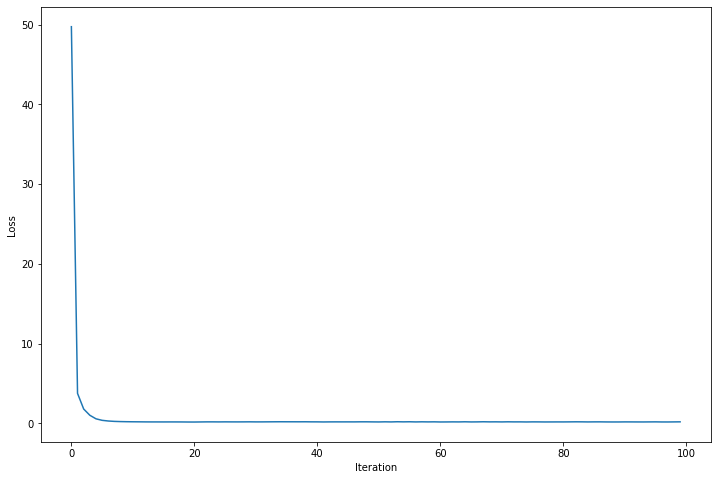

In [283]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(losses)), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

**К сожалению решение данной задачи с применением нейронных связей не показывает желаемых результатов, максимальная точность = 0.12**

# В заключении наилучший результат показал бустинговый алгоритм YandexCatBoost с использованием случайного леса, осталось только загрузить наш ответ на Kaggle, где данное решение попало в топ 100 за март, с ошибкой 0,126

In [119]:
test = pd.read_csv('/Users/caprize/Desktop/kaggle_working/house_cost/house-prices-advanced-regression-techniques/test.csv')
clear_nans(test)
train_x = X
dummy_features = pd.get_dummies(test[cat_col])
X = pd.concat([test[num_col], dummy_features], axis=1)
X = X.reindex(columns = train_x.columns, fill_value=0)
X.head()
# test_X = test[feature_col]
# test_X = X.values
# X = pd.concat([test[num_col], test[cat_col]], axis=1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [120]:

# Use the model to make predictions
# model.l1_ratio = 0.99
predicted_prices = logreg_cv.predict(X)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

# submission = pd.read_csv('/Users/caprize/Desktop/kaggle_working/house_cost/house-prices-advanced-regression-techniques/submission.csv')
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})

# submission['Churn'] = 1-best_model.predict_proba(X_test)
submission.to_csv('/Users/caprize/Desktop/kaggle_working/house_cost/house-prices-advanced-regression-techniques/my_submission2.csv',index=False)

[375000 375000 375000 ... 375000 375000 375000]
